# **_CRYSTALS_** (**_CRYptographic SuiTe for Algebraic LatticeS_**): <br> &nbsp;&#x2022; **_Kyber_** (Study and Analysis)
***
***

## Introduction
***

<div style="text-align: justify;">
    <b><i>CRYSTALS-Kyber</i></b> is a <b>(classical) post-quantum asymmetric cryptosystem</b> included in the <b><i>CRYptographic SuiTe for Algebraic LatticeS (CRYSTALS)</i></b>, which is designed to be <b>quantum-resistant</b> to future cryptanalytic attacks performed by future powerful quantum computers, ensuring security in the classical contexts as well. This cryptographic primitive uses a variant of the <b>Learning With Errors (LWE) problem</b> on lattice algebraic structures as its primary trapdoor function. Namely, this asymmetric cryptosystem won the first spot in the <b><i>National Institute of Standards and Technology (NIST)</i></b>'s <b>Post-Quantum Cryptography Standardization project</b> and is already selected as a new standard to replace the currently used (classical) pre-quantum asymmetric cryptosystems that are vulnerable to attacks performed by quantum computers in the future.
</div>

TODO: Insert CRYSTALS-Kyber Logo

<div style="text-align: justify;">
    The design of the primitive <b><i>CRYSTALS-Kyber Cryptosystem</i></b> has its roots inspired by the <b>LWE-based Asymmetric Cryptosystem</b> previously proposed by Oded Regev in 2005. Namely, we can improve the practical efficiency of such cryptosystems by employing the same probability distribution used for the noise to build a secret (i.e., a private key) and using a square matrix rather than a rectangular one as the public key. Another improvement is to use polynomial rings rather than integer numbers, as originally used in the <b><i>Number Theorists 'R' Us (NTRU) Cryptosystem</i></b>, to define the <b>Ring-Learning With Errors (RLWE)</b> and <b>Module-Learning With Errors (MLWE)</b> <b>mathematical problems</b>. From these two main ideas, we build <b><i>CRYSTALS-Kyber Cryptosystem</i></b> as having its computational hardness assumption based on the <b>MLWE problem</b>. Since from the <b><i>CRYSTALS-Kyber Cryptosystem</i></b>, we construct the <b>INDistinguishable under Chosen Ciphertext Attack (IND-CCA) Key Encapsulation Method/Mechanism (KEM)</b> on top of the <b>INDistinguishable under Chosen Plaintext Attack (IND-CPA)</b> asymmetric encryption algorithm, the formal definition of the latter will come in the first place.
</div>

***

## Background
***

### Impact of Quantum Computing on Cryptography

#### Cryptography in the Post-Quantum Era

#### NIST (Classical) Post-Quantum Standardization Project

### Lattice-based Cryptography

#### What is a Lattice?

#### Lattice-based Problems

#### Algorithms for Lattice-based Problems

***

## Formal Definitions
***

### LWE Cryptosystem

### _CRYSTALS-Kyber_ IND-CPA Asymmetric Encryption Algorithm

<div style="text-align: justify;">
    Let $k$, ${d}_{t}$, ${d}_{u}$, and ${d}_{v}$ be positive integer parameters, and recall that $n = 256$. Additionally, let $\mathcal{M} = { \{0, 1\} }^{n} = { \{0, 1\} }^{256}$ denote the messages space, where every message $m \in \mathcal{M}$ can be viewed as a polynomial in the algebraic ring $\mathcal{R}$ with binary coefficients (i.e., in $\{0, 1\}$). Now, consider the public-key asymmetric encryption/decryption algorithm denoted by the abstract triplet ${\texttt{CRYSTALS}}_{\texttt{Kyber.Asym}\_\texttt{Enc}} = \big(\texttt{Key}\_\texttt{Gen},\ \texttt{Enc},\ \texttt{Dec}\big)$. Here, the ciphertexts are of the form $ct = (u, v) \in \big( { \{ 0, 1 \} }^{ ( n \cdot k \cdot {d}_{u} ) } \times { \{ 0, 1 \} }^{ ( n \cdot {d}_{v} ) } \big)$. Then, in order to properly define the ${\texttt{CRYSTALS}}_{\texttt{Kyber}}$ asymmetric encryption/decryption algorithm $\texttt{Asym}\_\texttt{Enc}$, the sub-routines $\texttt{Key}\_\texttt{Gen}$, $\texttt{Enc}$, and $\texttt{Dec}$ are defined as follows:

### _CRYSTALS-Kyber_ IND-CCA KEM

<div style="text-align: justify;">
    First, let $G: { \{ 0, 1 \} }^{*} \mapsto { \{ 0, 1 \} }^{ ( 2\ \times\ n ) } = { \{ 0, 1 \} }^{ ( 2\ \times\ 256 ) } = { \{ 0, 1 \} }^{ 512 }$ and $H: { \{ 0, 1 \} }^{*} \mapsto { \{ 0, 1 \} }^{ n } = { \{ 0, 1 \} }^{ 256 }$ be cryptographic hash functions. Then, consider the public-key asymmetric KEM denoted by the triplet $\texttt{CRYSTALS}_{\texttt{Kyber.KEM}} = \big(\texttt{Key}\_\texttt{Gen},\ \texttt{Encaps},\ \texttt{Decaps}\big)$, where $\texttt{Key}\_\texttt{Gen}$ is very similar to the sub-routine defined previously in ${\texttt{CRYSTALS}}_{\texttt{Kyber.Asym}\_\texttt{Enc}}$, with the difference that ${k}_{priv}$ also contains ${k}_{pub} = (t, \rho)$ and a secret random (i.e., a nonce or a seed) value $z$ with $n = 256$ bits as well. We obtain this asymmetric KEM ${\texttt{CRYSTALS}}_{\texttt{Kyber.KEM}}$ algorithm by applying a KEM variant with "implicit rejection" of the Fujisaki-Okamoto transform to the ${\texttt{CRYSTALS}}_{\texttt{Kyber.Asym}\_\texttt{Enc}}$ algorithm. The sub-routine ${\texttt{CRYSTALS}}_{\texttt{Kyber.KEM.Decaps}}$ never returns $\bot$ (i.e., <i>absurdum</i>). Instead, in the case of re-encryption failure, a pseudo-random key $K$ := $H(z, ct)$ is returned, where $z$ is a random secret seed. Then, in order to properly define the ${\texttt{CRYSTALS}}_{\texttt{Kyber}}$ KEM algorithm $\texttt{KEM}$, the sub-routines ${\texttt{Key}}\_{\texttt{Gen}}$, $\texttt{Encaps}$, and $\texttt{Decaps}$ are defined as follows:

***

## Demonstration of the CRYSTALS-Kyber Cryptosystem,<br>using Bouncy Castle library (version 1.73) for Java
***

### Environment setup for the Bouncy Castle Crypto library (version 1.73) for Java

In [1]:
// Empty comment just to initialize
// Javalin rendering plugin from SOS Notebook.

2023-08-26 16:28:58:821 +0100 [Thread-0] INFO  log - Logging initialized @773ms to org.eclipse.jetty.util.log.Slf4jLog
2023-08-26 16:28:58:842 +0100 [Thread-0] INFO  Javalin - Starting Javalin ...
2023-08-26 16:28:58:887 +0100 [Thread-0] INFO  Server - jetty-9.4.9.v20180320; built: 2018-03-20T12:21:10Z; git: 1f8159b1e4a42d3f79997021ea1609f2fbac6de5; jvm 1.8.0_121-b15
2023-08-26 16:28:58:907 +0100 [Thread-0] INFO  session - DefaultSessionIdManager workerName=node0
2023-08-26 16:28:58:907 +0100 [Thread-0] INFO  session - No SessionScavenger set, using defaults
2023-08-26 16:28:58:908 +0100 [Thread-0] INFO  session - Scavenging every 600000ms
2023-08-26 16:28:58:912 +0100 [Thread-0] INFO  ContextHandler - Started i.j.e.j.start$httpHandler$1@42d0ea6a{/,null,AVAILABLE}
2023-08-26 16:28:58:927 +0100 [Thread-0] INFO  ContextHandler - Started o.e.j.s.ServletContextHandler@8e960bd{/,null,AVAILABLE}
2023-08-26 16:28:58:931 +0100 [Thread-0] INFO  AbstractConnector - Started ServerConnector@361720

null

In [2]:
// Import of the JAR file for the basic resources of
// the Bouncy Castle Crypto library (version 1.73) for Java.
%classpath add jar ../../../etc/resources/jar/bcprov-jdk18on-173.jar

In [3]:
// Import of the JAR file for the extension resources of
// the Bouncy Castle Crypto library (version 1.73) for Java.
%classpath add jar ../../../etc/resources/jar/bcprov-ext-jdk18on-173.jar

***

### Demonstration for the extraction of Execution and Security Parameter Sets<br>for the CRYSTALS-Kyber Cryptosystem

In [4]:
// Import of all the required modules and sub-libraries.

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, for use of basic cryptography.
import org.bouncycastle.crypto.AsymmetricCipherKeyPair;
import org.bouncycastle.crypto.SecretWithEncapsulation;
import org.bouncycastle.crypto.params.AsymmetricKeyParameter;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the use of
// Key Encapsulation Methods/Mechanisms (KEMs).
import org.bouncycastle.jcajce.SecretKeyWithEncapsulation;
import org.bouncycastle.jcajce.spec.KEMExtractSpec;
import org.bouncycastle.jcajce.spec.KEMGenerateSpec;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the provider of
// (Classical) Post-Quantum Cryptography.
import org.bouncycastle.pqc.jcajce.provider.BouncyCastlePQCProvider;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the CRYSTALS-Kyber
// Public-Key Cryptosystem's Parameter Specifications.
import org.bouncycastle.pqc.jcajce.spec.KyberParameterSpec;

// Import of all the required modules and sub-libraries required of
// the Bouncy Castle library, regarding the CRYSTALS-Kyber Cryptosystem.
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberParameters;
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberKeyGenerationParameters;
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberKeyPairGenerator;
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberPrivateKeyParameters;
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberPublicKeyParameters;

// Import of all the required modules and sub-libraries
// required of the built-in security module of Java.
import java.security.PrivateKey;
import java.security.PublicKey;
import java.security.SecureRandom;
import java.security.Security;

// Import of all the required modules and sub-libraries
// required of the built-in Non-blocking Input/Output module of Java.
import java.nio.ByteBuffer;
import java.nio.ByteOrder;


// Definition of all the required constant values.

// Definition of the size of a byte
// with the respective number of bits.
final short BYTE_SIZE_IN_BITS = 8;

// Definition of the number of possible
// binary digits (bits) for a hexadecimal character.
final short NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR = 16;



// Definition of all the required classes.

// Definition of the class of the cryptographic engine's parameters
// for the Public-Key (Asymmetric) Cryptosystem CRYSTALS-Kyber
// (CRYptographic SuiTe for Algebraic LatticeS - Kyber),
// which is a (Classical) Post-Quantum Cryptosystem
// (supposed to be secure against classical and quantum attacks),
// and based on computational hardness of mathematical problems
// derived from the well-known lattices algebraic structures,
// most specifically, in the LWE (Learning With Errors) Problem.
class KyberEngineParams {
    
    // Definition of all the required constant values,
    // regarding the class of the cryptographic engine's
    // parameters for the CRYSTALS-Kyber Public-Key Cryptosystem.
    
    // Definition of the maximum degree n of
    // the polynomials used in the matrix A representing
    // the lattice algebraic structure to be adopted for
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public final static int param_n = 256;
    
    // Definition of the numeric modulus q for
    // the polynomials used in the matrix A representing
    // the lattice algebraic structure to be adopted for
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public final static int param_q = 3329;
    
    // Definition of the numeric inverse of modulus q
    // for the polynomials used in the matrix A representing
    // the lattice algebraic structure to be adopted for
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public final static int param_q_inv = 62209;

    // Definition of the compression factor d_t
    // to reduce/compress the size of the asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public final static int compression_asymmetric_keys_factor_d_t = 12;
    
    // Definition of the numeric noise factor eta_2
    // used for the random error vectors e_1 and e_2 extracted
    // from a (Centered) Binomial Probability Distribution,
    // applied during the asymmetric encryption and generation of
    // the KEM (Key Encapsulation Method/Mechanism) procedures
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public final static int param_eta_2 = 2;

    // Definition of the size of the symmetric
    // hashes and (pseudo) random seeds, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public final static int num_symmetric_bytes = 32;
    
    // Definition of the size of the symmetric
    // shared secret, in terms of bytes, to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public final static int num_shared_secret_bytes = 32;
    
    // Definition of the size a polynomial, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public final static int num_polynomial_bytes = 
            ( ( compression_asymmetric_keys_factor_d_t * param_n ) / 
              BYTE_SIZE_IN_BITS );

    // Definition of the size of an IND-CPA (INDistinguishable
    // under Chosen Plaintext Attack) message, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private final static int num_ind_cpa_message_bytes = 32;


    // Definition of all the required variable values,
    // regarding the class of the cryptographic engine's
    // parameters for the CRYSTALS-Kyber Public-Key Cryptosystem.
    
    // Definition of the number of polynomials k
    // per vector used in the matrix A representing
    // the lattice algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of scaling
    // the security strength of the CRYSTALS-Kyber Public-Key Cryptosystem.
    private final int param_k;
    
    // Definition of the size, in terms of bytes,
    // of a polynomial compressed in an array of bytes, to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private final int num_polynomial_compressed_bytes;
    
    // Definition of the size, in terms of bytes,
    // of a polynomials vector in a matrix of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private final int num_polynomials_vector_bytes;
    
    // Definition of the size, in terms of bytes,
    // of a polynomials vector compressed in a matrix of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private final int num_polynomials_vector_compressed_bytes;
    
    // Definition of the numeric noise factor eta_1
    // used in the secret random coins vector r
    // extracted from a Binomial Probability Distribution,
    // dependent on the public key k_pub, and also
    // used for the error vector e and secret vector s,
    // regarding the polynomials representing a lattice
    // algebraic structure for the mathematical equation
    // A x s + e = t), representing a lattice-based problem in
    // the form of a MLWE (Module-Learning With Errors), to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private final int param_eta_1;
    
    // Definition of the compression factor d_u
    // to reduce/compress the size of the ciphertext
    // generated from the asymmetric encryption and to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private final int compression_asymmetric_encryption_factor_d_u;

    // Definition of the compression factor d_v
    // to reduce/compress the size of the ciphertext
    // generated from the asymmetric encryption and to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private final int compression_asymmetric_encryption_factor_d_v;
    
    // Definition of the size, in terms of bytes,
    // of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    private final int num_ind_cpa_public_key_bytes;
    
    // Definition of the size, in terms of bytes,
    // of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    private final int num_ind_cpa_secret_key_bytes;
    
    // Definition of the size, in terms of bytes,
    // of the numeric polynomial, which is related to
    // the asymmetric encryption to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    private final int num_ind_cpa_polynomial_bytes;
    
    // Definition of the size, in terms of bytes,
    // of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    private final int num_ind_cca_kem_public_key_bytes;
    
    // Definition of the size, in terms of bytes,
    // of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    private final int num_ind_cca_kem_secret_key_bytes;
    
    // Definition of the size, in terms of bytes,
    // of the ciphertext generated and to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    private final int num_ind_cca_kem_ciphertext_bytes;
    
    // Definition of the size of the symmetric session key, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private final int num_session_key_bytes;
    
    
    // Constructors of the class of the cryptographic engine's
    // parameters for the CRYSTALS-Kyber Public-Key Cryptosystem.
    
    // Constructor of the class of the cryptographic engine's
    // parameters for the CRYSTALS-Kyber Public-Key Cryptosystem,
    // and the initialization of the initial required parameters.
    //    Parameters:
    //    @param param_k: The number of polynomials k
    //                    per vector used in the matrix A
    //                    representing the lattice algebraic
    //                    structure, representing as well,
    //                    the size factor for that same
    //                    lattice algebraic structure.
    public KyberEngineParams( int param_k ) {

        // Setting of the number of polynomials k
        // per vector used in the matrix A representing
        // the lattice algebraic structure, representing as well,
        // the size factor for that same lattice algebraic structure,
        // and thus, being the main security parameter in terms of scaling
        // the security strength of the CRYSTALS-Kyber Public-Key Cryptosystem.
        this.param_k = param_k;
    
        
        // Setting a switch-case code block for all the possible values
        // for the number of polynomials k per vector used in the matrix A,
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        switch( this.param_k ) {
        
            // If the number of polynomials k per vector used in the matrix A,
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem, is set as 2.
            case 2:
                
                // Setting of the numeric noise factor eta_1
                // used in the secret random coins vector r
                // extracted from a Binomial Probability Distribution,
                // dependent on the public key k_pub, and also
                // used for the error vector e and secret vector s,
                // regarding the polynomials representing a lattice
                // algebraic structure for the mathematical equation
                // A x s + e = t), representing a lattice-based problem in
                // the form of a MLWE (Module-Learning With Errors), to be
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.param_eta_1 = 3;
                
                // Setting of the compression factor d_u
                // to reduce/compress the size of the ciphertext
                // generated from the asymmetric encryption and to be
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.compression_asymmetric_encryption_factor_d_u = 10;

                // Setting of the compression factor d_v
                // to reduce/compress the size of the ciphertext
                // generated from the asymmetric encryption and to be
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.compression_asymmetric_encryption_factor_d_v = 4;
                
                // Setting of the size of the symmetric session key, in terms of bytes,
                // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.num_session_key_bytes = 16;
                
                // Breaking of the case code block.
                break;
            
            // If the number of polynomials k per vector used in the matrix A,
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem, is set as 3.
            case 3:
                
                // Setting of the numeric noise factor eta_1
                // used in the secret random coins vector r
                // extracted from a Binomial Probability Distribution,
                // dependent on the public key k_pub, and also
                // used for the error vector e and secret vector s,
                // regarding the polynomials representing a lattice
                // algebraic structure for the mathematical equation
                // A x s + e = t), representing a lattice-based problem in
                // the form of a MLWE (Module-Learning With Errors), to be
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.param_eta_1 = 2;
                
                // Setting of the compression factor d_u
                // to reduce/compress the size of the ciphertext
                // generated from the asymmetric encryption and to be
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.compression_asymmetric_encryption_factor_d_u = 10;

                // Setting of the compression factor d_v
                // to reduce/compress the size of the ciphertext
                // generated from the asymmetric encryption and to be
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.compression_asymmetric_encryption_factor_d_v = 4;
                
                // Setting of the size of the symmetric session key, in terms of bytes,
                // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.num_session_key_bytes = 24;
                
                // Breaking of the case code block.
                break;
            
            // If the number of polynomials k per vector used in the matrix A,
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem, is set as 4.
            case 4:
                
                // Setting of the numeric noise factor eta_1
                // used in the secret random coins vector r
                // extracted from a Binomial Probability Distribution,
                // dependent on the public key k_pub, and also
                // used for the error vector e and secret vector s,
                // regarding the polynomials representing a lattice
                // algebraic structure for the mathematical equation
                // A x s + e = t), representing a lattice-based problem in
                // the form of a MLWE (Module-Learning With Errors), to be
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.param_eta_1 = 2;
                
                // Setting of the compression factor d_u
                // to reduce/compress the size of the ciphertext
                // generated from the asymmetric encryption and to be
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.compression_asymmetric_encryption_factor_d_u = 11;

                // Setting of the compression factor d_v
                // to reduce/compress the size of the ciphertext
                // generated from the asymmetric encryption and to be
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.compression_asymmetric_encryption_factor_d_v = 5;
                
                // Setting of the size of the symmetric session key, in terms of bytes,
                // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.num_session_key_bytes = 32;
                
                // Breaking of the case code block.
                break;
            
            // If the number of polynomials k per vector used in the matrix A,
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem, has an invalid value.
            default:
                
                // Throwing of an IllegalArgumentException, regarding an invalid value
                // for the number of polynomials k per vector used in the matrix A,
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                throw new IllegalArgumentException("Error: k=" + this.param_k + " " +
                                                   "is not supported for CRYSTALS-Kyber (Asymmetric) " +
                                                   "Public-Key Cryptosystem!");
        
        }
        
        
        // (Calculation) and setting of the size, in terms of bytes,
        // of a polynomial compressed in an array of bytes, to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        this.num_polynomial_compressed_bytes = 
            ( ( this.compression_asymmetric_encryption_factor_d_v * 
                this.param_k * this.param_n ) / BYTE_SIZE_IN_BITS );
        
        // (Calculation) and setting of the size, in terms of bytes,
        // of a polynomials vector in a matrix of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        this.num_polynomials_vector_bytes = 
            ( this.param_k * this.num_polynomial_bytes );
        
        // (Calculation) and setting of the size, in terms of bytes,
        // of a polynomials vector compressed in a matrix of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        this.num_polynomials_vector_compressed_bytes = 
            ( ( this.compression_asymmetric_encryption_factor_d_u * 
                this.param_k * this.param_n ) / BYTE_SIZE_IN_BITS );
        
        // (Calculation) and setting of the size,
        // in terms of bytes, of the asymmetric public key
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property.
        this.num_ind_cpa_public_key_bytes = 
            ( this.num_polynomials_vector_bytes + this.num_symmetric_bytes );
        
        // (Calculation) and setting of the size,
        // in terms of bytes, of the asymmetric private key
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property.
        this.num_ind_cpa_secret_key_bytes = this.num_polynomials_vector_bytes;
        
        // (Calculation) and setting of the size, in terms of bytes,
        // of the numeric polynomial, which is related to the asymmetric
        // encryption to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property.
        this.num_ind_cpa_polynomial_bytes = 
            ( this.num_polynomials_vector_compressed_bytes + 
              this.num_polynomial_compressed_bytes );

        // (Calculation) and setting of the size,
        // in terms of bytes, of the asymmetric public key
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem's KEM (Key Encapsulation Method/Mechanism)
        // with the IND-CCA2 (INDistinguishability under
        // adaptive Chosen Ciphertext Attack) property.
        this.num_ind_cca_kem_public_key_bytes = this.num_ind_cpa_public_key_bytes;
        
        // (Calculation) and setting of the size,
        // in terms of bytes, of the asymmetric private key
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem's KEM (Key Encapsulation Method/Mechanism)
        // with the IND-CCA2 (INDistinguishability under
        // adaptive Chosen Ciphertext Attack) property.
        this.num_ind_cca_kem_secret_key_bytes = 
            ( this.num_ind_cpa_secret_key_bytes + this.num_ind_cpa_public_key_bytes + 
              ( 2 * this.num_symmetric_bytes ) );
        
        // (Calculation) and setting of the size,
        // in terms of bytes, of the ciphertext generated
        // and to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem's KEM (Key Encapsulation Method/Mechanism)
        // with the IND-CCA2 (INDistinguishability under
        // adaptive Chosen Ciphertext Attack) property.
        this.num_ind_cca_kem_ciphertext_bytes = this.num_ind_cpa_polynomial_bytes;
    
    }
    
    
    // Methods of the class of the cryptographic engine's
    // parameters for the CRYSTALS-Kyber Public-Key Cryptosystem.
    
    // Method to obtain the maximum degree n of
    // the polynomials used in the matrix A representing
    // the lattice algebraic structure to be adopted for
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_param_n() {
        
        // Return of the maximum degree n of
        // the polynomials used in the matrix A representing
        // the lattice algebraic structure to be adopted for
        // the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.param_n;
        
    }
    
    // Method to obtain the numeric modulus q for
    // the polynomials used in the matrix A representing
    // the lattice algebraic structure to be adopted for
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_param_q() {
        
        // Return of the numeric modulus q for
        // the polynomials used in the matrix A representing
        // the lattice algebraic structure to be adopted for
        // the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.param_q;
        
    }
    
    // Method to obtain the numeric inverse of modulus q
    // for the polynomials used in the matrix A representing
    // the lattice algebraic structure to be adopted for
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_param_q_inv() {
        
        // Return of the numeric inverse of modulus q
        // for the polynomials used in the matrix A representing
        // the lattice algebraic structure to be adopted for
        // the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.param_q_inv;
        
    }
    
    // Method to obtain the compression factor d_t
    // to reduce/compress the size of the asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_compression_asymmetric_keys_factor_d_t() {
        
        // Return of the compression factor d_t
        // to reduce/compress the size of the asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.compression_asymmetric_keys_factor_d_t;
        
    }
    
    // Method to obtain the numeric noise factor eta_1
    // used in the secret random coins vector r
    // extracted from a Binomial Probability Distribution,
    // dependent on the public key k_pub, and also
    // used for the error vector e and secret vector s,
    // regarding the polynomials representing a lattice
    // algebraic structure for the mathematical equation
    // A x s + e = t), representing a lattice-based problem in
    // the form of a MLWE (Module-Learning With Errors), to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_param_eta_1() {
        
        // Return of the numeric noise factor eta_1
        // used in the secret random coins vector r
        // extracted from a Binomial Probability Distribution,
        // dependent on the public key k_pub, and also
        // used for the error vector e and secret vector s,
        // regarding the polynomials representing a lattice
        // algebraic structure for the mathematical equation
        // A x s + e = t), representing a lattice-based problem in
        // the form of a MLWE (Module-Learning With Errors), to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.param_eta_1;
        
    }

    // Method to obtain the numeric noise factor eta_2
    // used for the random error vectors e_1 and e_2 extracted
    // from a (Centered) Binomial Probability Distribution,
    // applied during the asymmetric encryption and generation of
    // the KEM (Key Encapsulation Method/Mechanism) procedures
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_param_eta_2() {
        
        // Return of the numeric noise factor eta_2
        // used for the random error vectors e_1 and e_2 extracted
        // from a (Centered) Binomial Probability Distribution,
        // applied during the asymmetric encryption and generation of
        // the KEM (Key Encapsulation Method/Mechanism) procedures
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.param_eta_2;
        
    }
    
    // Method to obtain the size of the symmetric
    // hashes and (pseudo) random seeds, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_symmetric_bytes() {
        
        // Return of the size of the symmetric
        // hashes and (pseudo) random seeds, in terms of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.num_symmetric_bytes;
        
    }
    
    // Method to obtain the size of the symmetric
    // hashes and (pseudo) random seeds, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_symmetric_bits() {
        
        // Return of the size of the symmetric
        // hashes and (pseudo) random seeds, in terms of bits,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return ( this.get_num_symmetric_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size of the symmetric
    // shared secret, in terms of bytes, to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_shared_secret_bytes() {
        
        // Return of the size of the symmetric
        // shared secret, in terms of bytes, to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.num_shared_secret_bytes;
        
    }
    
    // Method to obtain the size of the symmetric
    // shared secret, in terms of bits, to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_shared_secret_bits() {
        
        // Return of the size of the symmetric
        // shared secret, in terms of bits, to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem.
        return ( this.get_num_shared_secret_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size a polynomial, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_polynomial_bytes() {
        
        // Return of the size a polynomial, in terms of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.num_polynomial_bytes;
        
    }
    
    // Method to obtain the size a polynomial, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_polynomial_bits() {
        
        // Return of the size a polynomial, in terms of bits,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return ( this.get_num_polynomial_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size of an IND-CPA (INDistinguishable
    // under Chosen Plaintext Attack) message, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_ind_cpa_message_bytes() {
        
        // Return of the size of an IND-CPA (INDistinguishable
        // under Chosen Plaintext Attack) message, in terms of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.num_ind_cpa_message_bytes;
        
    }
    
    // Method to obtain the size of an IND-CPA (INDistinguishable
    // under Chosen Plaintext Attack) message, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_ind_cpa_message_bits() {
        
        // Return of the size of an IND-CPA (INDistinguishable
        // under Chosen Plaintext Attack) message, in terms of bits,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return ( this.get_num_ind_cpa_message_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the number of polynomials k
    // per vector used in the matrix A representing
    // the lattice algebraic structure, representing
    // as well, the size factor for that same lattice
    // algebraic structure, and thus, being the main
    // security parameter in terms of scaling the security
    // strength of the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_param_k() {
        
        // Return of the number of polynomials k
        // per vector used in the matrix A representing
        // the lattice algebraic structure, representing
        // as well, the size factor for that same lattice
        // algebraic structure, and thus, being the main
        // security parameter in terms of scaling the security
        // strength of the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.param_k;
        
    }
    
    // Method to obtain the size, in terms of bytes,
    // of a polynomial compressed in an array of bytes, to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_polynomial_compressed_bytes() {
        
        // Return of the size, in terms of bytes,
        // of a polynomial compressed in an array of bytes, to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.num_polynomial_compressed_bytes;
        
    }
    
    // Method to obtain the size, in terms of bits,
    // of a polynomial compressed in an array of bytes, to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_polynomial_compressed_bits() {
        
        // Return of the size, in terms of bits,
        // of a polynomial compressed in an array of bytes, to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return ( this.num_polynomial_compressed_bytes *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size, in terms of bytes,
    // of a polynomials vector in a matrix of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_polynomials_vector_bytes() {
        
        // Return of the size, in terms of bytes,
        // of a polynomials vector in a matrix of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.num_polynomials_vector_bytes;
        
    }
    
    // Method to obtain the size, in terms of bits,
    // of a polynomials vector in a matrix of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_polynomials_vector_bits() {
        
        // Return of the size, in terms of bits,
        // of a polynomials vector in a matrix of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return ( this.get_num_polynomials_vector_bytes() * 
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size, in terms of bytes,
    // of a polynomials vector compressed in a matrix of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    public int get_num_polynomials_vector_compressed_bytes() {
        
        // Return of the size, in terms of bytes,
        // of a polynomials vector compressed in a matrix of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.num_polynomials_vector_compressed_bytes;
        
    }
    
    // Method to obtain the size, in terms of bits,
    // of a polynomials vector compressed in a matrix of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    public int get_num_polynomials_vector_compressed_bits() {
        
        // Return of the size, in terms of bits,
        // of a polynomials vector compressed in a matrix of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return ( this.get_num_polynomials_vector_compressed_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the compression factor d_u
    // to reduce/compress the size of the ciphertext
    // generated from the asymmetric encryption and to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_compression_asymmetric_encryption_factor_d_u() {
        
        // Return of the compression factor d_u
        // to reduce/compress the size of the ciphertext
        // generated from the asymmetric encryption and to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.compression_asymmetric_encryption_factor_d_u;
        
    }

    // Method to obtain the compression factor d_v
    // to reduce/compress the size of the ciphertext
    // generated from the asymmetric encryption and to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_compression_asymmetric_encryption_factor_d_v() {
        
        // Return of the compression factor d_v
        // to reduce/compress the size of the ciphertext
        // generated from the asymmetric encryption and to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.compression_asymmetric_encryption_factor_d_v;
        
    }
    
    // Method to obtain the size, in terms of bytes,
    // of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    public int get_num_ind_cpa_public_key_bytes() {
        
        // Return of the size, in terms of bytes,
        // of the asymmetric public key to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property.
        return this.num_ind_cpa_public_key_bytes;
        
    }
    
    // Method to obtain the size, in terms of bits,
    // of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    public int get_num_ind_cpa_public_key_bits() {
        
        // Return of the size, in terms of bits,
        // of the asymmetric public key to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property.
        return ( this.get_num_ind_cpa_public_key_bytes() * 
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size, in terms of bytes,
    // of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    public int get_num_ind_cpa_secret_key_bytes() {
        
        // Return of the size, in terms of bytes,
        // of the asymmetric private key to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property.
        return this.num_ind_cpa_secret_key_bytes;
        
    }
    
    // Method to obtain the size, in terms of bits,
    // of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    public int get_num_ind_cpa_secret_key_bits() {
        
        // Return of the size, in terms of bits,
        // of the asymmetric private key to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property.
        return ( this.num_ind_cpa_secret_key_bytes * 
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size, in terms of bytes,
    // of the numeric polynomial, which is related to
    // the asymmetric encryption to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    public int get_num_ind_cpa_polynomial_bytes() {
        
        // Return of the size, in terms of bytes,
        // of the numeric polynomial, which is related to
        // the asymmetric encryption to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property.
        return this.num_ind_cpa_polynomial_bytes;
        
    }
    
    // Method to obtain the size, in terms of bits,
    // of the numeric polynomial, which is related to
    // the asymmetric encryption to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    public int get_num_ind_cpa_polynomial_bits() {
        
        // Return of the size, in terms of bits,
        // of the numeric polynomial, which is related to
        // the asymmetric encryption to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property.
        return ( this.get_num_ind_cpa_polynomial_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size, in terms of bytes,
    // of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    public int get_num_ind_cca_kem_public_key_bytes() {
        
        // Return of the size, in terms of bytes,
        // of the asymmetric public key to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem's
        // KEM (Key Encapsulation Method/Mechanism)
        // with the IND-CCA2 (INDistinguishability
        // under adaptive Chosen Ciphertext Attack) property.
        return this.num_ind_cca_kem_public_key_bytes;
        
    }
    
    // Method to obtain the size, in terms of bits,
    // of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    public int get_num_ind_cca_kem_public_key_bits() {
        
        // Return of the size, in terms of bits,
        // of the asymmetric public key to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem's
        // KEM (Key Encapsulation Method/Mechanism)
        // with the IND-CCA2 (INDistinguishability
        // under adaptive Chosen Ciphertext Attack) property.
        return ( this.get_num_ind_cca_kem_public_key_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size, in terms of bytes,
    // of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    public int get_num_ind_cca_kem_secret_key_bytes() {
        
        // Return of the size, in terms of bytes,
        // of the asymmetric private key to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem's
        // KEM (Key Encapsulation Method/Mechanism)
        // with the IND-CCA2 (INDistinguishability
        // under adaptive Chosen Ciphertext Attack) property.
        return this.num_ind_cca_kem_secret_key_bytes;
        
    }
    
    // Method to obtain the size, in terms of bits,
    // of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    public int get_num_ind_cca_kem_secret_key_bits() {
        
        // Return of the size, in terms of bits,
        // of the asymmetric private key to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem's
        // KEM (Key Encapsulation Method/Mechanism)
        // with the IND-CCA2 (INDistinguishability
        // under adaptive Chosen Ciphertext Attack) property.
        return ( this.get_num_ind_cca_kem_secret_key_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size, in terms of bytes,
    // of the ciphertext generated and to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    public int get_num_ind_cca_kem_ciphertext_bytes() {
        
        // Return of the size, in terms of bytes,
        // of the ciphertext generated and to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem's
        // KEM (Key Encapsulation Method/Mechanism)
        // with the IND-CCA2 (INDistinguishability
        // under adaptive Chosen Ciphertext Attack) property.
        return this.num_ind_cca_kem_ciphertext_bytes;
        
    }
    
    // Method to obtain the size, in terms of bits,
    // of the ciphertext generated and to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    public int get_num_ind_cca_kem_ciphertext_bits() {
        
        // Return of the size, in terms of bits,
        // of the ciphertext generated and to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem's
        // KEM (Key Encapsulation Method/Mechanism)
        // with the IND-CCA2 (INDistinguishability
        // under adaptive Chosen Ciphertext Attack) property.
        return ( this.get_num_ind_cca_kem_ciphertext_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size of the symmetric session key, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_session_key_bytes() {
        
        // Return of the size of the symmetric session key, in terms of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.num_session_key_bytes;
        
    }
    
    // Method to obtain the size of the symmetric session key, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_session_key_bits() {
        
        // Return of the size of the symmetric session key, in terms of bits,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return ( this.get_num_session_key_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
        
}


// Definition of class of Public-Key (Asymmetric) Cryptosystem
// CRYSTALS-Kyber (CRYptographic SuiTe for Algebraic LatticeS - Kyber),
// which is a (Classical) Post-Quantum Cryptosystem
// (supposed to be secure against classical and quantum attacks),
// and based on computational hardness of mathematical problems
// derived from the well-known lattices algebraic structures,
// most specifically, in the LWE (Learning With Errors) Problem.
class CrystalsKyberCryptosystem {
    
    // Definition of all the required constant values,
    // regarding the class of the CRYSTALS-Kyber Public-Key Cryptosystem.
    
    // Setting of the string array with the names of
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    public final String[]
        security_parameters_names = {
    
        // 1) Security Parameters Set with a factor of 2 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 64 bits, designed for
        //    the distribution of symmetric session keys of 128 bits.
        "Kyber512",
        
        // 2) Security Parameters Set with a factor of 3 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits, designed for
        //    the distribution of symmetric session keys of 192 bits.
        "Kyber768",
        
        // 3) Security Parameters Set with a factor of 4 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits, designed for
        //    the distribution of symmetric session keys of 256 bits.
        "Kyber1024"
    
    };
    
    // Setting of the string array with the names and
    // definitions of the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    public final String[] 
        security_parameters_names_and_descriptions = {
    
        // 1) Security Parameters Set with a factor of k = 2 ( k x n = 2 x 256 = 512 )
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 64 bits, designed for
        //    the distribution of symmetric session keys of 128 bits.
        //    NOTE: The Kyber512 has a NIST (Classical) Post-Quantum
        //          Security Level of 1 (≈ exhaustive search on AES-128).
        "=> Kyber512: Security Parameters Set with a factor of k = 2 ( k x n = 2 x 256 = 512 )\n   " +
        "             for the size of the lattice algebraic structure, which provides\n   " +
        "             a (post-quantum) security strength of 64 bits, designed for\n   " +
        "             the distribution of symmetric session keys of 128 bits.\n\n   " +
        "             NOTE: The Kyber512 Cryptosystem has a NIST (Classical)\n   " +
        "                   Post-Quantum Security Level of 1 (≈ exhaustive search on AES-128).",
        
        // 2) Security Parameters Set with a factor of k = 3 ( k x n = 3 x 256 = 768 )
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits, designed for
        //    the distribution of symmetric session keys of 192 bits.
        //    NOTE: The Kyber512 has a NIST (Classical) Post-Quantum
        //          Security Level of 1 (≈ exhaustive search on AES-192).
        "=> Kyber768: Security Parameters Set with a factor of k = 3 ( k x n = 3 x 256 = 768 )\n   " +
        "             for the size of the lattice algebraic structure, which provides\n   " +
        "             a (post-quantum) security strength of 96 bits, designed for\n   " +
        "             the distribution of symmetric session keys of 192 bits.\n\n   " +
        "             NOTE: The Kyber768 Cryptosystem has a NIST (Classical)\n   " +
        "                   Post-Quantum Security Level of 3 (≈ exhaustive search on AES-192).",
        
        // 3) Security Parameters Set with a factor of k = 4 ( k x n = 4 x 256 = 1024 )
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits, designed for
        //    the distribution of symmetric session keys of 256 bits.
        //    NOTE: The Kyber512 has a NIST (Classical) Post-Quantum
        //          Security Level of 1 (≈ exhaustive search on AES-256).
        "=> Kyber1024: Security Parameters Set with a factor of k = 4 ( k x n = 4 x 256 = 1024 )\n   " +
        "              for the size of the lattice algebraic structure, which provides\n   " +
        "              a (post-quantum) security strength of 128 bits, designed for\n   " +
        "              the distribution of symmetric session keys of 256 bits.\n\n   " +
        "              NOTE: The Kyber1024 Cryptosystem has a NIST (Classical)\n   " +
        "                    Post-Quantum Security Level of 5 (≈ exhaustive search on AES-256)."
        
    };
    
    
    // Setting of the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    public final KyberParameterSpec[] 
        security_parameters_specifications = {
        
        // 1) Security Parameters Set with a factor of 2 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 64 bits, designed for
        //    the distribution of symmetric session keys of 128 bits.
        KyberParameterSpec.kyber512,
        
        // 2) Security Parameters Set with a factor of 3 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits, designed for
        //    the distribution of symmetric session keys of 192 bits.
        KyberParameterSpec.kyber768,
        
        // 3) Security Parameters Set with a factor of 4 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits, designed for
        //    the distribution of symmetric session keys of 256 bits.
        KyberParameterSpec.kyber1024
        
    };
    
    
    // Setting of the array of the parameters
    // regarding the number of polynomials k
    // per vector used in the matrix A representing
    // the lattice algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of scaling
    // the security strength of the CRYSTALS-Kyber Public-Key Cryptosystem.
    public final int[] engine_k_parameters = {
        
        // 1) Parameter k=2 to build the 'Kyber512' Security Parameter Set
        //    as the parameter choice for the general parameters to be
        //    used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        2,
        
        // 2) Parameters k=3 to build the 'Kyber768' Security Parameter Set
        //    as the parameter choice for the general parameters to be
        //    used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        3,
        
        // 3) Parameters k=4 to build the 'Kyber1024' Security Parameter Set
        //    as the parameter choice for the general parameters to be
        //    used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        4
        
    };
    
    
    // Definition of all the required variable values,
    // regarding the class of the CRYSTALS-Kyber Public-Key Cryptosystem.
    
    // Definition of the parameter choice index for
    // the generation of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    private short parameter_choice_index;
    
    // Definition of the general parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private KyberParameters parameters;
    
    // Definition of the cryptographic engine's parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private KyberEngineParams engine_parameters;
    
    // Definition of the Java's Secure Random to act as
    // Pseudo-Random Generator (PRG) for the generation of
    // the instance of the Key Pair to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    private SecureRandom secure_pseudo_random_generator_key_pair_generation;
    
    // Definition of the key generation parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private KyberKeyGenerationParameters key_generation_parameters;

    // Definition of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private AsymmetricCipherKeyPair asymmetric_key_pair;
            
    
    
    // Constructor of the class of the CRYSTALS-Kyber Public-Key Cryptosystem,
    // and the initialization of the initial required parameters.
    //    Parameters:
    //    @param parameter_choice_index: The parameter choice index for
    //                                   the generation of the pair of
    //                                   asymmetric keys to be used.
    public CrystalsKyberCryptosystem( short parameter_choice_index ) {
        
        // Addition of the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java.
        this.add_classical_post_quantum_cryptography_bouncy_castle_provider();
        
        // Initialization of the parameter choice index for
        // the generation of the pair of asymmetric keys to be used.
        this.parameter_choice_index = parameter_choice_index;
        
        // Initialization of the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, as a null object.
        this.parameters = null;
        
        // Initialization of the cryptographic engine's parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, as a null object.
        this.engine_parameters = null;
        
        // Initialization of the Java's Secure Random
        // to act as Pseudo-Random Generator (PRG) for
        // the generation of the instance of the Key Pair
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        this.secure_pseudo_random_generator_key_pair_generation = 
            new SecureRandom();
        
        // Initialization of the key generation parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, as a null object.
        this.key_generation_parameters = null;
        
        // Initialization of the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, as a null object.
        this.asymmetric_key_pair = null;
        
    }
    
    
    // Methods of the class of the Public-Key (Asymmetric) Cryptosystem
    // CRYSTALS-Kyber (CRYptographic SuiTe for Algebraic LatticeS - Kyber).
    
    // Method to add the (Classical) Post-Quantum Cryptography
    // provider of the Bouncy Castle library for Java,
    // to the built-in security module of Java.
    public void add_classical_post_quantum_cryptography_bouncy_castle_provider() {
        
        // If the built-in security module of Java does not find or
        // not have the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java,
        // denoted as BCPQC (Bouncy Castle - Post-Quantum Cryptography).
        if( Security.getProvider( "BCPQC" ) == null ) {
         
            // Addition of the (Classical) Post-Quantum Cryptography
            // provider of the Bouncy Castle library for Java,
            // to the built-in security module of Java.
            Security.addProvider( new BouncyCastlePQCProvider() );
        
        }
        
    }
    
    
    // Method to obtain the parameter choice index defined for
    // the generation of the pair of asymmetric keys to be used.
    public short get_parameter_choice_index() {
        
        // Return of the parameter choice index defined for
        // the generation of the pair of asymmetric keys to be used.
        return this.parameter_choice_index;
        
    }
    
    
    // Method to obtain the string with the name of
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    public String get_security_parameters_name() {
        
        // Return of the string with the name of
        // the CRYSTALS-Kyber Public-Key Cryptosystem's
        // Security Parameters defined for the key pair generation
        // (consisting on private and public keys), as well as
        // the respective Key Encapsulation Method/Mechanism (KEM).
        return security_parameters_names[ this.parameter_choice_index ];
        
    }
    
    
    // Method to obtain the string with the name and
    // description of the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    public String get_security_parameters_name_and_description() {
        
        // Return of the string with the name and description of
        // the CRYSTALS-Kyber Public-Key Cryptosystem's
        // Security Parameters defined for the key pair generation
        // (consisting on private and public keys), as well as
        // the respective Key Encapsulation Method/Mechanism (KEM).
        return security_parameters_names_and_descriptions[ this.parameter_choice_index ];
        
    }
       
        
    // Method to obtain the CRYSTALS-Kyber Public-Key
    // Cryptosystem's Security Parameters Specifications.
    public KyberParameterSpec get_security_parameters_specifications() {
        
        // Return of the CRYSTALS-Kyber Public-Key
        // Cryptosystem's Security Parameters Specifications.
        return security_parameters_specifications[ this.parameter_choice_index ];
        
    }
    
    
    // Method to obtain the parameter value regarding
    // the number of polynomials k per vector used in
    // the matrix A representing the lattice algebraic
    // structure, representing as well, the size factor
    // for that same lattice algebraic structure, and thus,
    // being the main security parameter in terms of scaling
    // the security strength of the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_engine_k_parameter() {
        
        // Return of the parameter value regarding
        // the number of polynomials k per vector used in
        // the matrix A representing the lattice algebraic
        // structure, representing as well, the size factor
        // for that same lattice algebraic structure, and thus,
        // being the main security parameter in terms of scaling
        // the security strength of the CRYSTALS-Kyber Public-Key Cryptosystem.
        return engine_k_parameters[ this.parameter_choice_index ];
        
    }
    
    
    // Method to initialize the general parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public void initialize_parameters() {
        
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // corresponds to the 'Kyber512' Security Parameter Set.
        if( this.parameter_choice_index == 0 ) {
            
            // Setting the 'Kyber512' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            this.parameters = KyberParameters.kyber512;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // corresponds to the 'Kyber768' Security Parameter Set.
        else if( this.parameter_choice_index == 1 ) {
            
            // Setting the 'Kyber768' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            this.parameters = KyberParameters.kyber768;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // corresponds to the 'Kyber1024' Security Parameter Set.
        else if( this.parameter_choice_index == 2 ) {
            
            // Setting the 'Kyber1024' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            this.parameters = KyberParameters.kyber1024;
            
        }
        
    }
    
    
    // Method to obtain the general parameters to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberParameters get_parameters() {
        
        // Return of the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.parameters;
        
    }
    
    
    // Method to obtain the size of the symmetric session key, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_session_key_bytes_size() {
        
        // If the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not null (i.e., already initialized).
        if( this.get_parameters() != null ) {
            
            // Return of the size of the symmetric session key, in terms of bytes,
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( this.get_session_key_bits_size() / 
                     BYTE_SIZE_IN_BITS );
            
        }
        // If the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is null (i.e., not initialized yet).
        else {
            
            // Return of an invalid size of the symmetric session key, in terms of bytes,
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;

        }
        
    }
    
    
    // Method to obtain the size of the symmetric session key, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_session_key_bits_size() {
        
        // If the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not null (i.e., already initialized).
        if( this.get_parameters() != null ) {
            
            // Return of the size of the symmetric session key, in terms of bits,
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_parameters().getSessionKeySize();
            
        }
        // If the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is null (i.e., not initialized yet).
        else {
            
            // Return of an invalid size of the symmetric session key, in terms of bits,
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;

        }
        
    }
    
    
    // Method to initialize the cryptographic engine's parameters
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public void initialize_engine_parameters() {
        
        // Retrieval of the parameters required to build
        // the CRYSTALS-Kyber Public-Key Cryptosystem's cryptographic engine.
        int kyber_engine_k_parameter = this.get_engine_k_parameter();

        // Initialization of the cryptographic engine's parameters
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        this.engine_parameters = 
            new KyberEngineParams( kyber_engine_k_parameter );
        
    }
        
    
    // Method to obtain the cryptographic engine's parameters
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberEngineParams get_engine_parameters() {
        
        // Return of the cryptographic engine's parameters
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.engine_parameters;
        
    }
    
    
    // Method to obtain the Java's Secure Random to act as
    // Pseudo-Random Generator (PRG) for the key pair generation to
    // be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public SecureRandom get_secure_pseudo_random_generator_key_pair_generation() {
            
        // Return of the Java's Secure Random to act as
        // Pseudo-Random Generator (PRG) for the key pair generation to
        // be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.secure_pseudo_random_generator_key_pair_generation;
    
    }
    
    
    // Method to initialize the key generation parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public void initialize_key_generation_parameters() {
        
        // If the the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, are not null.
        if( this.get_parameters() != null ) {
        
            // Initialization of the key generation parameters to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            this.key_generation_parameters = 
                new KyberKeyGenerationParameters
                    ( this.secure_pseudo_random_generator_key_pair_generation,
                      this.parameters );
        
        }
        
    }
    
    
    // Method to obtain the key generation parameters to be\
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberKeyGenerationParameters get_key_generation_parameters() {
        
        // Return of the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.key_generation_parameters;
        
    }
    
    
    // Method to initialize the generation of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem. 
    public void initialize_asymmetric_key_pair_generation() {
       
        // Creation of the generator of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        KyberKeyPairGenerator crystals_kyber_key_pair_generator = 
            new KyberKeyPairGenerator();

        // Initialization of the generator of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // using the Security Parameters set defined before.
        crystals_kyber_key_pair_generator
            .init( this.key_generation_parameters );

        // Generation of the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        this.asymmetric_key_pair = 
            crystals_kyber_key_pair_generator.generateKeyPair();
            
    }
    
    
    // Method to obtain the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public AsymmetricCipherKeyPair get_asymmetric_key_pair() {
        
        // Return of the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.asymmetric_key_pair;
        
    }
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public AsymmetricKeyParameter get_public_key() {
        
        // If the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_asymmetric_key_pair().getPublic();
            
        }
        // If the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of an invalid public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the public key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberPublicKeyParameters get_public_key_parameters() {
        
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {
            
            // Return of the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( ( KyberPublicKeyParameters ) this.get_public_key() );
            
        }
        // If the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of an invalid public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the target/solution t
    // (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t),
    // encoded (and compressed) in bytes,
    // representing a lattice-based problem in
    // the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public byte[] get_target_solution_t_from_public_key_parameters() {
        
        // If the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
            
            // Return of the target/solution t
            // (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_public_key_parameters().getT();
            
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of an invalid target/solution t
            // (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the target/solution t
    // (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t),
    // encoded (and compressed) in bytes,
    // representing a lattice-based problem in
    // the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_target_solution_t_size_bytes_from_public_key_parameters() {
        
        // If the target/solution t
        // (i.e. the target/solution vector for
        // the mathematical equation A x s + e = t),
        // encoded (and compressed) in bytes,
        // representing a lattice-based problem in
        // the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_target_solution_t_from_public_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bytes, of the target/solution t
            // (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_target_solution_t_from_public_key_parameters().length;
        
        }
        // If the target/solution t
        // (i.e. the target/solution vector for
        // the mathematical equation A x s + e = t),
        // encoded (and compressed) in bytes,
        // representing a lattice-based problem in
        // the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bytes, of the target/solution t
            // (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the target/solution t
    // (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t),
    // encoded (and compressed) in bytes,
    // representing a lattice-based problem in
    // the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_target_solution_t_size_bits_from_public_key_parameters() {
        
        // If the target/solution t
        // (i.e. the target/solution vector for
        // the mathematical equation A x s + e = t),
        // encoded (and compressed) in bytes,
        // representing a lattice-based problem in
        // the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_target_solution_t_from_public_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bits, of the target/solution t
            // (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( this.get_target_solution_t_size_bytes_from_public_key_parameters() * 
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the target/solution t
        // (i.e. the target/solution vector for
        // the mathematical equation A x s + e = t),
        // encoded (and compressed) in bytes,
        // representing a lattice-based problem in
        // the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bits, of the target/solution t
            // (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and
    // obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes,
    // representing a lattice-based problem in the form of a
    // MLWE (Module-Learning With Errors), retrieved from
    // the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public byte[] get_pseudo_random_seed_rho_from_public_key_parameters() {
        
        // If the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
            
            // Return of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes,
            // representing a lattice-based problem in the form of a
            // MLWE (Module-Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_public_key_parameters().getRho();
            
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes,
            // representing a lattice-based problem in the form of a
            // MLWE (Module-Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size, in terms of bytes,
    // of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and
    // obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes,
    // representing a lattice-based problem in the form of a
    // MLWE (Module-Learning With Errors), retrieved from
    // the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_pseudo_random_seed_rho_size_bytes_from_public_key_parameters() {
        
        // If the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and
        // obtained the uniformly-random matrix A consisting of
        // polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s + e = t), encoded in bytes,
        // representing a lattice-based problem in the form of a
        // MLWE (Module-Learning With Errors), retrieved from
        // the public key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_pseudo_random_seed_rho_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes,
            // representing a lattice-based problem in the form of a
            // MLWE (Module-Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_pseudo_random_seed_rho_from_public_key_parameters().length;
        
        }
        // If the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and
        // obtained the uniformly-random matrix A consisting of
        // polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s + e = t), encoded in bytes,
        // representing a lattice-based problem in the form of a
        // MLWE (Module-Learning With Errors), retrieved from
        // the public key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
            
            // Return of an invalid size, in terms of bytes,
            // of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes,
            // representing a lattice-based problem in the form of a
            // MLWE (Module-Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size, in terms of bits,
    // of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and
    // obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes,
    // representing a lattice-based problem in the form of a
    // MLWE (Module-Learning With Errors), retrieved from
    // the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_pseudo_random_seed_rho_size_bits_from_public_key_parameters() {
        
        // If the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and
        // obtained the uniformly-random matrix A consisting of
        // polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s + e = t), encoded in bytes,
        // representing a lattice-based problem in the form of a
        // MLWE (Module-Learning With Errors), retrieved from
        // the public key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_pseudo_random_seed_rho_from_public_key_parameters() != null ) {
        
            // Return of the size, in terms of bits,
            // of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes,
            // representing a lattice-based problem in the form of a
            // MLWE (Module-Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( this.get_pseudo_random_seed_rho_size_bytes_from_public_key_parameters() * 
                     BYTE_SIZE_IN_BITS );
            
        }
        // If the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and
        // obtained the uniformly-random matrix A consisting of
        // polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s + e = t), encoded in bytes,
        // representing a lattice-based problem in the form of a
        // MLWE (Module-Learning With Errors), retrieved from
        // the public key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
            
            // Return of an invalid size, in terms of bits,
            // of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes,
            // representing a lattice-based problem in the form of a
            // MLWE (Module-Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // being encoded as an array of bytes.
    public byte[] get_public_key_encoded_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {

            // Retrieval of the public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes.
            byte[] public_key_encoded_bytes = 
                 ( ( KyberPublicKeyParameters ) this.get_public_key() ).getEncoded();

            // Return of the public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes.
            return public_key_encoded_bytes;
        
        }
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
        
            // Return of an invalid public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as being encoded as an array of bytes.
    public int get_public_key_size_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return this.get_public_key_encoded_bytes().length;
        
        }
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return 0;
            
        }
 
    }
    
    
    // Method to obtain the size of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as being encoded as an array of bits.
    public int get_public_key_size_bits() {
        
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bits.
            return ( this.get_public_key_size_bytes() *
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of public key of the cryptosystem,
    // using the associated Security Parameters.
    public KyberPublicKeyParameters get_public_key_payload_from_parameters() {
        
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
            
            // Retrieval of the cipher parameters from
            // the key generation parameters to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            KyberParameters crystals_kyber_cryptosystem_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // which will be used to build public key payload.

            // Retrieval of the target/solution t
            // (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes.
            byte[] target_solution_t = 
                this.get_target_solution_t_from_public_key_parameters();

            // Retrieval of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_public_key_parameters();


            // Return of the payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of public key of the cryptosystem.
            return new KyberPublicKeyParameters( crystals_kyber_cryptosystem_parameters,
                                                 target_solution_t,
                                                 pseudo_random_seed_rho );
        
        }
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of public key of
            // the cryptosystem, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of public key of the cryptosystem,
    // using the associated encoding in an array of bytes.
    public KyberPublicKeyParameters get_public_key_payload_from_encoding() {
        
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {

            // Retrieval of the cipher parameters from
            // the key generation parameters to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            KyberParameters crystals_kyber_cryptosystem_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Return of the payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of public key of the cryptosystem.
            return new KyberPublicKeyParameters( crystals_kyber_cryptosystem_parameters,
                                                 this.get_public_key_encoded_bytes() );
            
        }
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of public key of
            // the cryptosystem, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of public key of the cryptosystem.
    public KyberPublicKeyParameters get_public_key_payload() {
    
        // Return of the payload of the public key
        // from the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // as a proper object of public key of the cryptosystem.
        return this.get_public_key_payload_from_parameters();
        
    }
    
    
    // Method to obtain the private key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public AsymmetricKeyParameter get_private_key() {
        
        // If the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_asymmetric_key_pair().getPrivate();
            
        }
        // If the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of an invalid private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the private key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberPrivateKeyParameters get_private_key_parameters() {
        
        // If the private key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
            
            // Return of the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( ( KyberPrivateKeyParameters ) this.get_private_key() );
            
        }
        // If the private key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of an invalid private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the random secret s
    // (i.e. the secret vector in the lattice
    // algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public byte[] get_random_secret_s_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret s
            // (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_private_key_parameters().getS();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret s
            // (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the random secret s
    // (i.e. the secret vector in the lattice
    // algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_random_secret_s_size_bytes_from_private_key_parameters() {
        
        // If the random secret s
        // (i.e. the secret vector in the lattice
        // algebraic structure), encoded in bytes,
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_random_secret_s_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bytes, of the random secret s
            // (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_random_secret_s_from_private_key_parameters().length;

        }
        // If the random secret s
        // (i.e. the secret vector in the lattice
        // algebraic structure), encoded in bytes,
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bytes, of the random secret s
            // (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the random secret s
    // (i.e. the secret vector in the lattice
    // algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_random_secret_s_size_bits_from_private_key_parameters() {
        
        // If the random secret s
        // (i.e. the secret vector in the lattice
        // algebraic structure), encoded in bytes,
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_random_secret_s_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bits, of the random secret s
            // (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( this.get_random_secret_s_size_bytes_from_private_key_parameters() *
                     BYTE_SIZE_IN_BITS );

        }
        // If the random secret s
        // (i.e. the secret vector in the lattice
        // algebraic structure), encoded in bytes,
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bits, of the random secret s
            // (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the hashed public key,
    // denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public byte[] get_hashed_public_key_h_pub_k_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the hashed public key,
            // denoted as H(pub_key), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_private_key_parameters().getHPK();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are defined by a null object.
        else {
           
            // Return of an invalid hashed public key,
            // denoted as H(pub_key), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size, in terms of bytes,
    // of the hashed public key, denoted as
    // H(pub_key), encoded in bytes, with
    // the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_hashed_public_key_h_pub_k_size_bytes_from_private_key_parameters() {
        
        // If the hashed public key,
        // denoted as H(pub_key), encoded in bytes,
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_hashed_public_key_h_pub_k_from_private_key_parameters() != null ) {

            // Return of the size, in terms of bytes,
            // of the hashed public key, denoted as
            // H(pub_key), encoded in bytes, with
            // the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_hashed_public_key_h_pub_k_from_private_key_parameters().length;
        
        }
        // If the hashed public key,
        // denoted as H(pub_key), encoded in bytes,
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
        
            // Return of an invalid size, in terms of bytes,
            // of the hashed public key, denoted as
            // H(pub_key), encoded in bytes, with
            // the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size, in terms of bits,
    // of the hashed public key, denoted as
    // H(pub_key), encoded in bytes, with
    // the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_hashed_public_key_h_pub_k_size_bits_from_private_key_parameters() {
        
        // If the hashed public key,
        // denoted as H(pub_key), encoded in bytes,
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_hashed_public_key_h_pub_k_from_private_key_parameters() != null ) {

            // Return of the size, in terms of bits,
            // of the hashed public key, denoted as
            // H(pub_key), encoded in bytes, with
            // the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( this.get_hashed_public_key_h_pub_k_size_bytes_from_private_key_parameters() *
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the hashed public key,
        // denoted as H(pub_key), encoded in bytes,
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
        
            // Return of an invalid size, in terms of bits,
            // of the hashed public key, denoted as
            // H(pub_key), encoded in bytes, with
            // the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the random secret nonce z
    // (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext
    // Attack) property for the Asymmetric Encryption and
    // with the (INDistinguishability under Chosen Ciphertext
    // Attack) property for the KEM (Key Encapsulation
    // Method/Mechanism), retrieved from the private key
    // parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public byte[] get_random_secret_nonce_z_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret nonce z
            // (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA
            // (INDistinguishability under Chosen Plaintext
            // Attack) property for the Asymmetric Encryption and
            // with the (INDistinguishability under Chosen Ciphertext
            // Attack) property for the KEM (Key Encapsulation
            // Method/Mechanism), retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_private_key_parameters().getNonce();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret nonce z
            // (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA
            // (INDistinguishability under Chosen Plaintext
            // Attack) property for the Asymmetric Encryption and
            // with the (INDistinguishability under Chosen Ciphertext
            // Attack) property for the KEM (Key Encapsulation
            // Method/Mechanism), retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size in terms of
    // bytes of the random secret nonce z
    // (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext
    // Attack) property for the Asymmetric Encryption and
    // with the (INDistinguishability under Chosen Ciphertext
    // Attack) property for the KEM (Key Encapsulation
    // Method/Mechanism), retrieved from the private key
    // parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_random_secret_nonce_z_size_bytes_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {

            // Return of the size, in terms of bytes,
            // of the random secret nonce z
            // (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA
            // (INDistinguishability under Chosen Plaintext
            // Attack) property for the Asymmetric Encryption and
            // with the (INDistinguishability under Chosen Ciphertext
            // Attack) property for the KEM (Key Encapsulation
            // Method/Mechanism), retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_random_secret_nonce_z_from_private_key_parameters().length;
    
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are defined by a null object.
        else {
            
            // Return of an invalid size, in terms of bytes,
            // of the random secret nonce z
            // (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA
            // (INDistinguishability under Chosen Plaintext
            // Attack) property for the Asymmetric Encryption and
            // with the (INDistinguishability under Chosen Ciphertext
            // Attack) property for the KEM (Key Encapsulation
            // Method/Mechanism), retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size in terms of
    // bits of the random secret nonce z
    // (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext
    // Attack) property for the Asymmetric Encryption and
    // with the (INDistinguishability under Chosen Ciphertext
    // Attack) property for the KEM (Key Encapsulation
    // Method/Mechanism), retrieved from the private key
    // parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_random_secret_nonce_z_size_bits_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
        
            // Return of the size, in terms of bits,
            // of the random secret nonce z
            // (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA
            // (INDistinguishability under Chosen Plaintext
            // Attack) property for the Asymmetric Encryption and
            // with the (INDistinguishability under Chosen Ciphertext
            // Attack) property for the KEM (Key Encapsulation
            // Method/Mechanism), retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( this.get_random_secret_nonce_z_size_bytes_from_private_key_parameters() * 
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are defined by a null object.
        else {
            
            // Return of an invalid size, in terms of bits,
            // of the random secret nonce z
            // (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA
            // (INDistinguishability under Chosen Plaintext
            // Attack) property for the Asymmetric Encryption and
            // with the (INDistinguishability under Chosen Ciphertext
            // Attack) property for the KEM (Key Encapsulation
            // Method/Mechanism), retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the private key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // being encoded as an array of bytes.
    public byte[] get_private_key_encoded_bytes() {
        
        // If the private key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
        
            // Retrieval of the private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes.
            byte[] private_key_encoded_bytes = 
                 ( ( KyberPrivateKeyParameters ) this.get_private_key() ).getEncoded();

            // Return of the private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes.
            return private_key_encoded_bytes;
            
        }
        // If the private key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
            
            // Return of an invalid private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size of the private key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as being encoded as an array of bytes.
    public int get_private_key_size_bytes() {
        
        // If the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, being encoded as
        // an array of bytes, is not defined as a null object.
        if( this.get_private_key_encoded_bytes() != null ) {
        
            // Return of the size of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return this.get_private_key_encoded_bytes().length;

        }
        // If the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, being encoded as
        // an array of bytes, is defined as a null object.
        else {
            
            // Return of an invalid size of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size of the private key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as being encoded as an array of bits.
    public int get_private_key_size_bits() {
        
        // If the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, being encoded as
        // an array of bytes, is not defined as a null object.
        if( this.get_private_key_encoded_bytes() != null ) {
        
            // Return of the size of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bits.
            return ( this.get_private_key_size_bytes() * 
                     BYTE_SIZE_IN_BITS );

        }
        // If the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, being encoded as
        // an array of bytes, is defined as a null object.
        else {
            
            // Return of an invalid size of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of the private key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of private key of the cryptosystem.
    public KyberPrivateKeyParameters get_private_key_payload() {
        
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are not defined as a null object.
        if( this.get_key_generation_parameters() != null ) {

            // Retrieval of the cipher parameters from
            // the key generation parameters to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            KyberParameters crystals_kyber_cryptosystem_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // which will be used to build private key payload.

            // Retrieval of the random secret s
            // (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes.
            byte[] random_secret_s = 
                this.get_random_secret_s_from_private_key_parameters();

            // Retrieval of the hashed public key,
            // denoted as H(pub_key), encoded in bytes.
            byte[] hashed_public_key_h_pub_k = 
                this.get_hashed_public_key_h_pub_k_from_private_key_parameters();

            // Retrieval of the random secret
            // nonce z (i.e., to avoid practical
            // fault attacks), encoded in bytes.
            byte[] random_secret_nonce_z = 
                this.get_random_secret_nonce_z_from_private_key_parameters();


            // Retrieval of the target/solution t
            // (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes.
            byte[] target_solution_t = 
                this.get_target_solution_t_from_public_key_parameters();

            // Retrieval of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_public_key_parameters();


            // Return of the payload of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of private key of the cryptosystem.
            return new KyberPrivateKeyParameters( crystals_kyber_cryptosystem_parameters,
                                                  random_secret_s,
                                                  hashed_public_key_h_pub_k,
                                                  random_secret_nonce_z,
                                                  target_solution_t,
                                                  pseudo_random_seed_rho );
        
        }
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are defined as a null object.
        else {
            
            // Return of an invalid payload of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of private key of
            // the cryptosystem, as a null object.
            return null;
            
        }
            
    }
    
}

// Setting of the number of parameter choices for
// the generation of the asymmetric key pair to be
// used internally by the CRYSTALS-Kyber Public-Key Cryptosystem.
final short NUM_PARAMETERS_SET_CHOICES = 3;

// Setting of the number of trials for the generation of
// the asymmetric key pairs to be used internally by
// the CRYSTALS-Kyber Public-Key Cryptosystem,
// in order to estimate the average time spent in it.
final short NUM_TRIALS_ASYMMETRIC_KEY_GENERATION = 10;

// Setting of the number of size metrics to be analysed
// from the CRYSTALS-Kyber Public-Key Cryptosystem.
final short NUM_SIZE_METRICS = 3;


// Setting of matrix of the time estimated metrics for each trial,
// regarding the generation of the asymmetric key pairs to be analysed
// from all the configured CRYSTALS-Kyber Public-Key Cryptosystems.
double[][] crystals_kyber_cryptosystems_key_generation_times = 
    new double[NUM_PARAMETERS_SET_CHOICES][NUM_TRIALS_ASYMMETRIC_KEY_GENERATION];

// Setting of the array of the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be analysed
// from all the configured CRYSTALS-Kyber Public-Key Cryptosystems,
// considering possible outlier values.
double[] crystals_kyber_cryptosystems_key_generation_avg_times_with_outliers =
    new double[NUM_PARAMETERS_SET_CHOICES];
    
// Setting of the array of the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be analysed
// from all the configured CRYSTALS-Kyber Public-Key Cryptosystems,
// not considering possible outlier values.
double[] crystals_kyber_cryptosystems_key_generation_avg_times_without_outliers =
    new double[NUM_PARAMETERS_SET_CHOICES];

// Setting of the array of the standard deviation of
// the time estimated metrics for all trials, regarding
// the generation of the asymmetric key pairs to be analysed
// from all the configured CRYSTALS-Kyber Public-Key Cryptosystems.
double[] crystals_kyber_cryptosystems_key_generation_std_times =
    new double[NUM_PARAMETERS_SET_CHOICES];
    

// Setting of the array of the upper bounds to exclude
// outliers from the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be analysed
// from all the configured CRYSTALS-Kyber Public-Key Cryptosystems.
double[] crystals_kyber_cryptosystems_key_generation_avg_times_upper_bounds =
    new double[NUM_PARAMETERS_SET_CHOICES];

// Setting of the array of the lower bounds to exclude
// outliers from the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be analysed
// from all the configured CRYSTALS-Kyber Public-Key Cryptosystems.
double[] crystals_kyber_cryptosystems_key_generation_avg_times_lower_bounds =
    new double[NUM_PARAMETERS_SET_CHOICES];


// Setting of the size metrics (keys and ciphertexts) to be analysed
// from all the configured CRYSTALS-Kyber Public-Key Cryptosystems.
int[][][] crystals_kyber_cryptosystems_sizes_metrics = 
    new int[NUM_PARAMETERS_SET_CHOICES][NUM_SIZE_METRICS][2];


// For each configuration of the CRYSTALS-Kyber Public-Key Cryptosystem,
// according to the associated parameters set choice (k = 2,3,4).
for( short param_set_choice_idx = 0;
     param_set_choice_idx < NUM_PARAMETERS_SET_CHOICES; 
     param_set_choice_idx++ ) {

    // Creation of a CRYSTALS-Kyber Public-Key Cryptosystem,
    // using a set of security parameters pre-defined.
    CrystalsKyberCryptosystem crystals_kyber_cryptosystem = 
        new CrystalsKyberCryptosystem( param_set_choice_idx );


    // Retrieval of the string with the name and
    // description of the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    String crystals_kyber_security_parameters_name_and_description = 
        crystals_kyber_cryptosystem.get_security_parameters_name_and_description();


    // Retrieval of the CRYSTALS-Kyber Public-Key
    // Cryptosystem's Security Parameters Specifications.
    KyberParameterSpec crystals_kyber_security_parameters_specification =
        crystals_kyber_cryptosystem.get_security_parameters_specifications();



    // Print of the relevant information for the use of
    // the CRYSTALS-Kyber Public-Key Cryptosystem.

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");


    // Print of the header of the example of a possible
    // execution of the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println(" ---------------- EXAMPLE OF AN EXECUTION OF THE CRYSTALS-KYBER " + 
                                          "PUBLIC-KEY CRYPTOSYSTEM ---------------- ");


    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");


    // Print of the string with the name and
    // description of the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulion Method/Mechanism (KEM).
    System.out.println( "  NAME, DESCRIPTION, AND EXTRACTION OF THE EXECUTION AND SECURITY PARAMETERS ADOPTED:\n\n   " +
                           crystals_kyber_security_parameters_name_and_description );


    // Print of one blank line, as a separator.
    System.out.println("");


    // Initialization of the general parameters to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    crystals_kyber_cryptosystem.initialize_parameters();


    // Retrieval of the size of the symmetric session key, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int crystals_kyber_cryptosystem_session_key_bytes_size = 
        crystals_kyber_cryptosystem.get_session_key_bytes_size();

    // Retrieval of the size of the symmetric session key, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int crystals_kyber_cryptosystem_session_key_bits_size = 
        crystals_kyber_cryptosystem.get_session_key_bits_size();

    // Print of the string with the size of
    // the Symmetric Session Key, in terms of bytes and bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "     * Size of the Symmetric Session Secret Key to be generated and exchanged:\n" +
                        "       - " + crystals_kyber_cryptosystem_session_key_bytes_size + " bytes | " 
                                    + crystals_kyber_cryptosystem_session_key_bits_size + " bits" );


    // Print of one blank line, as a separator.
    System.out.println("");


    // Initialization of the cryptographic engine's parameters
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    crystals_kyber_cryptosystem.initialize_engine_parameters();

    // Retrieval of the cryptographic engine's parameters
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    KyberEngineParams crystals_kyber_cryptosystem_engine_parameters = 
        crystals_kyber_cryptosystem.get_engine_parameters();


    // Retrieval of the number of polynomials k
    // per vector used in the matrix A representing
    // the lattice algebraic structure, representing
    // as well, the size factor for that same lattice
    // algebraic structure, and thus, being the main
    // security parameter in terms of scaling the security
    // strength of the CRYSTALS-Kyber Public-Key Cryptosystem. 
    int param_k = crystals_kyber_cryptosystem_engine_parameters.get_param_k();

    // Retrieval of the maximum degree n of
    // the polynomials used in the matrix A representing
    // the lattice algebraic structure to be adopted for
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    int param_n = crystals_kyber_cryptosystem_engine_parameters.get_param_n();

    // Retrieval of the numeric modulus q for
    // the polynomials used in the matrix A representing
    // the lattice algebraic structure to be adopted for
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    int param_q = crystals_kyber_cryptosystem_engine_parameters.get_param_q();

    // Retrieval of the numeric inverse of modulus q
    // for the polynomials used in the matrix A representing
    // the lattice algebraic structure to be adopted for
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    int param_q_inv = crystals_kyber_cryptosystem_engine_parameters.get_param_q_inv();

    // Retrieval of the numeric noise factor eta_1
    // used in the secret random coins vector r
    // extracted from a Binomial Probability Distribution,
    // dependent on the public key k_pub, and also
    // used for the error vector e and secret vector s,
    // regarding the polynomials representing a lattice
    // algebraic structure for the mathematical equation
    // A x s + e = t), representing a lattice-based problem in
    // the form of a MLWE (Module-Learning With Errors), to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int param_eta_1 = crystals_kyber_cryptosystem_engine_parameters.get_param_eta_1();

    // Retrieval of the numeric noise factor eta_2
    // used for the random error vectors e_1 and e_2 extracted
    // from a (Centered) Binomial Probability Distribution,
    // applied during the asymmetric encryption and generation of
    // the KEM (Key Encapsulation Method/Mechanism) procedures
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int param_eta_2 = crystals_kyber_cryptosystem_engine_parameters.get_param_eta_2();

    // Retrieval of the compression factor d_t
    // to reduce/compress the size of the asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int compression_asymmetric_keys_factor_d_t = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_compression_asymmetric_keys_factor_d_t();

    // Retrieval of the compression factor d_u
    // to reduce/compress the size of the ciphertext
    // generated from the asymmetric encryption and to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int compression_asymmetric_encryption_factor_d_u = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_compression_asymmetric_encryption_factor_d_u();

    // Retrieval of the compression factor d_v
    // to reduce/compress the size of the ciphertext
    // generated from the asymmetric encryption and to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int compression_asymmetric_encryption_factor_d_v = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_compression_asymmetric_encryption_factor_d_v();

    // Print of the string with the size of
    // the Security Parameter Set to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "     * Security Parameter Set to be adopted:\n" +
                        "       - " + "k = " + param_k + " | " + "n = " + param_n + " | "
                                    + "q = " + param_q + " | " + "q⁻¹ = " + param_q_inv + " | "
                                    + "η₁ = " + param_eta_1 + " | " + "η₂ = " + param_eta_2 + "\n" +
                        "       - " + "dₜ = " + compression_asymmetric_keys_factor_d_t + " | "
                                    + "dᵤ = " + compression_asymmetric_encryption_factor_d_u + " | "
                                    + "dᵥ = " + compression_asymmetric_encryption_factor_d_v );


    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size of the symmetric
    // hashes and (pseudo) random seeds, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_symmetric_bytes = 
        crystals_kyber_cryptosystem_engine_parameters.get_num_symmetric_bytes();

    // Retrieval of the size of the symmetric
    // hashes and (pseudo) random seeds, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_symmetric_bits = 
        crystals_kyber_cryptosystem_engine_parameters.get_num_symmetric_bits();

    // Retrieval of the size of the symmetric
    // shared secret, in terms of bytes, to be used by,
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_shared_secret_bytes = 
        crystals_kyber_cryptosystem_engine_parameters.get_num_shared_secret_bytes();

    // Retrieval of the size of the symmetric
    // shared secret, in terms of bits, to be used by,
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_shared_secret_bits = 
        crystals_kyber_cryptosystem_engine_parameters.get_num_shared_secret_bits();


    // Print of the string with the size of the Symmetric Hashes,
    // (Pseudo) Random Seeds, and Shared Secrets/Keys, in terms of
    // bytes and bits, to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "     * Size of the Symmetric Hashes, (Pseudo) Random Seeds and\n" +
                        "       Shared Secrets/Keys to be generated and exchanged:\n" +
                        "       " + "- Symmetric Hashes and (Pseudo) Random Seeds: " 
                                  + num_symmetric_bytes + " bytes | " + num_symmetric_bits + " bits\n" +
                        "       " + "- Symmetric Shared Secret: " 
                                  + num_shared_secret_bytes + " bytes | " + num_shared_secret_bits + " bits ");

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size of a polynomial, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_polynomial_bytes =
        crystals_kyber_cryptosystem_engine_parameters.get_num_polynomial_bytes();

    // Retrieval of the size of a polynomial, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_polynomial_bits =
        crystals_kyber_cryptosystem_engine_parameters.get_num_polynomial_bits();

    // Retrieval of the size, in terms of bytes,
    // of a polynomials vector in a matrix of bytes,
    // to used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_polynomials_vector_bytes = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_polynomials_vector_bytes();

    // Retrieval of the size, in terms of bits,
    // of a polynomials vector in a matrix of bytes,
    // to used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_polynomials_vector_bits = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_polynomials_vector_bits();

    // Retrieval of the size, in terms of bytes,
    // of a polynomial compressed in an array of bytes, to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_polynomial_compressed_bytes = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_polynomial_compressed_bytes();

    // Retrieval of the size, in terms of bits,
    // of a polynomial compressed in an array of bytes, to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_polynomial_compressed_bits = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_polynomial_compressed_bits();

    // Retrieval of the size, in terms of bytes,
    // of a polynomials vector compressed in a matrix of bytes,
    // to used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_polynomials_vector_compressed_bytes = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_polynomials_vector_compressed_bytes();

    // Retrieval of the size, in terms of bits,
    // of a polynomials vector compressed in a matrix of bytes,
    // to used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_polynomials_vector_compressed_bits = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_polynomials_vector_compressed_bits();


    // Print of the string with the size of a Polynomial X
    // and Matrix A (i.e., a vector of Polynomials X), in terms of 
    // bytes and bits, to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "     * Size of a Polynomial X and Matrix A (i.e., a vector of Polynomials X):\n" +
                        "       " + "- Size of a Polynomial X: " 
                                  + num_polynomial_bytes + " bytes | " + num_polynomial_bits + " bits\n" +
                        "       " + "- Size of each variable/coefficient xⱼ of the Polynomial X,\n" +
                        "       " + "  with [ 0 ≤ j ≤ (n - 1) ]: "
                                  + "≈ " + (double) ( (double) num_polynomial_bytes / (double) param_n ) + " bytes | " 
                                  + ( num_polynomial_bits / param_n ) + " bits\n" +
                        "       " + "- Size of a vector composed of k Polynomials X\n" +
                        "       " + "  (i.e., a Matrix A with variables/coefficients A₍ᵢ,ⱼ₎)\n" +
                        "       " + "  for an algebraic linear system of equations,\n" +
                        "       " + "  with [ 1 ≤ i ≤ k ] ∧ [ 0 ≤ j ≤ (n - 1) ]: " 
                                  + num_polynomials_vector_bytes + " bytes | " + num_polynomials_vector_bits + " bits\n" +
                        "       " + "- Size of a compressed Polynomial X (scaled by the factor dᵥ): " 
                                  + num_polynomial_compressed_bytes + " bytes | " + num_polynomial_compressed_bits + " bits\n" +
                        "       " + "- Size of a compressed vector composed of k Polynomials X\n" +
                        "       " + "  (i.e., a Matrix A with variables/coefficients A₍ᵢ,ⱼ₎)\n" +
                        "       " + "  for an algebraic linear system of equations,\n" +
                        "       " + "  with [ 1 ≤ i ≤ k ] ∧ [ 0 ≤ j ≤ (n - 1) ] (scaled by the factor dᵤ): " 
                                  + num_polynomials_vector_compressed_bytes + " bytes | " + num_polynomials_vector_compressed_bits + " bits\n" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes,
    // of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    int num_ind_cpa_public_key_bytes = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cpa_public_key_bytes();

    // Retrieval of the size, in terms of bits,
    // of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    int num_ind_cpa_public_key_bits = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cpa_public_key_bits();

    // Retrieval of the size, in terms of bytes,
    // of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    int num_ind_cpa_secret_key_bytes = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cpa_secret_key_bytes();

    // Retrieval of the size, in terms of bits,
    // of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    int num_ind_cpa_secret_key_bits = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cpa_secret_key_bits();

    // Retrieval of the size, in terms of bytes,
    // of the numeric polynomial, which is related to
    // the asymmetric encryption to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    int num_ind_cpa_polynomial_bytes = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cpa_polynomial_bytes();

    // Retrieval of the size, in terms of bits,
    // of the numeric polynomial, which is related to
    // the asymmetric encryption to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    int num_ind_cpa_polynomial_bits = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cpa_polynomial_bits();

    // Retrieval of the size of an IND-CPA (INDistinguishable
    // under Chosen Plaintext Attack) message, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_ind_cpa_message_bytes =
        crystals_kyber_cryptosystem_engine_parameters.get_num_ind_cpa_message_bytes();

    // Retrieval of the size of an IND-CPA (INDistinguishable
    // under Chosen Plaintext Attack) message, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_ind_cpa_message_bits =
        crystals_kyber_cryptosystem_engine_parameters.get_num_ind_cpa_message_bits();


    // Print of the string with the size of IND-CPA (INDistinguishable
    // under Chosen Plaintext Attack) Pair of Asymmetric Keys, Polynomial and Message,
    // in terms of bytes and bits, to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "     * Size of IND-CPA (INDistinguishable under Chosen Plaintext Attack)\n" +
                        "       Pair of Asymmetric Keys, Polynomial and Message:\n" +
                        "       " + "- Size of an IND-CPA Public Key Kₚ: " 
                                  + num_ind_cpa_public_key_bytes + " bytes | " + num_ind_cpa_public_key_bits + " bits\n" +
                        "       " + "- Size of an IND-CPA (Secret) Private Key Kₛ: "
                                  + num_ind_cpa_secret_key_bytes + " bytes | " + num_ind_cpa_secret_key_bits + " bits\n" +
                        "       " + "- Size of an IND-CPA Polynomial X: "
                                  + num_ind_cpa_polynomial_bytes + " bytes | " + num_ind_cpa_polynomial_bits + " bits\n" +
                        "       " + "- Size of an IND-CPA Message: "
                                  + num_ind_cpa_message_bytes + " bytes | " + num_ind_cpa_message_bits + " bits\n" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes,
    // of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    int num_ind_cca_kem_public_key_bytes = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cca_kem_public_key_bytes();

    // Retrieval of the size, in terms of bits,
    // of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    int num_ind_cca_kem_public_key_bits = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cca_kem_public_key_bits();

    // Retrieval of the size, in terms of bytes,
    // of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    int num_ind_cca_kem_secret_key_bytes = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cca_kem_secret_key_bytes();

    // Retrieval of the size, in terms of bits,
    // of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    int num_ind_cca_kem_secret_key_bits = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cca_kem_secret_key_bits();

    // Retrieval of the size, in terms of bytes,
    // of the ciphertext generated and to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    int num_ind_cca_kem_ciphertext_bytes = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cca_kem_ciphertext_bytes();

    // Retrieval of the size, in terms of bits,
    // of the ciphertext generated and to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    int num_ind_cca_kem_ciphertext_bits = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cca_kem_ciphertext_bits();


    // Print of the string with the size of IND-CCA2
    // (INDistinguishable under adaptive Chosen Ciphertext Attack)
    // Pair of Asymmetric Keys and Ciphertext, in terms of bytes and bits, to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's KEM (Key Encapsulation Method/Mechanism).
    System.out.println( "     * Size of IND-CCA2 (INDistinguishable under adaptive Chosen Ciphertext Attack)\n" +
                        "       Pair of Asymmetric Keys and Ciphertext, to be used by the internal KEM\n" +
                        "       (Key Encapsulation Method/Mechanism), allowing the distribution of the symmetric key:\n" +
                        "       " + "- Size of an IND-CCA2 Public Key Kₚ: " 
                                  + num_ind_cca_kem_public_key_bytes + " bytes | " + num_ind_cca_kem_public_key_bits + " bits\n" +
                        "       " + "- Size of an IND-CCA2 (Secret) Private Key Kₛ: "
                                  + num_ind_cca_kem_secret_key_bytes + " bytes | " + num_ind_cca_kem_secret_key_bits + " bits\n" +
                        "       " + "- Size of an IND-CCA2 Ciphertext: "
                                  + num_ind_cca_kem_ciphertext_bytes + " bytes | " + num_ind_cca_kem_ciphertext_bits + " bits\n" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size of the symmetric session key, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_session_key_bytes = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_session_key_bytes();

    // Retrieval of the size of the symmetric session key, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_session_key_bits = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_session_key_bits();


    // Validation for the size of the symmetric session key, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    if( crystals_kyber_cryptosystem_session_key_bytes_size != num_session_key_bytes ) {

        // Print of an error message, regarding an invalid size of
        // the symmetric session key, in terms of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        System.err.println("Invalid size of the Symmetric Session Key!");

    }
    
    
    // For each trial for the generation of the asymmetric key pairs
    // to be used internally by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // according to the associated parameters set choice (k = 2,3,4).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {

        // Computation of the start time of the current trial for
        // the generation of the asymmetric key pairs to be used
        // internally by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // according to the associated parameters set choice (k = 2,3,4),
        // measured in nanoseconds.
        long start_time_trial_asymmetric_key_generation = 
            System.nanoTime();

        // Initialization of the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        crystals_kyber_cryptosystem.initialize_key_generation_parameters();

        // Initialization of the generation of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        crystals_kyber_cryptosystem.initialize_asymmetric_key_pair_generation();

        // Computation of the end time of the current trial for
        // the generation of the asymmetric key pairs to be used
        // internally by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // according to the associated parameters set choice (k = 2,3,4),
        // measured in nanoseconds.
        long end_time_trial_asymmetric_key_generation = 
            System.nanoTime();
        
        // Computation and store of the elapsed time estimated,
        // regarding the generation of the asymmetric key pairs to be analysed
        // from the current configured CRYSTALS-Kyber Public-Key Cryptosystem,
        // measured in nanoseconds.
        crystals_kyber_cryptosystems_key_generation_times
            [param_set_choice_idx][curr_trial_asymmetric_key_generation] +=
                ( (double) end_time_trial_asymmetric_key_generation - 
                  (double) start_time_trial_asymmetric_key_generation );
        
    }
    

    // Initialization of the key generation parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    crystals_kyber_cryptosystem.initialize_key_generation_parameters();

    // Initialization of the generation of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    crystals_kyber_cryptosystem.initialize_asymmetric_key_pair_generation();


    // Print of one bold line, as a separator.
    System.out.println( "     ===============================================" +
                             "===============================================\n" );


    // Print of a header for the parameters and
    // information about the asymmetric public key to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "       PARAMETERS AND INFORMATION ABOUT THE ASYMMETRIC PUBLIC KEY:\n\n" );


    // Retrieval of the size, in terms of bytes, of the target/solution t
    // (i.e. the target/solution vector for the mathematical equation A x s + e = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int target_solution_t_size_bytes_from_public_key_parameters =
        crystals_kyber_cryptosystem.get_target_solution_t_size_bytes_from_public_key_parameters();

    // Retrieval of the size, in terms of bits, of the target/solution t
    // (i.e. the target/solution vector for the mathematical equation A x s + e = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int target_solution_t_size_bits_from_public_key_parameters =
        crystals_kyber_cryptosystem.get_target_solution_t_size_bits_from_public_key_parameters();


    // Retrieval of the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    byte[] target_solution_t_from_public_key_parameters_bytes = 
        crystals_kyber_cryptosystem.get_target_solution_t_from_public_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    StringBuffer target_solution_t_from_public_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the target/solution t
    // (i.e. the target/solution vector for the mathematical equation A x s + e = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.  
    int target_solution_t_from_public_key_parameters_curr_byte_idx = 0;

    // For each byte of the target/solution t (i.e. the target/solution vector
    // for the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.  
    for( byte target_solution_t_from_public_key_parameters_byte :
            target_solution_t_from_public_key_parameters_bytes ) {

        // Conversion of the current byte of the target/solution t (i.e. the target/solution vector
        // for the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem, to a hexadecimal character.
        target_solution_t_from_public_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( target_solution_t_from_public_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the target/solution t (i.e. the target/solution vector
        // for the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem, is a multiple of two.
        if( target_solution_t_from_public_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for the string representation
            // in hexadecimal of the target/solution t (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            target_solution_t_from_public_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the target/solution t (i.e. the target/solution vector
        // for the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem, is not a multiple of two.
        else {

            // If the current index of the byte of the target/solution t (i.e. the target/solution vector
            // for the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem, is not the last one.
            if( target_solution_t_from_public_key_parameters_curr_byte_idx < 
                ( target_solution_t_from_public_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for the string representation
                // in hexadecimal of the target/solution t (i.e. the target/solution vector for
                // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
                // representing a lattice-based problem in the form of a LWE (Learning With Errors),
                // retrieved from the public key parameters of the pair of asymmetric keys to be
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                target_solution_t_from_public_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the target/solution t
        // (i.e. the target/solution vector for the mathematical equation A x s + e = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.  
        target_solution_t_from_public_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String target_solution_t_from_public_key_parameters_hexadecimal_string = 
        target_solution_t_from_public_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of the several
    // hexadecimal characters of the target/solution t (i.e. the target/solution vector
    // for the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String[] target_solution_t_from_public_key_parameters_hexadecimal_chars = 
        target_solution_t_from_public_key_parameters_hexadecimal_string
            .split( ";", target_solution_t_from_public_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    target_solution_t_from_public_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    target_solution_t_from_public_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the target/solution t
    // (i.e. the target/solution vector for the mathematical equation A x s + e = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    for( int t_i = 0; t_i < target_solution_t_from_public_key_parameters_hexadecimal_chars.length; t_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_i != 0 ) && ( t_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string representation
            // in hexadecimal of the target/solution t (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
            target_solution_t_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string representation
        // in hexadecimal of the target/solution t (i.e. the target/solution vector for
        // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        target_solution_t_from_public_key_parameters_hexadecimal_string += 
            " t" + "[" + t_i + "]" + " = " + 
                    target_solution_t_from_public_key_parameters_hexadecimal_chars[t_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    target_solution_t_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of a (short) integer values array of
    // the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    short[] target_solution_t_from_public_key_parameters_values =
        new short[ ( target_solution_t_size_bytes_from_public_key_parameters / 2 ) ];

    // Conversion of the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( target_solution_t_from_public_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( target_solution_t_from_public_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    String target_solution_t_from_public_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in (short) integer values of the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    target_solution_t_from_public_key_parameters_values_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the target/solution t
    // (i.e. the target/solution vector for the mathematical equation A x s + e = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    for( int t_i = 0; t_i < target_solution_t_from_public_key_parameters_values.length; t_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_i != 0 ) && ( t_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string representation
            // in (short) integer values of the target/solution t (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            target_solution_t_from_public_key_parameters_values_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string representation
        // in (short) integer values of the target/solution t (i.e. the target/solution vector for
        // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        target_solution_t_from_public_key_parameters_values_string += 
            " t" + "[" + t_i + "]" + " = " + 
                    target_solution_t_from_public_key_parameters_values[t_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string representation
    // in (short) integer values of the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    target_solution_t_from_public_key_parameters_values_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Print of a header for the information about
    // the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "+ t (Target/Solution Vector) " + 
                               "[" +   target_solution_t_size_bytes_from_public_key_parameters + " bytes" + " | " + 
                                     ( target_solution_t_size_bytes_from_public_key_parameters / 2 ) + " short integers" + " | " + 
                                       target_solution_t_size_bits_from_public_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + target_solution_t_from_public_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer
    // values of the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + target_solution_t_from_public_key_parameters_values_string );


    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes, of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int pseudo_random_seed_rho_size_bytes_from_public_key_parameters =
        crystals_kyber_cryptosystem.get_pseudo_random_seed_rho_size_bytes_from_public_key_parameters();

    // Retrieval of the size, in terms of bits, of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int pseudo_random_seed_rho_size_bits_from_public_key_parameters =
        crystals_kyber_cryptosystem.get_pseudo_random_seed_rho_size_bits_from_public_key_parameters();


    // Retrieval of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    byte[] pseudo_random_seed_rho_from_public_key_parameters_bytes = 
        crystals_kyber_cryptosystem.get_pseudo_random_seed_rho_from_public_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    StringBuffer pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing
    // a lattice algebraic structure for the mathematical equation A x s + e = t),
    // encoded in bytes, representing a lattice-based problem in the form of
    // a MLWE (Module-Learning With Errors), retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( byte pseudo_random_seed_rho_from_public_key_parameters_byte :
            pseudo_random_seed_rho_from_public_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s + e = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // to a hexadecimal character.
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( pseudo_random_seed_rho_from_public_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s + e = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not the last one.
        if( pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx < 
            ( pseudo_random_seed_rho_from_public_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for the string representation
            // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed
            // from which will be expanded and obtained the uniformly-random matrix A
            // consisting of polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s + e = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string = 
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of the several
    // hexadecimal characters of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing
    // a lattice algebraic structure for the mathematical equation A x s + e = t),
    // encoded in bytes, representing a lattice-based problem in the form of
    // a MLWE (Module-Learning With Errors), retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String[] pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_chars = 
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string
            .split( ";", pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for the mathematical
    // equation A x s + e = t), encoded in bytes, representing a lattice-based problem in the form of
    // a MLWE (Module-Learning With Errors), retrieved from the public key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    for( int rho_i = 0; rho_i < pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_chars.length; rho_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( rho_i != 0 ) && ( rho_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string representation
            // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed from
            // which will be expanded and obtained the uniformly-random matrix A
            // consisting of polynomials representing a lattice algebraic structure
            // for the mathematical equation A x s + e = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string representation
        // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed from
        // which will be expanded and obtained the uniformly-random matrix A
        // consisting of polynomials representing a lattice algebraic structure
        // for the mathematical equation A x s + e = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
            " ρ" + "[" + rho_i + "]" + " = " + 
                    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_chars[rho_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    String pseudo_random_seed_rho_from_public_key_parameters_binary_string = "ρ = {0,1}²⁵⁶ = ";


    // Initialization of the index for the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing
    // a lattice algebraic structure for the mathematical equation A x s + e = t),
    // encoded in bytes, representing a lattice-based problem in the form of
    // a MLWE (Module-Learning With Errors), retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( byte pseudo_random_seed_rho_from_public_key_parameters_byte :
            pseudo_random_seed_rho_from_public_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s + e = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // to a binary character (i.e., a bit).
        pseudo_random_seed_rho_from_public_key_parameters_binary_string += 
            Integer.toBinaryString( pseudo_random_seed_rho_from_public_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s + e = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is a multiple of six.
        if( ( ( pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to the string representation
            // in binary of the (pseudo) random seed ρ (rho) (i.e. the random seed
            // from which will be expanded and obtained the uniformly-random matrix A
            // consisting of polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            pseudo_random_seed_rho_from_public_key_parameters_binary_string += 
                "\n                          ";

        }

        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s + e = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "+ ρ (uniformly (pseudo) random seed) " + 
                               "[" + pseudo_random_seed_rho_size_bytes_from_public_key_parameters + " bytes" + " | " + 
                                     pseudo_random_seed_rho_size_bits_from_public_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + pseudo_random_seed_rho_from_public_key_parameters_binary_string );


    // Print of one blank line, as a separator.
    System.out.println("");


    // Print of one bold line, as a separator.
    System.out.println( "     ===============================================" +
                             "===============================================\n" );


    // Print of a header for the parameters and
    // information about the asymmetric private key to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "       PARAMETERS AND INFORMATION ABOUT THE ASYMMETRIC PRIVATE KEY:\n\n" );


    // Retrieval of the size, in terms of bytes, of the random secret s
    // (i.e. the secret vector in the lattice algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int random_secret_s_size_bytes_from_private_key_parameters =
        crystals_kyber_cryptosystem.get_random_secret_s_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the random secret s
    // (i.e. the secret vector in the lattice algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int random_secret_s_size_bits_from_private_key_parameters =
        crystals_kyber_cryptosystem.get_random_secret_s_size_bits_from_private_key_parameters();


    // Retrieval of the random secret s (i.e. the secret vector in
    // the lattice algebraic structure), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    byte[] random_secret_s_from_private_key_parameters_bytes = 
        crystals_kyber_cryptosystem.get_random_secret_s_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the random secret s (i.e. the secret vector in
    // the lattice algebraic structure), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    StringBuffer random_secret_s_from_private_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the random secret s
    // (i.e. the secret vector in the lattice algebraic structure),
    // encoded in bytes, with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property, retrieved from
    // the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.  
    int random_secret_s_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the random secret s (i.e. the secret vector in
    // the lattice algebraic structure), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( byte random_secret_s_from_private_key_parameters_byte :
            random_secret_s_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the random secret s
        // (i.e. the secret vector in the lattice algebraic structure),
        // encoded in bytes, with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property, retrieved from
        // the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // to a hexadecimal character.
        random_secret_s_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( random_secret_s_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the random secret s
        // (i.e. the secret vector in the lattice algebraic structure),
        // encoded in bytes, with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property, retrieved from
        // the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is a multiple of two.
        if( ( random_secret_s_from_private_key_parameters_curr_byte_idx % 2 ) == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for the string representation
            // in hexadecimal of the random secret s (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes, with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property, retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            random_secret_s_from_private_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the random secret s
        // (i.e. the secret vector in the lattice algebraic structure),
        // encoded in bytes, with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property, retrieved from
        // the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not a multiple of two.
        else {

            // If the current index of the byte of the random secret s
            // (i.e. the secret vector in the lattice algebraic structure),
            // encoded in bytes, with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property, retrieved from
            // the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
            // is not the last one.
            if( random_secret_s_from_private_key_parameters_curr_byte_idx < 
                ( random_secret_s_from_private_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the random secret s
                // (i.e. the secret vector in the lattice algebraic structure),
                // encoded in bytes, with the IND-CPA (INDistinguishability
                // under Chosen Plaintext Attack) property, retrieved from
                // the private key parameters of the pair of asymmetric keys
                // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                random_secret_s_from_private_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the random secret s
        // (i.e. the secret vector in the lattice algebraic structure),
        // encoded in bytes, with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property, retrieved from
        // the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        random_secret_s_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of the random secret s
    // (i.e. the secret vector in the lattice algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String random_secret_s_from_private_key_parameters_hexadecimal_string = 
        random_secret_s_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of he random secret s
    // (i.e. the secret vector in the lattice algebraic structure),
    // encoded in bytes, with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property, retrieved from
    // the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    String[] random_secret_s_from_private_key_parameters_hexadecimal_chars = 
        random_secret_s_from_private_key_parameters_hexadecimal_string
            .split( ";", random_secret_s_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of the random secret s
    // (i.e. the secret vector in the lattice algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    random_secret_s_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the random secret s (i.e. the secret vector in
    // the lattice algebraic structure), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    random_secret_s_from_private_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the random secret s
    // (i.e. the secret vector in the lattice algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    for( int s_i = 0; s_i < random_secret_s_from_private_key_parameters_hexadecimal_chars.length; s_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( s_i != 0 ) && ( s_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string representation
            // in hexadecimal of the random secret s (i.e. the secret vector in
            // the lattice algebraic structure), encoded in bytes, with the IND-CPA
            // (INDistinguishability under Chosen Plaintext Attack) property, retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            random_secret_s_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string representation
        // in hexadecimal of the random secret s (i.e. the secret vector in the lattice
        // algebraic structure), encoded in bytes, with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property, retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        random_secret_s_from_private_key_parameters_hexadecimal_string += 
            " s" + "[" + s_i + "]" + " = " + 
                    random_secret_s_from_private_key_parameters_hexadecimal_chars[s_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the random secret s (i.e. the secret vector in the lattice
    // algebraic structure), encoded in bytes, with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property, retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    random_secret_s_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of a (short) integer values array of the random secret s
    // (i.e. the secret vector in the lattice algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    short[] random_secret_s_from_private_key_parameters_values =
        new short[ ( random_secret_s_size_bytes_from_private_key_parameters / 2 ) ];

    // Conversion of the random secret s (i.e. the secret vector in the lattice
    // algebraic structure), encoded in bytes, with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property, retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( random_secret_s_from_private_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( random_secret_s_from_private_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the random secret s (i.e. the secret vector in the lattice
    // algebraic structure), encoded in bytes, with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property, retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    String random_secret_s_from_private_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in (short) integer values of the random secret s (i.e. the secret vector in
    // the lattice algebraic structure), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    random_secret_s_from_private_key_parameters_values_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the random secret s
    // (i.e. the secret vector in the lattice algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( int s_i = 0; s_i < random_secret_s_from_private_key_parameters_values.length; s_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( s_i != 0 ) && ( s_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string representation
            // in (short) integer values of the random secret s (i.e. the secret vector in
            // the lattice algebraic structure), encoded in bytes, with the IND-CPA
            // (INDistinguishability under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            random_secret_s_from_private_key_parameters_values_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string representation
        // in (short) integer values of the random secret s (i.e. the secret vector in
        // the lattice algebraic structure), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        random_secret_s_from_private_key_parameters_values_string += 
            " s" + "[" + s_i + "]" + " = " + 
                    random_secret_s_from_private_key_parameters_values[s_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string representation
    // in (short) integer values of the random secret s (i.e. the secret vector in
    // the lattice algebraic structure), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    random_secret_s_from_private_key_parameters_values_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Print of a header for the information about the random secret s
    // (i.e. the secret vector in the lattice algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "+ s (Secret Vector) " + 
                               "[" +   random_secret_s_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                     ( random_secret_s_size_bytes_from_private_key_parameters / 2 ) + " short integers" + " | " + 
                                       random_secret_s_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the random secret s
    // (i.e. the secret vector in the lattice algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + random_secret_s_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer values of the random secret s
    // (i.e. the secret vector in the lattice algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + random_secret_s_from_private_key_parameters_values_string );


    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes, of the hashed public key,
    // denoted as H(pub_key), encoded in bytes, with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property, retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int hashed_public_key_h_pub_k_size_bytes_from_private_key_parameters =
        crystals_kyber_cryptosystem.get_hashed_public_key_h_pub_k_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the hashed public key,
    // denoted as H(pub_key), encoded in bytes, with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property, retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int hashed_public_key_h_pub_k_size_bits_from_private_key_parameters =
        crystals_kyber_cryptosystem.get_hashed_public_key_h_pub_k_size_bits_from_private_key_parameters();


    // Retrieval of the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    byte[] hashed_public_key_h_pub_k_from_private_key_parameters_bytes = 
        crystals_kyber_cryptosystem.get_hashed_public_key_h_pub_k_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    StringBuffer hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the hashed public key,
    // denoted as H(pub_key), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int hashed_public_key_h_pub_k_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the hashed public key, denoted as H(pub_key),
    // encoded in bytes, with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property, retrieved from
    // the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( byte hashed_public_key_h_pub_k_from_private_key_parameters_byte :
            hashed_public_key_h_pub_k_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the hashed public key,
        // denoted as H(pub_key), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // to a hexadecimal character.
        hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( hashed_public_key_h_pub_k_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the hashed public key,
        // denoted as H(pub_key), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not the last one.
        if( hashed_public_key_h_pub_k_from_private_key_parameters_curr_byte_idx < 
            ( hashed_public_key_h_pub_k_from_private_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for the string representation
            // in hexadecimal of the hashed public key, denoted as H(pub_key), encoded in bytes,
            // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the hashed public key,
        // denoted as H(pub_key), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        hashed_public_key_h_pub_k_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_string = 
        hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of the several hexadecimal
    // characters of the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String[] hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_chars = 
        hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_string
            .split( ";", hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the hashed public key,
    // denoted as H(pub_key), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( int h_pub_k_i = 0; h_pub_k_i < hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_chars.length; h_pub_k_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of three.
        if( ( h_pub_k_i != 0 ) && ( h_pub_k_i % 3 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string representation
            // in hexadecimal of the hashed public key, denoted as H(pub_key), encoded in bytes,
            // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string representation
        // in hexadecimal of the hashed public key, denoted as H(pub_key), encoded in bytes,
        // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_string += 
            " H(Kₚ)" + "[" + h_pub_k_i + "]" + " = " + 
                    hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_chars[h_pub_k_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    String hashed_public_key_h_pub_k_from_private_key_parameters_binary_string = "H(Kₚ) = {0,1}²⁵⁶ = ";


    // Initialization of the index for the hashed public key,
    // denoted as H(pub_key), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    hashed_public_key_h_pub_k_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( byte hashed_public_key_h_pub_k_from_private_key_parameters_byte :
            hashed_public_key_h_pub_k_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the hashed public key,
        // denoted as H(pub_key), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // to a binary character (i.e., a bit).
        hashed_public_key_h_pub_k_from_private_key_parameters_binary_string += 
            Integer.toBinaryString( hashed_public_key_h_pub_k_from_private_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the hashed public key,
        // denoted as H(pub_key), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is a multiple of six.
        if( ( ( hashed_public_key_h_pub_k_from_private_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to the string representation
            // in binary of the hashed public key, denoted as H(pub_key), encoded in bytes,
            // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            hashed_public_key_h_pub_k_from_private_key_parameters_binary_string += 
                "\n                              ";

        }

        // Incrementation of the index for the hashed public key,
        // denoted as H(pub_key), encoded in bytes, with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property, retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        hashed_public_key_h_pub_k_from_private_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the hashed public key,
    // denoted as H(pub_key), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "+ H(Kₚ) (hashed public key) " + 
                               "[" + hashed_public_key_h_pub_k_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                     hashed_public_key_h_pub_k_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of
    // the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + hashed_public_key_h_pub_k_from_private_key_parameters_binary_string );


    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes, of the random secret nonce z
    // (i.e., to avoid practical fault attacks), encoded in bytes, with
    // the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property
    // for the Asymmetric Encryption and with the (INDistinguishability under
    // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int random_secret_nonce_z_size_bytes_from_private_key_parameters =
        crystals_kyber_cryptosystem.get_random_secret_nonce_z_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the random secret nonce z
    // (i.e., to avoid practical fault attacks), encoded in bytes, with
    // the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property
    // for the Asymmetric Encryption and with the (INDistinguishability under
    // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int random_secret_nonce_z_size_bits_from_private_key_parameters =
        crystals_kyber_cryptosystem.get_random_secret_nonce_z_size_bits_from_private_key_parameters();


    // Retrieval of the random secret nonce z (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack)
    // property for the Asymmetric Encryption and with the (INDistinguishability under
    // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    byte[] random_secret_nonce_z_from_private_key_parameters_bytes = 
        crystals_kyber_cryptosystem.get_random_secret_nonce_z_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the random secret nonce z (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack)
    // property for the Asymmetric Encryption and with the (INDistinguishability under
    // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    StringBuffer random_secret_nonce_z_from_private_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the random secret nonce z
    // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
    // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
    // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int random_secret_nonce_z_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the random secret nonce z
    // (i.e., to avoid practical fault attacks), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property for
    // the Asymmetric Encryption and with the (INDistinguishability under Chosen Ciphertext Attack)
    // property for the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( byte random_secret_nonce_z_from_private_key_parameters_byte :
            random_secret_nonce_z_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the random secret nonce z
        // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
        // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
        // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // to a hexadecimal character.
        random_secret_nonce_z_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( random_secret_nonce_z_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the random secret nonce z
        // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
        // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
        // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, is not the last one.
        if( random_secret_nonce_z_from_private_key_parameters_curr_byte_idx < 
            ( random_secret_nonce_z_from_private_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for the string representation
            // in hexadecimal of the random secret nonce z (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack)
            // property for the Asymmetric Encryption and with the (INDistinguishability under
            // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            random_secret_nonce_z_from_private_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the random secret nonce z
        // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
        // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
        // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        random_secret_nonce_z_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of the random secret nonce z
    // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
    // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
    // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String random_secret_nonce_z_from_private_key_parameters_hexadecimal_string = 
        random_secret_nonce_z_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of the several 
    // hexadecimal characters of the random secret nonce z (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property
    // for the Asymmetric Encryption and with the (INDistinguishability under Chosen Ciphertext Attack)
    // property for the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String[] random_secret_nonce_z_from_private_key_parameters_hexadecimal_chars = 
        random_secret_nonce_z_from_private_key_parameters_hexadecimal_string
            .split( ";", random_secret_nonce_z_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the random secret nonce z (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property
    // for the Asymmetric Encryption and with the (INDistinguishability under Chosen Ciphertext Attack)
    // property for the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    random_secret_nonce_z_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the random secret nonce z (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property
    // for the Asymmetric Encryption and with the (INDistinguishability under Chosen Ciphertext Attack)
    // property for the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    random_secret_nonce_z_from_private_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the random secret nonce z
    // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
    // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
    // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    for( int z_i = 0; z_i < random_secret_nonce_z_from_private_key_parameters_hexadecimal_chars.length; z_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( z_i != 0 ) && ( z_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string representation
            // in hexadecimal of the random secret nonce z (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack)
            // property for the Asymmetric Encryption and with the (INDistinguishability under
            // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            random_secret_nonce_z_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string representation
        // in hexadecimal of the random secret nonce z (i.e., to avoid practical fault attacks),
        // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack)
        // property for the Asymmetric Encryption and with the (INDistinguishability under
        // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        random_secret_nonce_z_from_private_key_parameters_hexadecimal_string += 
            " z" + "[" + z_i + "]" + " = " + 
                    random_secret_nonce_z_from_private_key_parameters_hexadecimal_chars[z_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the random secret nonce z (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack)
    // property for the Asymmetric Encryption and with the (INDistinguishability under
    // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    random_secret_nonce_z_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the random secret nonce z (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack)
    // property for the Asymmetric Encryption and with the (INDistinguishability under
    // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    String random_secret_nonce_z_from_private_key_parameters_binary_string = "z = {0,1}²⁵⁶ = ";


    // Initialization of the index for the random secret nonce z
    // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
    // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
    // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    random_secret_nonce_z_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the random secret nonce z (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack)
    // property for the Asymmetric Encryption and with the (INDistinguishability under
    // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( byte random_secret_nonce_z_from_private_key_parameters_byte :
            random_secret_nonce_z_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the random secret nonce z
        // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
        // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
        // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // to a binary character (i.e., a bit).
        random_secret_nonce_z_from_private_key_parameters_binary_string += 
            Integer.toBinaryString( random_secret_nonce_z_from_private_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the random secret nonce z
        // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
        // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
        // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is a multiple of six.
        if( ( ( random_secret_nonce_z_from_private_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to the string representation
            // in binary of the random secret nonce z (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack)
            // property for the Asymmetric Encryption and with the (INDistinguishability under
            // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            random_secret_nonce_z_from_private_key_parameters_binary_string += 
                "\n                          ";

        }

        // Incrementation of the index for the random secret nonce z
        // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
        // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
        // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        random_secret_nonce_z_from_private_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the random secret nonce z
    // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
    // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
    // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "+ z (random secret nonce) " + 
                               "[" + random_secret_nonce_z_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                     random_secret_nonce_z_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the random secret nonce z
    // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
    // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
    // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + random_secret_nonce_z_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of the random secret nonce z
    // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
    // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
    // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + random_secret_nonce_z_from_private_key_parameters_binary_string );


    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size of the public key from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bytes.
    int public_key_size_bytes = crystals_kyber_cryptosystem.get_public_key_size_bytes();

    // Retrieval of the size of the public key from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bits.
    int public_key_size_bits = crystals_kyber_cryptosystem.get_public_key_size_bits();


    // Retrieval of the public key from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem, being encoded as an array of bytes.
    byte[] public_key_encoded_bytes = crystals_kyber_cryptosystem.get_public_key_encoded_bytes();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the public key from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bytes.
    StringBuffer public_key_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the public key from the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bytes.
    int public_key_curr_byte_idx = 0;

    // For each byte of the public key from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bytes.
    for( byte public_key_encoded_byte : public_key_encoded_bytes ) {

        // Conversion of the current byte of the public key from the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bytes.
        public_key_hexadecimal_buffer
            .append( Integer.toString( ( ( public_key_encoded_byte & 0xff ) + 0x100 ),
                                       NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the public key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // as being encoded as an array of bytes, is not the last one.
        if( public_key_curr_byte_idx  < ( public_key_encoded_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer
            // for the string representation in hexadecimal of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            public_key_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the byte of the public key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        public_key_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of the public key from
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String public_key_hexadecimal_string = public_key_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the public key from the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String[] public_key_hexadecimal_chars = 
        public_key_hexadecimal_string.split( ";", public_key_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of the public key from
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    public_key_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the public key from the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    public_key_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the public key from the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    for( int k_p_i = 0; k_p_i < public_key_hexadecimal_chars.length; k_p_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( k_p_i != 0 ) && ( k_p_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string representation
            // in hexadecimal of the public key from the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            public_key_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string representation
        // in hexadecimal of the public key from the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        public_key_hexadecimal_string += 
            " Kₚ" + "[" + k_p_i + "]" + " = " + 
                    public_key_hexadecimal_chars[k_p_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the public key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public_key_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the public key from the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    String public_key_binary_string = "Kₚ = ";


    // Initialization of the index for the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public_key_curr_byte_idx = 0;

    // For each byte of the public key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( byte public_key_encoded_byte : public_key_encoded_bytes ) {

        // Conversion of the current byte of the public key from
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, to a binary character (i.e., a bit).
        public_key_binary_string += 
            Integer.toBinaryString( public_key_encoded_byte & 255 | 256 ).substring(1);

        // If the current index of the byte of the public key from
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, is a multiple of six.
        if( ( ( public_key_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to the string representation
            // in binary of the public key from the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            public_key_binary_string += 
                "\n                ";

        }

        // Incrementation of the index for the public key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        public_key_curr_byte_idx++;

    }


    // Print of a header for the information about the public key from the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "+ Kₚ (Public Key) " + 
                               "[" + public_key_size_bytes + " bytes" + " | " + 
                                     public_key_size_bits + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the public key from the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + public_key_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of the public key from the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + public_key_binary_string );


    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size of the private key from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bytes.
    int private_key_size_bytes = crystals_kyber_cryptosystem.get_private_key_size_bytes();

    // Retrieval of the size of the private key from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bits.
    int private_key_size_bits = crystals_kyber_cryptosystem.get_private_key_size_bits();


    // Retrieval of the private key from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem, being encoded as an array of bytes.
    byte[] private_key_encoded_bytes = crystals_kyber_cryptosystem.get_private_key_encoded_bytes();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the private key from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bytes.
    StringBuffer private_key_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the private key from the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bytes.
    int private_key_curr_byte_idx = 0;

    // For each byte of the private key from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bytes.
    for( byte private_key_encoded_byte : private_key_encoded_bytes ) {

        // Conversion of the current byte of the private key from the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bytes.
        private_key_hexadecimal_buffer
            .append( Integer.toString( ( ( private_key_encoded_byte & 0xff ) + 0x100 ),
                                       NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // as being encoded as an array of bytes, is not the last one.
        if( private_key_curr_byte_idx  < ( private_key_encoded_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer
            // for the string representation in hexadecimal of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            private_key_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the byte of the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        private_key_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of the private key from
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String private_key_hexadecimal_string = private_key_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the private key from the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String[] private_key_hexadecimal_chars = 
        private_key_hexadecimal_string.split( ";", private_key_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of the private key from
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    private_key_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the private key from the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    private_key_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the private key from the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    for( int k_s_i = 0; k_s_i < private_key_hexadecimal_chars.length; k_s_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( k_s_i != 0 ) && ( k_s_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string representation
            // in hexadecimal of the private key from the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            private_key_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string representation
        // in hexadecimal of the private key from the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        private_key_hexadecimal_string += 
            " Kₛ" + "[" + k_s_i + "]" + " = " + 
                    private_key_hexadecimal_chars[k_s_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the private key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private_key_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the private key from the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    String private_key_binary_string = "Kₛ = ";


    // Initialization of the index for the private key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    private_key_curr_byte_idx = 0;

    // For each byte of the private key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( byte private_key_encoded_byte : private_key_encoded_bytes ) {

        // Conversion of the current byte of the private key from
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, to a binary character (i.e., a bit).
        private_key_binary_string += 
            Integer.toBinaryString( private_key_encoded_byte & 255 | 256 ).substring(1);

        // If the current index of the byte of the private key from
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, is a multiple of six.
        if( ( ( private_key_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to the string representation
            // in binary of the private key from the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            private_key_binary_string += 
                "\n                ";

        }

        // Incrementation of the index for the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        private_key_curr_byte_idx++;

    }


    // Print of a header for the information about the private key from the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "+ Kₛ (Private/Secret Key) " + 
                               "[" + private_key_size_bytes + " bytes" + " | " + 
                                     private_key_size_bits + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the private key from the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + private_key_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of the private key from the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + private_key_binary_string );


    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Saving of the size metrics of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability under adaptive Chosen Ciphertext Attack) property.
    crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][0][0] = num_ind_cca_kem_public_key_bytes;
    crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][0][1] = num_ind_cca_kem_public_key_bits;

    // Saving of the size metrics of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability under adaptive Chosen Ciphertext Attack) property.
    crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][1][0] = num_ind_cca_kem_secret_key_bytes;
    crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][1][1] = num_ind_cca_kem_secret_key_bits;
    
    // Saving of the size metrics of the ciphertext to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability under adaptive Chosen Ciphertext Attack) property.
    crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][2][0] = num_ind_cca_kem_ciphertext_bytes;
    crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][2][1] = num_ind_cca_kem_ciphertext_bits;
    
}


// Setting of the string array with the names of
// the CRYSTALS-Kyber Public-Key Cryptosystem's
// Security Parameters for the key pair generation
// (consisting on private and public keys), as well as
// the respective Key Encapsulation Method/Mechanism (KEM).
String[] security_parameters_names = {

    // 1) Security Parameters Set with a factor of 2 for
    //    the size of the lattice algebraic structure, which provides
    //    a (post-quantum) security strength of 64 bits, designed for
    //    the distribution of symmetric session keys of 128 bits.
    "Kyber512",

    // 2) Security Parameters Set with a factor of 3 for
    //    the size of the lattice algebraic structure, which provides
    //    a (post-quantum) security strength of 96 bits, designed for
    //    the distribution of symmetric session keys of 192 bits.
    "Kyber768",

    // 3) Security Parameters Set with a factor of 4 for
    //    the size of the lattice algebraic structure, which provides
    //    a (post-quantum) security strength of 128 bits, designed for
    //    the distribution of symmetric session keys of 256 bits.
    "Kyber1024"

};


// For each configuration of the CRYSTALS-Kyber Public-Key Cryptosystem,
// according to the associated parameters set choice (k = 2,3,4).
for( short param_set_choice_idx = 0;
     param_set_choice_idx < NUM_PARAMETERS_SET_CHOICES; 
     param_set_choice_idx++ ) {
    
    // Initialization of the array of the average time estimated metrics
    // for all trials, regarding the generation of the asymmetric key
    // pairs to be analysed from the current configured CRYSTALS-Kyber
    // Public-Key Cryptosystems, considering possible outlier values.
    crystals_kyber_cryptosystems_key_generation_avg_times_with_outliers
        [param_set_choice_idx] = (double) 0.0;
    
    
    // For each trial for the generation of the asymmetric key pairs
    // to be used internally by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // according to the associated parameters set choice (k = 2,3,4).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {
    
        // Computation and update of the cumulative average time of
        // the elapsed time estimated for all trials, regarding the generation of
        // the asymmetric key pairs to be analysed from the current configured
        // CRYSTALS-Kyber Public-Key Cryptosystem, considering possible outlier values.
        crystals_kyber_cryptosystems_key_generation_avg_times_with_outliers[param_set_choice_idx] += 
                crystals_kyber_cryptosystems_key_generation_times
                        [param_set_choice_idx][curr_trial_asymmetric_key_generation];
    
    }
    
    
    // Computation and setting of the average time estimated,
    // regarding the generation of the asymmetric key pairs to
    // be analysed from the current configured CRYSTALS-Kyber
    // Public-Key Cryptosystem, considering possible outlier values.
    crystals_kyber_cryptosystems_key_generation_avg_times_with_outliers[param_set_choice_idx] /= 
        (double) NUM_TRIALS_ASYMMETRIC_KEY_GENERATION;
    
    
    // Initialization of the array of the standard deviation of
    // the time estimated metrics for all trials, regarding the generation of
    // the asymmetric key pairs to be analysed from the current configured
    // CRYSTALS-Kyber Public-Key Cryptosystems, considering possible outlier values.
    crystals_kyber_cryptosystems_key_generation_std_times
        [param_set_choice_idx] = (double) 0.0;
    
    
    // For each trial for the generation of the asymmetric key pairs
    // to be used internally by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // according to the associated parameters set choice (k = 2,3,4).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {
    
        // Computation and update of the cumulative variance of
        // the elapsed time estimated for all trials, regarding
        // the generation of the asymmetric key pairs to be analysed
        // from the current configured CRYSTALS-Kyber Public-Key Cryptosystem.
        crystals_kyber_cryptosystems_key_generation_std_times[param_set_choice_idx] += 
                Math.pow( ( crystals_kyber_cryptosystems_key_generation_times
                            [param_set_choice_idx][curr_trial_asymmetric_key_generation] -
                            crystals_kyber_cryptosystems_key_generation_avg_times_with_outliers
                            [param_set_choice_idx] ), 2 );
    
    }

    
    // Computation and setting of the standard deviation of
    // the elapsed time estimated for all trials, regarding
    // the generation of the asymmetric key pairs to be analysed
    // from the current configured CRYSTALS-Kyber Public-Key Cryptosystem.
    crystals_kyber_cryptosystems_key_generation_std_times[param_set_choice_idx] = 
        Math.sqrt( ( crystals_kyber_cryptosystems_key_generation_std_times
                     [param_set_choice_idx] / (double) NUM_TRIALS_ASYMMETRIC_KEY_GENERATION ) );
    
    
    // Computation and setting of the upper bounds to exclude
    // all possible outliers from the average time estimated for all trials,
    // regarding the generation of the asymmetric key pairs to be analysed
    // from the current configured CRYSTALS-Kyber Public-Key Cryptosystem.
    crystals_kyber_cryptosystems_key_generation_avg_times_upper_bounds[param_set_choice_idx] =
        ( crystals_kyber_cryptosystems_key_generation_avg_times_with_outliers[param_set_choice_idx] +
          crystals_kyber_cryptosystems_key_generation_std_times[param_set_choice_idx] );
    
    // Computation and setting of the lower bounds to exclude
    // all possible outliers from the average time estimated for all trials,
    // regarding the generation of the asymmetric key pairs to be analysed
    // from the current configured CRYSTALS-Kyber Public-Key Cryptosystem.
    crystals_kyber_cryptosystems_key_generation_avg_times_lower_bounds[param_set_choice_idx] =
        ( crystals_kyber_cryptosystems_key_generation_avg_times_with_outliers[param_set_choice_idx] -
          crystals_kyber_cryptosystems_key_generation_std_times[param_set_choice_idx] );


    // Initialization of the array of the average time estimated metrics
    // for all trials, regarding the generation of the asymmetric key
    // pairs to be analysed from the current configured CRYSTALS-Kyber
    // Public-Key Cryptosystems, without considering possible outlier values.
    crystals_kyber_cryptosystems_key_generation_avg_times_without_outliers
            [param_set_choice_idx] = (double) 0.0;
    
    // Initialization of the counter for the non-outlier
    // average time estimated metrics for all trials, regarding
    // the generation of the asymmetric key pairs to be analysed
    // from the current configured CRYSTALS-Kyber Public-Key Cryptosystems.
    int num_avg_times_non_outliers = 0;

    // For each trial for the generation of the asymmetric key pairs
    // to be used internally by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // according to the associated parameters set choice (k = 2,3,4).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {
        
        // If the current average time estimated metrics for all trials,
        // regarding the generation of the asymmetric key pairs to be analysed
        // from the current configured CRYSTALS-Kyber Public-Key Cryptosystems,
        // is not considered an outlier value and will be included to
        // compute the final average time estimated metrics.
        if( ( crystals_kyber_cryptosystems_key_generation_times
                  [param_set_choice_idx][curr_trial_asymmetric_key_generation] <=
              crystals_kyber_cryptosystems_key_generation_avg_times_upper_bounds[param_set_choice_idx] ) &&
            ( crystals_kyber_cryptosystems_key_generation_times
                  [param_set_choice_idx][curr_trial_asymmetric_key_generation] >=
              crystals_kyber_cryptosystems_key_generation_avg_times_lower_bounds[param_set_choice_idx] ) ) {
                  
            // Computation and update of the cumulative average time of
            // the elapsed time estimated for all trials, regarding the generation of
            // the asymmetric key pairs to be analysed from the current configured
            // CRYSTALS-Kyber Public-Key Cryptosystem, without considering possible outlier values.
            crystals_kyber_cryptosystems_key_generation_avg_times_without_outliers[param_set_choice_idx] +=
                    crystals_kyber_cryptosystems_key_generation_times
                            [param_set_choice_idx][curr_trial_asymmetric_key_generation];
            
            // Incrementation of the counter for the non-outlier
            // average time estimated metrics for all trials, regarding
            // the generation of the asymmetric key pairs to be analysed
            // from the current configured CRYSTALS-Kyber Public-Key Cryptosystems.
            num_avg_times_non_outliers += 1;
                  
        }
        
    }
    
    
    // Computation and setting of the average time estimated,
    // regarding the generation of the asymmetric key pairs to
    // be analysed from the current configured CRYSTALS-Kyber
    // Public-Key Cryptosystem, without considering possible outlier values.
    crystals_kyber_cryptosystems_key_generation_avg_times_without_outliers
            [param_set_choice_idx] /= (double) num_avg_times_non_outliers;
            
    // Conversion and update of the elapsed average time estimated,
    // regarding the generation of the asymmetric key pairs to be analysed
    // from the current configured CRYSTALS-Kyber Public-Key Cryptosystem,
    // from nanoseconds (ns) to microseconds (μs).
    crystals_kyber_cryptosystems_key_generation_avg_times_without_outliers
            [param_set_choice_idx] /= (double) 1000;

}


// Print of the relevant information for the parameters and
// information about the sizes and performance metrics of
// the asymmetric keys, ciphertexts, key generation procedure
// resulting from the use of the CRYSTALS-Kyber Public-Key Cryptosystems.

// Print of two blank lines, as separators.
System.out.println("");
System.out.println("");


// Print of the header of the parameters and
// information about the sizes and performance metrics of
// the asymmetric keys, ciphertexts, key generation procedure
// resulting from the use of the CRYSTALS-Kyber Public-Key Cryptosystems.
System.out.println( " ------------------------------ " +
                    "SIZE AND PERFORMANCE METRICS" +
                    " ------------------------------ ");


// Print of two blank lines, as separators.
System.out.println("");
System.out.println("");


// For each configuration of the CRYSTALS-Kyber Public-Key Cryptosystem,
// according to the associated parameters set choice (k = 2,3,4).
for( short param_set_choice_idx = 0;
     param_set_choice_idx < NUM_PARAMETERS_SET_CHOICES; 
     param_set_choice_idx++ ) {

    // If the configuration of the CRYSTALS-Kyber Public-Key Cryptosystem,
    // according to the associated parameters set choice (k = 2,3,4),
    // is not the last one (i.e., Kyber512 and Kyber768).
    if( param_set_choice_idx < ( NUM_PARAMETERS_SET_CHOICES -1 ) ) {

        // Print of the size metrics for keys and ciphertexts for
        // each configuration of the CRYSTALS-Kyber Public-Key Cryptosystem,
        // according to the associated parameters set choice (k = 2,3,4).
        System.out.println
            ( "    " + security_parameters_names[param_set_choice_idx] + ": " + 
                   "[ " + "#Kₚ = " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][0][0] + " bytes"
                        + " | " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][0][1] + " bits"
                        + ";\n                " +
                          "#Kₛ = " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][1][0] + " bytes"
                        + " | " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][1][1] + " bits"
                        + ";\n                " +
                          "#ct = " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][2][0] + " bytes"
                        + " | " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][2][1] + " bits"
               + " ]\n" + "              "
               + "[ " + "Avg. Time for Key Gen.: "
                      + String.format( "%.3f", crystals_kyber_cryptosystems_key_generation_avg_times_without_outliers[param_set_choice_idx] )
                      + " microseconds (μs)"
               + " ]\n" );
   
    }
    // If the configuration of the CRYSTALS-Kyber Public-Key Cryptosystem,
    // according to the associated parameters set choice (k = 2,3,4),
    // is the last one (i.e., Kyber1024).
    else {
   
        // Print of the size metrics for keys and ciphertexts for
        // each configuration of the CRYSTALS-Kyber Public-Key Cryptosystem,
        // according to the associated parameters set choice (k = 2,3,4).
        System.out.println
            ( "   " + security_parameters_names[param_set_choice_idx] + ": " + 
                 "[ " + "#Kₚ = " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][0][0] + " bytes"
                      + " | " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][0][1] + " bits"
                      + ";\n                " +
                        "#Kₛ = " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][1][0] + " bytes"
                      + " | " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][1][1] + " bits"
                      + ";\n                " +
                        "#ct = " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][2][0] + " bytes"
                      + " | " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][2][1] + " bits"
               + " ]\n" + "              "
               + "[ " + "Avg. Time for Key Gen.: "
                      + String.format( "%.3f", crystals_kyber_cryptosystems_key_generation_avg_times_without_outliers[param_set_choice_idx] )
                      + " microseconds (μs)"
               + " ]" );
   
    }
    
}


// Print of two blank lines, as separators.
System.out.println("");
System.out.println("");


// Print of a bold line, as a final separator.
System.out.println( " ----------------------------------------" +
                    "-------------------------------------------------- ");



 ---------------- EXAMPLE OF AN EXECUTION OF THE CRYSTALS-KYBER PUBLIC-KEY CRYPTOSYSTEM ---------------- 


  NAME, DESCRIPTION, AND EXTRACTION OF THE EXECUTION AND SECURITY PARAMETERS ADOPTED:

   => Kyber512: Security Parameters Set with a factor of k = 2 ( k x n = 2 x 256 = 512 )
                for the size of the lattice algebraic structure, which provides
                a (post-quantum) security strength of 64 bits, designed for
                the distribution of symmetric session keys of 128 bits.

                NOTE: The Kyber512 Cryptosystem has a NIST (Classical)
                      Post-Quantum Security Level of 1 (≈ exhaustive search on AES-128).

     * Size of the Symmetric Session Secret Key to be generated and exchanged:
       - 16 bytes | 128 bits

     * Security Parameter Set to be adopted:
       - k = 2 | n = 256 | q = 3329 | q⁻¹ = 62209 | η₁ = 3 | η₂ = 2
       - dₜ = 12 | dᵤ = 10 | dᵥ = 4

     * Size of the Symmetric Hashes, (Pseudo) Random Seeds and
  

           t[200] = BA 27;  t[201] = 18 5C;  t[202] = BD 0C;  t[203] = BC 3E; 
           t[204] = 1D 40;  t[205] = AE E0;  t[206] = 88 C8;  t[207] = 6C 7B; 
           t[208] = B4 CD;  t[209] = 9C 6B;  t[210] = 76 A6;  t[211] = 54 09; 
           t[212] = 23 52;  t[213] = 48 68;  t[214] = 8C C8;  t[215] = C7 C2; 
           t[216] = E9 0C;  t[217] = 40 B5;  t[218] = C4 03;  t[219] = 9D 5C; 
           t[220] = 32 F3;  t[221] = D7 46;  t[222] = 81 CA;  t[223] = AA 5B; 
           t[224] = 63 4A;  t[225] = 21 C8;  t[226] = 60 28;  t[227] = 4C 1B; 
           t[228] = 73 23;  t[229] = 63 07;  t[230] = 10 A7;  t[231] = ED FA; 
           t[232] = 6B 21;  t[233] = 51 64;  t[234] = 80 B2;  t[235] = AB 79; 
           t[236] = 21 22;  t[237] = 1B 25;  t[238] = 75 3B;  t[239] = 91 C9; 
           t[240] = E1 58;  t[241] = 8E B3;  t[242] = 8A 43;  t[243] = 71 58; 
           t[244] = 89 A0;  t[245] = A8 73;  t[246] = B0 EA;  t[247] = 45 70; 
           t[248] = A4 C7;  t[249] = 70 14;  t[250] 

           t[200] = 10170;  t[201] = 23576;  t[202] = 3261;  t[203] = 16060; 
           t[204] = 16413;  t[205] = -8018;  t[206] = -14200;  t[207] = 31596; 
           t[208] = -12876;  t[209] = 27548;  t[210] = -22922;  t[211] = 2388; 
           t[212] = 21027;  t[213] = 26696;  t[214] = -14196;  t[215] = -15673; 
           t[216] = 3305;  t[217] = -19136;  t[218] = 964;  t[219] = 23709; 
           t[220] = -3278;  t[221] = 18135;  t[222] = -13695;  t[223] = 23466; 
           t[224] = 19043;  t[225] = -14303;  t[226] = 10336;  t[227] = 6988; 
           t[228] = 9075;  t[229] = 1891;  t[230] = -22768;  t[231] = -1299; 
           t[232] = 8555;  t[233] = 25681;  t[234] = -19840;  t[235] = 31147; 
           t[236] = 8737;  t[237] = 9499;  t[238] = 15221;  t[239] = -13935; 
           t[240] = 22753;  t[241] = -19570;  t[242] = 17290;  t[243] = 22641; 
           t[244] = -24439;  t[245] = 29608;  t[246] = -5456;  t[247] = 28741; 
           t[248] = -14428;  t[249] = 5232;  t[250



          Binary Values: 
           ρ = {0,1}²⁵⁶ = 110110110100111001100000011011010110101001010011
                          000101110000111110000010000001000101001000010001
                          110111110001100101101000110110101111100011011011
                          110010001010011011010110111001001010001000011000
                          100110010001011111010111100100110101111001101111
                          0100010000111101


       PARAMETERS AND INFORMATION ABOUT THE ASYMMETRIC PRIVATE KEY:


        + s (Secret Vector) [768 bytes | 384 short integers | 6144 bits]:


          Hexadecimal Values: 
           s[0] = 3E 18;  s[1] = 31 A4;  s[2] = 76 5D;  s[3] = F0 E1; 
           s[4] = 3E 3A;  s[5] = 45 78;  s[6] = 4D 29;  s[7] = 79 1B; 
           s[8] = BC 0A;  s[9] = BF 1B;  s[10] = 58 DD;  s[11] = DA 83; 
           s[12] = 58 F1;  s[13] = AA 47;  s[14] = B8 11;  s[15] = 6B 66; 
           s[16] = 1E BC;  s[17] = F2 6D;  s[18] = 76 C9;  s[19] = A3 6A; 
          

           s[200] = 9A 71;  s[201] = 8F 73;  s[202] = 96 E1;  s[203] = 41 6E; 
           s[204] = 46 B0;  s[205] = 4D D6;  s[206] = 8B 2E;  s[207] = 08 A1; 
           s[208] = 5B 6C;  s[209] = 68 54;  s[210] = BA 40;  s[211] = 49 89; 
           s[212] = CA 3E;  s[213] = BA 09;  s[214] = 4F 73;  s[215] = A5 71; 
           s[216] = 70 1A;  s[217] = 9E CF;  s[218] = BC B1;  s[219] = 4F E0; 
           s[220] = 0D C3;  s[221] = AC AA;  s[222] = 10 33;  s[223] = 12 CC; 
           s[224] = 01 AC;  s[225] = 7B 65;  s[226] = 0F A4;  s[227] = E3 BE; 
           s[228] = FC EB;  s[229] = 5E 2A;  s[230] = 97 A5;  s[231] = 29 27; 
           s[232] = 8C F8;  s[233] = 25 BA;  s[234] = DA 6B;  s[235] = 01 DC; 
           s[236] = F7 02;  s[237] = 20 33;  s[238] = B9 FC;  s[239] = 75 5F; 
           s[240] = 19 6C;  s[241] = BA FF;  s[242] = 2A 74;  s[243] = 60 B7; 
           s[244] = 96 8A;  s[245] = E6 18;  s[246] = DB 7A;  s[247] = 8D 12; 
           s[248] = F3 C7;  s[249] = EF 34;  s[250] 

           s[200] = 29082;  s[201] = 29583;  s[202] = -7786;  s[203] = 28225; 
           s[204] = -20410;  s[205] = -10675;  s[206] = 11915;  s[207] = -24312; 
           s[208] = 27739;  s[209] = 21608;  s[210] = 16570;  s[211] = -30391; 
           s[212] = 16074;  s[213] = 2490;  s[214] = 29519;  s[215] = 29093; 
           s[216] = 6768;  s[217] = -12386;  s[218] = -20036;  s[219] = -8113; 
           s[220] = -15603;  s[221] = -21844;  s[222] = 13072;  s[223] = -13294; 
           s[224] = -21503;  s[225] = 25979;  s[226] = -23537;  s[227] = -16669; 
           s[228] = -5124;  s[229] = 10846;  s[230] = -23145;  s[231] = 10025; 
           s[232] = -1908;  s[233] = -17883;  s[234] = 27610;  s[235] = -9215; 
           s[236] = 759;  s[237] = 13088;  s[238] = -839;  s[239] = 24437; 
           s[240] = 27673;  s[241] = -70;  s[242] = 29738;  s[243] = -18592; 
           s[244] = -30058;  s[245] = 6374;  s[246] = 31451;  s[247] = 4749; 
           s[248] = -14349;  s[249] = 13551; 



          Binary Values: 
           H(Kₚ) = {0,1}²⁵⁶ = 110001001000001101100010110100010101101000010000
                              010100110101001011110101101111111111101011110110
                              011100110000000001011001011100111101100010000100
                              000101110100100111111101001100100000110011000011
                              111010100101111000111110100010100001110101110000
                              1000110101011000

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + z (random secret nonce) [32 bytes | 256 bits]:


          Hexadecimal Values: 
           z[0] = 57;  z[1] = 92;  z[2] = 48;  z[3] = 9B; 
           z[4] = 5B;  z[5] = 49;  z[6] = 79;  z[7] = 12; 
           z[8] = FD;  z[9] = 9A;  z[10] = 06;  z[11] = DB; 
           z[12] = 30;  z[13] = 57;  z[14] = 8B;  z[15] = AE; 
           z[16] = 05;  z[17] = 19;  z[18] = 27;  z[19] = 05; 
           z[20] = BC;  z[21] = 5D;  z[22] = 

           Kₚ[200] = 23;  Kₚ[201] = BA;  Kₚ[202] = 29;  Kₚ[203] = 46; 
           Kₚ[204] = BB;  Kₚ[205] = 55;  Kₚ[206] = 0D;  Kₚ[207] = 93; 
           Kₚ[208] = 47;  Kₚ[209] = 7B;  Kₚ[210] = 23;  Kₚ[211] = 15; 
           Kₚ[212] = C1;  Kₚ[213] = 12;  Kₚ[214] = 86;  Kₚ[215] = 98; 
           Kₚ[216] = 42;  Kₚ[217] = B6;  Kₚ[218] = C4;  Kₚ[219] = AE; 
           Kₚ[220] = B3;  Kₚ[221] = 7D;  Kₚ[222] = 39;  Kₚ[223] = 16; 
           Kₚ[224] = CB;  Kₚ[225] = F1;  Kₚ[226] = D4;  Kₚ[227] = 15; 
           Kₚ[228] = B5;  Kₚ[229] = 10;  Kₚ[230] = 59;  Kₚ[231] = A7; 
           Kₚ[232] = 25;  Kₚ[233] = 58;  Kₚ[234] = 6A;  Kₚ[235] = A2; 
           Kₚ[236] = 40;  Kₚ[237] = DC;  Kₚ[238] = 9B;  Kₚ[239] = 46; 
           Kₚ[240] = 20;  Kₚ[241] = 29;  Kₚ[242] = 50;  Kₚ[243] = 5A; 
           Kₚ[244] = B2;  Kₚ[245] = 6C;  Kₚ[246] = 0A;  Kₚ[247] = F2; 
           Kₚ[248] = 1D;  Kₚ[249] = 95;  Kₚ[250] = 9B;  Kₚ[251] = A3; 
           Kₚ[252] = E5;  Kₚ[253] = 87;  Kₚ[254] = 79;  Kₚ[255] = AD; 
      

           Kₚ[600] = 81;  Kₚ[601] = C2;  Kₚ[602] = 3A;  Kₚ[603] = FC; 
           Kₚ[604] = 53;  Kₚ[605] = 92;  Kₚ[606] = 8E;  Kₚ[607] = F9; 
           Kₚ[608] = CB;  Kₚ[609] = 83;  Kₚ[610] = 75;  Kₚ[611] = 77; 
           Kₚ[612] = 15;  Kₚ[613] = B7;  Kₚ[614] = A6;  Kₚ[615] = A7; 
           Kₚ[616] = A1;  Kₚ[617] = CC;  Kₚ[618] = DF;  Kₚ[619] = 97; 
           Kₚ[620] = 92;  Kₚ[621] = AF;  Kₚ[622] = 62;  Kₚ[623] = 5F; 
           Kₚ[624] = 7B;  Kₚ[625] = D6;  Kₚ[626] = 3B;  Kₚ[627] = 9F; 
           Kₚ[628] = 7C;  Kₚ[629] = C0;  Kₚ[630] = 4B;  Kₚ[631] = 89; 
           Kₚ[632] = C3;  Kₚ[633] = 7E;  Kₚ[634] = DC;  Kₚ[635] = 82; 
           Kₚ[636] = B1;  Kₚ[637] = F4;  Kₚ[638] = 62;  Kₚ[639] = EA; 
           Kₚ[640] = 31;  Kₚ[641] = 56;  Kₚ[642] = 1B;  Kₚ[643] = 28; 
           Kₚ[644] = 09;  Kₚ[645] = 61;  Kₚ[646] = 38;  Kₚ[647] = AF; 
           Kₚ[648] = A3;  Kₚ[649] = 20;  Kₚ[650] = 37;  Kₚ[651] = 65; 
           Kₚ[652] = 5C;  Kₚ[653] = 2D;  Kₚ[654] = 6F;  Kₚ[655] = EB; 
      

                111011001010010000011100011101101001001101111111
                011001011110100000011110110100001110011101100011
                110110111010100100001100100001111001010001001101
                110110110100111001100000011011010110101001010011
                000101110000111110000010000001000101001000010001
                110111110001100101101000110110101111100011011011
                110010001010011011010110111001001010001000011000
                100110010001011111010111100100110101111001101111
                0100010000111101

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + Kₛ (Private/Secret Key) [1632 bytes | 13056 bits]:


          Hexadecimal Values: 
           Kₛ[0] = 3E;  Kₛ[1] = 18;  Kₛ[2] = 31;  Kₛ[3] = A4; 
           Kₛ[4] = 76;  Kₛ[5] = 5D;  Kₛ[6] = F0;  Kₛ[7] = E1; 
           Kₛ[8] = 3E;  Kₛ[9] = 3A;  Kₛ[10] = 45;  Kₛ[11] = 78; 
           Kₛ[12] = 4D;  Kₛ[13] = 29;  Kₛ[14] = 79;  Kₛ[15] = 1B; 
     

           Kₛ[200] = BB;  Kₛ[201] = 5A;  Kₛ[202] = AC;  Kₛ[203] = 6C; 
           Kₛ[204] = 16;  Kₛ[205] = 3B;  Kₛ[206] = 80;  Kₛ[207] = 5C; 
           Kₛ[208] = 6A;  Kₛ[209] = 26;  Kₛ[210] = 54;  Kₛ[211] = F9; 
           Kₛ[212] = 08;  Kₛ[213] = B1;  Kₛ[214] = F8;  Kₛ[215] = 8F; 
           Kₛ[216] = 5D;  Kₛ[217] = C2;  Kₛ[218] = A7;  Kₛ[219] = DE; 
           Kₛ[220] = 62;  Kₛ[221] = 1A;  Kₛ[222] = 16;  Kₛ[223] = 15; 
           Kₛ[224] = 7C;  Kₛ[225] = 16;  Kₛ[226] = 91;  Kₛ[227] = 05; 
           Kₛ[228] = A3;  Kₛ[229] = B9;  Kₛ[230] = 1C;  Kₛ[231] = 8E; 
           Kₛ[232] = 62;  Kₛ[233] = AC;  Kₛ[234] = DA;  Kₛ[235] = F2; 
           Kₛ[236] = 42;  Kₛ[237] = 46;  Kₛ[238] = D2;  Kₛ[239] = 37; 
           Kₛ[240] = 1E;  Kₛ[241] = E4;  Kₛ[242] = 27;  Kₛ[243] = E2; 
           Kₛ[244] = E2;  Kₛ[245] = AB;  Kₛ[246] = EB;  Kₛ[247] = 63; 
           Kₛ[248] = 10;  Kₛ[249] = 3C;  Kₛ[250] = B6;  Kₛ[251] = 4E; 
           Kₛ[252] = 8C;  Kₛ[253] = 2C;  Kₛ[254] = 83;  Kₛ[255] = 45; 
      

           Kₛ[600] = 22;  Kₛ[601] = F2;  Kₛ[602] = 3B;  Kₛ[603] = 23; 
           Kₛ[604] = 44;  Kₛ[605] = 9C;  Kₛ[606] = B1;  Kₛ[607] = 43; 
           Kₛ[608] = 58;  Kₛ[609] = 99;  Kₛ[610] = BB;  Kₛ[611] = C5; 
           Kₛ[612] = 8B;  Kₛ[613] = 44;  Kₛ[614] = 6C;  Kₛ[615] = 79; 
           Kₛ[616] = 90;  Kₛ[617] = 18;  Kₛ[618] = B7;  Kₛ[619] = 8B; 
           Kₛ[620] = 5D;  Kₛ[621] = 61;  Kₛ[622] = F7;  Kₛ[623] = 77; 
           Kₛ[624] = 95;  Kₛ[625] = 33;  Kₛ[626] = 9E;  Kₛ[627] = 47; 
           Kₛ[628] = A3;  Kₛ[629] = 16;  Kₛ[630] = 6E;  Kₛ[631] = 04; 
           Kₛ[632] = BB;  Kₛ[633] = 5A;  Kₛ[634] = 81;  Kₛ[635] = 3D; 
           Kₛ[636] = 15;  Kₛ[637] = 90;  Kₛ[638] = 3B;  Kₛ[639] = 59; 
           Kₛ[640] = 60;  Kₛ[641] = 4A;  Kₛ[642] = DF;  Kₛ[643] = 1C; 
           Kₛ[644] = 52;  Kₛ[645] = D5;  Kₛ[646] = 73;  Kₛ[647] = 9B; 
           Kₛ[648] = 14;  Kₛ[649] = 71;  Kₛ[650] = CF;  Kₛ[651] = 7C; 
           Kₛ[652] = FA;  Kₛ[653] = A0;  Kₛ[654] = 7D;  Kₛ[655] = D8; 
      

           Kₛ[1000] = 25;  Kₛ[1001] = 58;  Kₛ[1002] = 6A;  Kₛ[1003] = A2; 
           Kₛ[1004] = 40;  Kₛ[1005] = DC;  Kₛ[1006] = 9B;  Kₛ[1007] = 46; 
           Kₛ[1008] = 20;  Kₛ[1009] = 29;  Kₛ[1010] = 50;  Kₛ[1011] = 5A; 
           Kₛ[1012] = B2;  Kₛ[1013] = 6C;  Kₛ[1014] = 0A;  Kₛ[1015] = F2; 
           Kₛ[1016] = 1D;  Kₛ[1017] = 95;  Kₛ[1018] = 9B;  Kₛ[1019] = A3; 
           Kₛ[1020] = E5;  Kₛ[1021] = 87;  Kₛ[1022] = 79;  Kₛ[1023] = AD; 
           Kₛ[1024] = C0;  Kₛ[1025] = 85;  Kₛ[1026] = 49;  Kₛ[1027] = D3; 
           Kₛ[1028] = 57;  Kₛ[1029] = 80;  Kₛ[1030] = 96;  Kₛ[1031] = 07; 
           Kₛ[1032] = B9;  Kₛ[1033] = F5;  Kₛ[1034] = 88;  Kₛ[1035] = 01; 
           Kₛ[1036] = 3C;  Kₛ[1037] = 56;  Kₛ[1038] = 8F;  Kₛ[1039] = 2B; 
           Kₛ[1040] = 53;  Kₛ[1041] = 69;  Kₛ[1042] = 6A;  Kₛ[1043] = 6A; 
           Kₛ[1044] = 99;  Kₛ[1045] = 84;  Kₛ[1046] = B3;  Kₛ[1047] = B4; 
           Kₛ[1048] = 34;  Kₛ[1049] = 39;  Kₛ[1050] = 1D;  Kₛ[1051] = 69; 
           Kₛ[1052] = C9;

           Kₛ[1388] = 92;  Kₛ[1389] = AF;  Kₛ[1390] = 62;  Kₛ[1391] = 5F; 
           Kₛ[1392] = 7B;  Kₛ[1393] = D6;  Kₛ[1394] = 3B;  Kₛ[1395] = 9F; 
           Kₛ[1396] = 7C;  Kₛ[1397] = C0;  Kₛ[1398] = 4B;  Kₛ[1399] = 89; 
           Kₛ[1400] = C3;  Kₛ[1401] = 7E;  Kₛ[1402] = DC;  Kₛ[1403] = 82; 
           Kₛ[1404] = B1;  Kₛ[1405] = F4;  Kₛ[1406] = 62;  Kₛ[1407] = EA; 
           Kₛ[1408] = 31;  Kₛ[1409] = 56;  Kₛ[1410] = 1B;  Kₛ[1411] = 28; 
           Kₛ[1412] = 09;  Kₛ[1413] = 61;  Kₛ[1414] = 38;  Kₛ[1415] = AF; 
           Kₛ[1416] = A3;  Kₛ[1417] = 20;  Kₛ[1418] = 37;  Kₛ[1419] = 65; 
           Kₛ[1420] = 5C;  Kₛ[1421] = 2D;  Kₛ[1422] = 6F;  Kₛ[1423] = EB; 
           Kₛ[1424] = 1B;  Kₛ[1425] = 3C;  Kₛ[1426] = B8;  Kₛ[1427] = 74; 
           Kₛ[1428] = E9;  Kₛ[1429] = 34;  Kₛ[1430] = 2C;  Kₛ[1431] = 18; 
           Kₛ[1432] = 17;  Kₛ[1433] = 1F;  Kₛ[1434] = 47;  Kₛ[1435] = 55; 
           Kₛ[1436] = 11;  Kₛ[1437] = 7A;  Kₛ[1438] = 19;  Kₛ[1439] = 98; 
           Kₛ[1440] = FB;



          Binary Values: 
           Kₛ = 001111100001100000110001101001000111011001011101
                111100001110000100111110001110100100010101111000
                010011010010100101111001000110111011110000001010
                101111110001101101011000110111011101101010000011
                010110001111000110101010010001111011100000010001
                011010110110011000011110101111001111001001101101
                011101101100100110100011011010101011000000010101
                001111011001011101000101111000101111011100101101
                001000001101101000001011000001101000100101010101
                100100100111000110101111110110111101001100101011
                000010101010000001101010111010100000010101010101
                100001111111001101001101101001100000011010001111
                000101010110001010101100010000010001001000111001
                010011100010011000101110000110000101001100101110
                0100100101100110101111010111100101100100101100

                011110011111110010001100111100100111101101010001
                111100111010001100100010001001000010101001110010
                010101011010010101111001011011011011000100010001
                010101000001011000010000001111100000101001011101
                001110011111101011001010011111001010011110010101
                100101000000010000110011001010000101101010111010
                011000110000011101000001111111100000001001100011
                000100100010010111001111110100000010001011001111
                000101000011001101011111110110100000000101101100
                100010010100010001111001101001101001100010100001
                101011011001010100101001101100000011001100010111
                100011111101001000000011110110000001100110101111
                001000110001001101101111011001110100010101101001
                010011111110010100001111100010110110100010111011
                110110110010010110001101110001110000100001100110
                000110010

           t[200] = 68 21;  t[201] = 1D 56;  t[202] = 66 D5;  t[203] = AB 99; 
           t[204] = 41 09;  t[205] = B4 CB;  t[206] = CB 61;  t[207] = 39 68; 
           t[208] = 25 52;  t[209] = EC C9;  t[210] = 9C 1C;  t[211] = 24 C2; 
           t[212] = 1A 15;  t[213] = 94 9B;  t[214] = 24 A1;  t[215] = 41 3A; 
           t[216] = 09 98;  t[217] = 94 EC;  t[218] = 94 C0;  t[219] = 88 86; 
           t[220] = C0 5E;  t[221] = 8C 2E;  t[222] = 77 62;  t[223] = 5D AB; 
           t[224] = 7B 5E;  t[225] = 7F 80;  t[226] = 65 58;  t[227] = 3B 42; 
           t[228] = 8B C1;  t[229] = 1F 0F;  t[230] = 96 25;  t[231] = F5 23; 
           t[232] = B9 07;  t[233] = 67 C0;  t[234] = A9 17;  t[235] = 63 A7; 
           t[236] = 05 75;  t[237] = 4E A6;  t[238] = CF 7D;  t[239] = DA 03; 
           t[240] = B2 E9;  t[241] = AB 98;  t[242] = D1 69;  t[243] = E3 86; 
           t[244] = 4C 24;  t[245] = 2A C3;  t[246] = 4C 96;  t[247] = 87 70; 
           t[248] = BB B4;  t[249] = BF B7;  t[250] 

           t[400] = CF EC;  t[401] = 7C 23;  t[402] = 25 98;  t[403] = 86 20; 
           t[404] = 33 63;  t[405] = FA BB;  t[406] = 2A 38;  t[407] = 33 60; 
           t[408] = C6 63;  t[409] = 7A A0;  t[410] = D2 78;  t[411] = B7 D7; 
           t[412] = 1F 5A;  t[413] = 56 0D;  t[414] = 40 79;  t[415] = 7E F2; 
           t[416] = 49 27;  t[417] = FD 92;  t[418] = BC D8;  t[419] = 72 92; 
           t[420] = 02 AA;  t[421] = A1 1E;  t[422] = 53 6B;  t[423] = 31 9C; 
           t[424] = 31 EF;  t[425] = A1 AE;  t[426] = 08 EB;  t[427] = 0B 43; 
           t[428] = 79 77;  t[429] = 2E 77;  t[430] = CB 31;  t[431] = 9C 03; 
           t[432] = 1F 1C;  t[433] = 28 EC;  t[434] = 59 C6;  t[435] = 0F F8; 
           t[436] = 3B 05;  t[437] = D5 01;  t[438] = 46 D0;  t[439] = 9A 47; 
           t[440] = 62 77;  t[441] = 5A B3;  t[442] = 23 2F;  t[443] = D3 57; 
           t[444] = E8 E1;  t[445] = 4D FF;  t[446] = 42 CA;  t[447] = 0D 19; 
           t[448] = 64 11;  t[449] = C1 A6;  t[450] 

           t[200] = 8552;  t[201] = 22045;  t[202] = -10906;  t[203] = -26197; 
           t[204] = 2369;  t[205] = -13388;  t[206] = 25035;  t[207] = 26681; 
           t[208] = 21029;  t[209] = -13844;  t[210] = 7324;  t[211] = -15836; 
           t[212] = 5402;  t[213] = -25708;  t[214] = -24284;  t[215] = 14913; 
           t[216] = -26615;  t[217] = -4972;  t[218] = -16236;  t[219] = -31096; 
           t[220] = 24256;  t[221] = 11916;  t[222] = 25207;  t[223] = -21667; 
           t[224] = 24187;  t[225] = -32641;  t[226] = 22629;  t[227] = 16955; 
           t[228] = -15989;  t[229] = 3871;  t[230] = 9622;  t[231] = 9205; 
           t[232] = 1977;  t[233] = -16281;  t[234] = 6057;  t[235] = -22685; 
           t[236] = 29957;  t[237] = -22962;  t[238] = 32207;  t[239] = 986; 
           t[240] = -5710;  t[241] = -26453;  t[242] = 27089;  t[243] = -31005; 
           t[244] = 9292;  t[245] = -15574;  t[246] = -27060;  t[247] = 28807; 
           t[248] = -19269;  t[249] = -18497



          Binary Values: 
           ρ = {0,1}²⁵⁶ = 001110010010000111001010010011111110100011111100
                          011001010001010101111101101010100100100011110100
                          101111101000010110011110111010111101010000000101
                          001100010001001101011101100001110110001110100000
                          111110000111101101111001010100110000101110011000
                          0101011000101100


       PARAMETERS AND INFORMATION ABOUT THE ASYMMETRIC PRIVATE KEY:


        + s (Secret Vector) [1152 bytes | 576 short integers | 9216 bits]:


          Hexadecimal Values: 
           s[0] = 16 2A;  s[1] = 67 48;  s[2] = D9 67;  s[3] = 3C 10; 
           s[4] = 65 CE;  s[5] = 24 15;  s[6] = F0 02;  s[7] = A3 04; 
           s[8] = EC 53;  s[9] = 48 39;  s[10] = 79 21;  s[11] = CC C4; 
           s[12] = A8 78;  s[13] = 13 68;  s[14] = 50 34;  s[15] = CD 68; 
           s[16] = CF D3;  s[17] = 5C 97;  s[18] = A1 B4;  s[19] = 41 34; 
         

           s[200] = FB 37;  s[201] = 97 08;  s[202] = BA 84;  s[203] = 95 87; 
           s[204] = 80 A7;  s[205] = 96 D0;  s[206] = 01 2D;  s[207] = 6E DC; 
           s[208] = 76 48;  s[209] = CA 3D;  s[210] = D0 A9;  s[211] = 50 27; 
           s[212] = 24 CF;  s[213] = 14 A9;  s[214] = 21 CB;  s[215] = 09 87; 
           s[216] = A5 CC;  s[217] = 58 EA;  s[218] = EB 91;  s[219] = 56 8A; 
           s[220] = 41 20;  s[221] = 98 CE;  s[222] = ED A6;  s[223] = 5E E5; 
           s[224] = 29 80;  s[225] = 8A 0B;  s[226] = 48 24;  s[227] = 68 93; 
           s[228] = 8D F4;  s[229] = 75 60;  s[230] = 36 37;  s[231] = F5 15; 
           s[232] = 9E 11;  s[233] = D9 C5;  s[234] = B1 C1;  s[235] = 7B 7F; 
           s[236] = 2A C5;  s[237] = EB A9;  s[238] = 9D BA;  s[239] = D2 4D; 
           s[240] = 4D 30;  s[241] = 68 8E;  s[242] = 9A 0C;  s[243] = 1D 95; 
           s[244] = A1 52;  s[245] = 38 5B;  s[246] = 5C 9A;  s[247] = 34 E8; 
           s[248] = D3 C2;  s[249] = C7 B5;  s[250] 

           s[400] = AE DF;  s[401] = F2 56;  s[402] = CF 9A;  s[403] = 55 C0; 
           s[404] = 44 69;  s[405] = 59 0B;  s[406] = AF 2E;  s[407] = C4 67; 
           s[408] = FC 17;  s[409] = C2 F8;  s[410] = FA 53;  s[411] = ED 14; 
           s[412] = 9F 86;  s[413] = EC 81;  s[414] = FF 84;  s[415] = 8E 7C; 
           s[416] = 19 C7;  s[417] = 50 CC;  s[418] = AA E5;  s[419] = F0 75; 
           s[420] = 78 31;  s[421] = 2B F3;  s[422] = C2 31;  s[423] = B5 EA; 
           s[424] = BF 55;  s[425] = 7A 1D;  s[426] = E8 5C;  s[427] = AB D8; 
           s[428] = 43 B2;  s[429] = 0C B9;  s[430] = 8C DC;  s[431] = 05 40; 
           s[432] = 72 04;  s[433] = 9C DC;  s[434] = A1 5B;  s[435] = EA C5; 
           s[436] = A1 13;  s[437] = 87 53;  s[438] = 61 57;  s[439] = 9F BD; 
           s[440] = D7 29;  s[441] = E5 E5;  s[442] = C6 45;  s[443] = 03 71; 
           s[444] = 0A 32;  s[445] = 2F E9;  s[446] = 83 20;  s[447] = 7D C0; 
           s[448] = 60 72;  s[449] = D6 37;  s[450] 

           s[200] = 14331;  s[201] = 2199;  s[202] = -31558;  s[203] = -30827; 
           s[204] = -22656;  s[205] = -12138;  s[206] = 11521;  s[207] = -9106; 
           s[208] = 18550;  s[209] = 15818;  s[210] = -22064;  s[211] = 10064; 
           s[212] = -12508;  s[213] = -22252;  s[214] = -13535;  s[215] = -30967; 
           s[216] = -13147;  s[217] = -5544;  s[218] = -28181;  s[219] = -30122; 
           s[220] = 8257;  s[221] = -12648;  s[222] = -22803;  s[223] = -6818; 
           s[224] = -32727;  s[225] = 2954;  s[226] = 9288;  s[227] = -27800; 
           s[228] = -2931;  s[229] = 24693;  s[230] = 14134;  s[231] = 5621; 
           s[232] = 4510;  s[233] = -14887;  s[234] = -15951;  s[235] = 32635; 
           s[236] = -15062;  s[237] = -22037;  s[238] = -17763;  s[239] = 19922; 
           s[240] = 12365;  s[241] = -29080;  s[242] = 3226;  s[243] = -27363; 
           s[244] = 21153;  s[245] = 23352;  s[246] = -26020;  s[247] = -6092; 
           s[248] = -15661;  s[249]

           s[400] = -8274;  s[401] = 22258;  s[402] = -25905;  s[403] = -16299; 
           s[404] = 26948;  s[405] = 2905;  s[406] = 11951;  s[407] = 26564; 
           s[408] = 6140;  s[409] = -1854;  s[410] = 21498;  s[411] = 5357; 
           s[412] = -31073;  s[413] = -32276;  s[414] = -31489;  s[415] = 31886; 
           s[416] = -14567;  s[417] = -13232;  s[418] = -6742;  s[419] = 30192; 
           s[420] = 12664;  s[421] = -3285;  s[422] = 12738;  s[423] = -5451; 
           s[424] = 21951;  s[425] = 7546;  s[426] = 23784;  s[427] = -10069; 
           s[428] = -19901;  s[429] = -18164;  s[430] = -9076;  s[431] = 16389; 
           s[432] = 1138;  s[433] = -9060;  s[434] = 23457;  s[435] = -14870; 
           s[436] = 5025;  s[437] = 21383;  s[438] = 22369;  s[439] = -16993; 
           s[440] = 10711;  s[441] = -6683;  s[442] = 17862;  s[443] = 28931; 
           s[444] = 12810;  s[445] = -5841;  s[446] = 8323;  s[447] = -16259; 
           s[448] = 29280;  s[449] = 14294;  s



          Binary Values: 
           H(Kₚ) = {0,1}²⁵⁶ = 011101010001001100100100110010101001011000000111
                              111101011101011101011100010011011000010110101100
                              010000110100001001001001100010110111011010011010
                              011011111111011000000011111010000101111001101101
                              000010110101101010001010100011101111100110001101
                              1110101011110101

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + z (random secret nonce) [32 bytes | 256 bits]:


          Hexadecimal Values: 
           z[0] = BA;  z[1] = 70;  z[2] = 4A;  z[3] = 9D; 
           z[4] = 22;  z[5] = E7;  z[6] = D6;  z[7] = 2B; 
           z[8] = A2;  z[9] = 9B;  z[10] = 1C;  z[11] = D0; 
           z[12] = B9;  z[13] = BC;  z[14] = 6E;  z[15] = B9; 
           z[16] = CB;  z[17] = 9D;  z[18] = 9E;  z[19] = 43; 
           z[20] = 23;  z[21] = 10;  z[22] = 

           Kₚ[200] = 22;  Kₚ[201] = 3D;  Kₚ[202] = 61;  Kₚ[203] = 92; 
           Kₚ[204] = FA;  Kₚ[205] = D0;  Kₚ[206] = 00;  Kₚ[207] = 25; 
           Kₚ[208] = DB;  Kₚ[209] = 86;  Kₚ[210] = E8;  Kₚ[211] = 88; 
           Kₚ[212] = 1B;  Kₚ[213] = 98;  Kₚ[214] = D7;  Kₚ[215] = 35; 
           Kₚ[216] = F8;  Kₚ[217] = 0B;  Kₚ[218] = 30;  Kₚ[219] = 7C; 
           Kₚ[220] = 25;  Kₚ[221] = C5;  Kₚ[222] = 1D;  Kₚ[223] = 8B; 
           Kₚ[224] = 30;  Kₚ[225] = FD;  Kₚ[226] = 36;  Kₚ[227] = 68; 
           Kₚ[228] = 31;  Kₚ[229] = D5;  Kₚ[230] = 47;  Kₚ[231] = 04; 
           Kₚ[232] = 5B;  Kₚ[233] = 53;  Kₚ[234] = 9F;  Kₚ[235] = B4; 
           Kₚ[236] = 17;  Kₚ[237] = 5C;  Kₚ[238] = 8B;  Kₚ[239] = 38; 
           Kₚ[240] = 54;  Kₚ[241] = 34;  Kₚ[242] = 84;  Kₚ[243] = 93; 
           Kₚ[244] = D5;  Kₚ[245] = 4D;  Kₚ[246] = 17;  Kₚ[247] = CA; 
           Kₚ[248] = 16;  Kₚ[249] = 2F;  Kₚ[250] = 2B;  Kₚ[251] = 33; 
           Kₚ[252] = 87;  Kₚ[253] = 45;  Kₚ[254] = AE;  Kₚ[255] = E9; 
      

           Kₚ[600] = BE;  Kₚ[601] = B3;  Kₚ[602] = 43;  Kₚ[603] = C6; 
           Kₚ[604] = 96;  Kₚ[605] = 3B;  Kₚ[606] = FC;  Kₚ[607] = 53; 
           Kₚ[608] = 96;  Kₚ[609] = 68;  Kₚ[610] = B6;  Kₚ[611] = 0D; 
           Kₚ[612] = EC;  Kₚ[613] = 42;  Kₚ[614] = A6;  Kₚ[615] = B1; 
           Kₚ[616] = 4B;  Kₚ[617] = 31;  Kₚ[618] = 8A;  Kₚ[619] = 77; 
           Kₚ[620] = 53;  Kₚ[621] = 06;  Kₚ[622] = 52;  Kₚ[623] = A0; 
           Kₚ[624] = DC;  Kₚ[625] = C4;  Kₚ[626] = 0E;  Kₚ[627] = F1; 
           Kₚ[628] = A7;  Kₚ[629] = 43;  Kₚ[630] = 7D;  Kₚ[631] = 15; 
           Kₚ[632] = 09;  Kₚ[633] = 79;  Kₚ[634] = 72;  Kₚ[635] = 42; 
           Kₚ[636] = 7F;  Kₚ[637] = 43;  Kₚ[638] = 1B;  Kₚ[639] = BD; 
           Kₚ[640] = 76;  Kₚ[641] = A6;  Kₚ[642] = E4;  Kₚ[643] = 36; 
           Kₚ[644] = A9;  Kₚ[645] = 1D;  Kₚ[646] = 3C;  Kₚ[647] = 2B; 
           Kₚ[648] = D9;  Kₚ[649] = 97;  Kₚ[650] = 6B;  Kₚ[651] = 79; 
           Kₚ[652] = C9;  Kₚ[653] = 8B;  Kₚ[654] = E5;  Kₚ[655] = 38; 
      

           Kₚ[1000] = 04;  Kₚ[1001] = 7C;  Kₚ[1002] = 51;  Kₚ[1003] = 53; 
           Kₚ[1004] = 50;  Kₚ[1005] = 27;  Kₚ[1006] = F5;  Kₚ[1007] = 95; 
           Kₚ[1008] = BB;  Kₚ[1009] = 72;  Kₚ[1010] = 90;  Kₚ[1011] = 2E; 
           Kₚ[1012] = DA;  Kₚ[1013] = 45;  Kₚ[1014] = AD;  Kₚ[1015] = A4; 
           Kₚ[1016] = B8;  Kₚ[1017] = 37;  Kₚ[1018] = 3C;  Kₚ[1019] = 47; 
           Kₚ[1020] = A0;  Kₚ[1021] = 26;  Kₚ[1022] = B2;  Kₚ[1023] = 5D; 
           Kₚ[1024] = 7C;  Kₚ[1025] = 71;  Kₚ[1026] = DD;  Kₚ[1027] = 69; 
           Kₚ[1028] = CD;  Kₚ[1029] = 11;  Kₚ[1030] = E7;  Kₚ[1031] = 7E; 
           Kₚ[1032] = 95;  Kₚ[1033] = 25;  Kₚ[1034] = BF;  Kₚ[1035] = 21; 
           Kₚ[1036] = 1B;  Kₚ[1037] = BC;  Kₚ[1038] = A8;  Kₚ[1039] = F6; 
           Kₚ[1040] = 7A;  Kₚ[1041] = 22;  Kₚ[1042] = C6;  Kₚ[1043] = 8D; 
           Kₚ[1044] = 8B;  Kₚ[1045] = 7C;  Kₚ[1046] = 52;  Kₚ[1047] = 64; 
           Kₚ[1048] = 21;  Kₚ[1049] = 82;  Kₚ[1050] = AC;  Kₚ[1051] = E1; 
           Kₚ[1052] = 18;

                111010011010001101010000010110001101011001110011
                111011101100011101011110001000001111010011000001
                100111101011110010101111001011111100110001000100
                010101100010001101100010011000010000100000111111
                111101000000001000000000110101001111001000100111
                101010100001100110110110010111010100010100001001
                000110111100010110110001101010011110101111000000
                100101111101011010000101111101100001000000000000
                100111010001100111001111111011000111110000100011
                001001011001100010000110001000000011001101100011
                111110101011101100101010001110000011001101100000
                110001100110001101111010101000001101001001111000
                101101111101011100011111010110100101011000001101
                010000000111100101111110111100100100100100100111
                111111011001001010111100110110000111001010010010
                000000101

           Kₛ[200] = 59;  Kₛ[201] = 6A;  Kₛ[202] = CA;  Kₛ[203] = 2D; 
           Kₛ[204] = EA;  Kₛ[205] = 9C;  Kₛ[206] = 6F;  Kₛ[207] = 45; 
           Kₛ[208] = F7;  Kₛ[209] = 52;  Kₛ[210] = 30;  Kₛ[211] = 44; 
           Kₛ[212] = AA;  Kₛ[213] = CC;  Kₛ[214] = 88;  Kₛ[215] = 42; 
           Kₛ[216] = 68;  Kₛ[217] = 36;  Kₛ[218] = A2;  Kₛ[219] = 15; 
           Kₛ[220] = 15;  Kₛ[221] = 04;  Kₛ[222] = 5D;  Kₛ[223] = EC; 
           Kₛ[224] = 0B;  Kₛ[225] = C6;  Kₛ[226] = 5A;  Kₛ[227] = 82; 
           Kₛ[228] = 40;  Kₛ[229] = A2;  Kₛ[230] = BD;  Kₛ[231] = 59; 
           Kₛ[232] = 57;  Kₛ[233] = 79;  Kₛ[234] = 53;  Kₛ[235] = 4B; 
           Kₛ[236] = 0C;  Kₛ[237] = F2;  Kₛ[238] = 00;  Kₛ[239] = 00; 
           Kₛ[240] = 48;  Kₛ[241] = AB;  Kₛ[242] = 20;  Kₛ[243] = 67; 
           Kₛ[244] = B0;  Kₛ[245] = 50;  Kₛ[246] = EF;  Kₛ[247] = 21; 
           Kₛ[248] = A7;  Kₛ[249] = E6;  Kₛ[250] = D7;  Kₛ[251] = B3; 
           Kₛ[252] = A4;  Kₛ[253] = D1;  Kₛ[254] = A3;  Kₛ[255] = 97; 
      

           Kₛ[600] = 7C;  Kₛ[601] = 04;  Kₛ[602] = 1A;  Kₛ[603] = 70; 
           Kₛ[604] = E4;  Kₛ[605] = 7C;  Kₛ[606] = 9F;  Kₛ[607] = EB; 
           Kₛ[608] = 7B;  Kₛ[609] = D2;  Kₛ[610] = 35;  Kₛ[611] = 33; 
           Kₛ[612] = C5;  Kₛ[613] = D5;  Kₛ[614] = B2;  Kₛ[615] = 3F; 
           Kₛ[616] = E3;  Kₛ[617] = 38;  Kₛ[618] = 19;  Kₛ[619] = 9A; 
           Kₛ[620] = 6C;  Kₛ[621] = 31;  Kₛ[622] = 35;  Kₛ[623] = 71; 
           Kₛ[624] = 0A;  Kₛ[625] = B6;  Kₛ[626] = 56;  Kₛ[627] = 09; 
           Kₛ[628] = E1;  Kₛ[629] = 3C;  Kₛ[630] = C6;  Kₛ[631] = C1; 
           Kₛ[632] = 4C;  Kₛ[633] = 5A;  Kₛ[634] = 98;  Kₛ[635] = 6A; 
           Kₛ[636] = A3;  Kₛ[637] = B0;  Kₛ[638] = 19;  Kₛ[639] = 48; 
           Kₛ[640] = C9;  Kₛ[641] = CF;  Kₛ[642] = 24;  Kₛ[643] = 10; 
           Kₛ[644] = 27;  Kₛ[645] = BB;  Kₛ[646] = C1;  Kₛ[647] = 0F; 
           Kₛ[648] = 6D;  Kₛ[649] = A2;  Kₛ[650] = 74;  Kₛ[651] = 0F; 
           Kₛ[652] = D3;  Kₛ[653] = 97;  Kₛ[654] = B2;  Kₛ[655] = 80; 
      

           Kₛ[1000] = 10;  Kₛ[1001] = 4A;  Kₛ[1002] = A8;  Kₛ[1003] = BB; 
           Kₛ[1004] = C1;  Kₛ[1005] = 92;  Kₛ[1006] = C1;  Kₛ[1007] = 6F; 
           Kₛ[1008] = 6D;  Kₛ[1009] = B5;  Kₛ[1010] = 4E;  Kₛ[1011] = 79; 
           Kₛ[1012] = 65;  Kₛ[1013] = B5;  Kₛ[1014] = D8;  Kₛ[1015] = C1; 
           Kₛ[1016] = C0;  Kₛ[1017] = 1C;  Kₛ[1018] = 63;  Kₛ[1019] = 57; 
           Kₛ[1020] = 43;  Kₛ[1021] = D5;  Kₛ[1022] = 79;  Kₛ[1023] = A3; 
           Kₛ[1024] = 6B;  Kₛ[1025] = A4;  Kₛ[1026] = 84;  Kₛ[1027] = 76; 
           Kₛ[1028] = 69;  Kₛ[1029] = AB;  Kₛ[1030] = D1;  Kₛ[1031] = A4; 
           Kₛ[1032] = 05;  Kₛ[1033] = C5;  Kₛ[1034] = A6;  Kₛ[1035] = 50; 
           Kₛ[1036] = 50;  Kₛ[1037] = 09;  Kₛ[1038] = 14;  Kₛ[1039] = 66; 
           Kₛ[1040] = 53;  Kₛ[1041] = 6F;  Kₛ[1042] = A5;  Kₛ[1043] = 49; 
           Kₛ[1044] = 28;  Kₛ[1045] = 59;  Kₛ[1046] = 35;  Kₛ[1047] = 94; 
           Kₛ[1048] = 09;  Kₛ[1049] = CD;  Kₛ[1050] = 7A;  Kₛ[1051] = F2; 
           Kₛ[1052] = 4F;

           Kₛ[1388] = 17;  Kₛ[1389] = 5C;  Kₛ[1390] = 8B;  Kₛ[1391] = 38; 
           Kₛ[1392] = 54;  Kₛ[1393] = 34;  Kₛ[1394] = 84;  Kₛ[1395] = 93; 
           Kₛ[1396] = D5;  Kₛ[1397] = 4D;  Kₛ[1398] = 17;  Kₛ[1399] = CA; 
           Kₛ[1400] = 16;  Kₛ[1401] = 2F;  Kₛ[1402] = 2B;  Kₛ[1403] = 33; 
           Kₛ[1404] = 87;  Kₛ[1405] = 45;  Kₛ[1406] = AE;  Kₛ[1407] = E9; 
           Kₛ[1408] = 07;  Kₛ[1409] = 29;  Kₛ[1410] = A0;  Kₛ[1411] = B6; 
           Kₛ[1412] = 97;  Kₛ[1413] = 3B;  Kₛ[1414] = B6;  Kₛ[1415] = 2F; 
           Kₛ[1416] = 3D;  Kₛ[1417] = 5B;  Kₛ[1418] = C9;  Kₛ[1419] = 7B; 
           Kₛ[1420] = 40;  Kₛ[1421] = 2B;  Kₛ[1422] = 18;  Kₛ[1423] = 35; 
           Kₛ[1424] = 34;  Kₛ[1425] = 96;  Kₛ[1426] = DB;  Kₛ[1427] = 96; 
           Kₛ[1428] = C9;  Kₛ[1429] = B1;  Kₛ[1430] = 43;  Kₛ[1431] = FA; 
           Kₛ[1432] = F8;  Kₛ[1433] = 9B;  Kₛ[1434] = B6;  Kₛ[1435] = 81; 
           Kₛ[1436] = 4C;  Kₛ[1437] = ED;  Kₛ[1438] = 27;  Kₛ[1439] = 57; 
           Kₛ[1440] = B7;

           Kₛ[1780] = A7;  Kₛ[1781] = 43;  Kₛ[1782] = 7D;  Kₛ[1783] = 15; 
           Kₛ[1784] = 09;  Kₛ[1785] = 79;  Kₛ[1786] = 72;  Kₛ[1787] = 42; 
           Kₛ[1788] = 7F;  Kₛ[1789] = 43;  Kₛ[1790] = 1B;  Kₛ[1791] = BD; 
           Kₛ[1792] = 76;  Kₛ[1793] = A6;  Kₛ[1794] = E4;  Kₛ[1795] = 36; 
           Kₛ[1796] = A9;  Kₛ[1797] = 1D;  Kₛ[1798] = 3C;  Kₛ[1799] = 2B; 
           Kₛ[1800] = D9;  Kₛ[1801] = 97;  Kₛ[1802] = 6B;  Kₛ[1803] = 79; 
           Kₛ[1804] = C9;  Kₛ[1805] = 8B;  Kₛ[1806] = E5;  Kₛ[1807] = 38; 
           Kₛ[1808] = 6D;  Kₛ[1809] = F1;  Kₛ[1810] = A0;  Kₛ[1811] = 97; 
           Kₛ[1812] = 17;  Kₛ[1813] = 5B;  Kₛ[1814] = 59;  Kₛ[1815] = 0F; 
           Kₛ[1816] = E4;  Kₛ[1817] = 7E;  Kₛ[1818] = 0C;  Kₛ[1819] = 97; 
           Kₛ[1820] = AC;  Kₛ[1821] = 0E;  Kₛ[1822] = D4;  Kₛ[1823] = 4D; 
           Kₛ[1824] = AC;  Kₛ[1825] = B8;  Kₛ[1826] = 28;  Kₛ[1827] = F7; 
           Kₛ[1828] = A5;  Kₛ[1829] = 7B;  Kₛ[1830] = E2;  Kₛ[1831] = 60; 
           Kₛ[1832] = 08;

           Kₛ[2168] = B8;  Kₛ[2169] = 37;  Kₛ[2170] = 3C;  Kₛ[2171] = 47; 
           Kₛ[2172] = A0;  Kₛ[2173] = 26;  Kₛ[2174] = B2;  Kₛ[2175] = 5D; 
           Kₛ[2176] = 7C;  Kₛ[2177] = 71;  Kₛ[2178] = DD;  Kₛ[2179] = 69; 
           Kₛ[2180] = CD;  Kₛ[2181] = 11;  Kₛ[2182] = E7;  Kₛ[2183] = 7E; 
           Kₛ[2184] = 95;  Kₛ[2185] = 25;  Kₛ[2186] = BF;  Kₛ[2187] = 21; 
           Kₛ[2188] = 1B;  Kₛ[2189] = BC;  Kₛ[2190] = A8;  Kₛ[2191] = F6; 
           Kₛ[2192] = 7A;  Kₛ[2193] = 22;  Kₛ[2194] = C6;  Kₛ[2195] = 8D; 
           Kₛ[2196] = 8B;  Kₛ[2197] = 7C;  Kₛ[2198] = 52;  Kₛ[2199] = 64; 
           Kₛ[2200] = 21;  Kₛ[2201] = 82;  Kₛ[2202] = AC;  Kₛ[2203] = E1; 
           Kₛ[2204] = 18;  Kₛ[2205] = 89;  Kₛ[2206] = 88;  Kₛ[2207] = CB; 
           Kₛ[2208] = 3B;  Kₛ[2209] = A2;  Kₛ[2210] = 39;  Kₛ[2211] = 70; 
           Kₛ[2212] = 10;  Kₛ[2213] = 2C;  Kₛ[2214] = 40;  Kₛ[2215] = 84; 
           Kₛ[2216] = 49;  Kₛ[2217] = D3;  Kₛ[2218] = 6B;  Kₛ[2219] = 44; 
           Kₛ[2220] = 09;



          Binary Values: 
           Kₛ = 000101100010101001100111010010001101100101100111
                001111000001000001100101110011100010010000010101
                111100000000001010100011000001001110110001010011
                010010000011100101111001001000011100110011000100
                101010000111100000010011011010000101000000110100
                110011010110100011001111110100110101110010010111
                101000011011010001000001001101001010101010111111
                010111111111001001011110001011101010001000101011
                010011010001101010101101010100110000100110110111
                000110011111000000110011101101101101010010001001
                010011111100000100001011010001110100000101011110
                110000000011010101110000111000100100101100000100
                000001010001100101010001001000010111011101010010
                101011001010001001110110100111101000010100000011
                1111101011111100010111000000001100110100010011

                010000100101100000001110101110011101011000111110
                101011001111010100000000100000111101000110110001
                001010100010100110101001011101000000011000100010
                101101100101000010000011000100111011100000001011
                011000110101001110001101011001000100011111001110
                011100001111100011001001111000110010010000110101
                101110101010010010110111101000001110000110110100
                001101111101000000100110100111011010011000000101
                000111100111110010101110110111111111001001010110
                110011111001101001010101110000000100010001101001
                010110010000101110101111001011101100010001100111
                111111000001011111000010111110001111101001010011
                111011010001010010011111100001101110110010000001
                111111111000010010001110011111000001100111000111
                010100001100110010101010111001011111000001110101
                011110000

                011100101000000000010111010001100100011110110111
                100100100101110001111010101100110101010100110101
                010100011100101101111101100111010101100001010001
                110010111101011100101100100111101010011100010100
                000000011110010100101111101000110001101110101011
                100001100110010110000100100111100010100010101101
                101100101010000100100000011011010110000110100100
                001110010010000111001010010011111110100011111100
                011001010001010101111101101010100100100011110100
                101111101000010110011110111010111101010000000101
                001100010001001101011101100001110110001110100000
                111110000111101101111001010100110000101110011000
                010101100010110001110101000100110010010011001010
                100101100000011111110101110101110101110001001101
                100001011010110001000011010000100100100110001011
                011101101

           t[200] = 93 31;  t[201] = FE 52;  t[202] = 8B AC;  t[203] = CC 4A; 
           t[204] = C8 1A;  t[205] = 65 10;  t[206] = 5C 96;  t[207] = E4 D1; 
           t[208] = 38 6B;  t[209] = E1 90;  t[210] = C9 F5;  t[211] = 7C 86; 
           t[212] = 10 CE;  t[213] = CA 7C;  t[214] = 3E C2;  t[215] = C6 81; 
           t[216] = ED 5A;  t[217] = 73 B0;  t[218] = 45 B3;  t[219] = 47 23; 
           t[220] = 43 90;  t[221] = 79 7A;  t[222] = 5E 20;  t[223] = 99 EF; 
           t[224] = 32 86;  t[225] = 78 55;  t[226] = 50 26;  t[227] = 88 98; 
           t[228] = BF 28;  t[229] = BB F1;  t[230] = 59 65;  t[231] = 3A 4A; 
           t[232] = 20 D6;  t[233] = 00 CF;  t[234] = 87 B2;  t[235] = 25 FF; 
           t[236] = D3 AA;  t[237] = 09 47;  t[238] = 00 94;  t[239] = 52 3E; 
           t[240] = D2 51;  t[241] = 19 F4;  t[242] = A3 CB;  t[243] = 4A 6A; 
           t[244] = 0D 8A;  t[245] = C8 08;  t[246] = 28 51;  t[247] = C0 34; 
           t[248] = A3 7F;  t[249] = AA 66;  t[250] 

           t[400] = 39 96;  t[401] = 58 84;  t[402] = AF 72;  t[403] = 26 C1; 
           t[404] = 38 1C;  t[405] = 46 D0;  t[406] = 64 2E;  t[407] = C3 A5; 
           t[408] = F0 13;  t[409] = A7 51;  t[410] = EC 2D;  t[411] = 73 C3; 
           t[412] = 60 DE;  t[413] = 52 33;  t[414] = 2C D5;  t[415] = 0F 5F; 
           t[416] = 7A 80;  t[417] = 85 56;  t[418] = 8F D6;  t[419] = 43 AF; 
           t[420] = 43 40;  t[421] = 5D 7B;  t[422] = 93 30;  t[423] = CC 99; 
           t[424] = 3C 1A;  t[425] = 35 86;  t[426] = C2 E2;  t[427] = 64 C5; 
           t[428] = F9 20;  t[429] = 99 F4;  t[430] = 75 13;  t[431] = 20 5B; 
           t[432] = 11 B4;  t[433] = 28 2B;  t[434] = 62 96;  t[435] = DB E6; 
           t[436] = 01 3C;  t[437] = 72 1C;  t[438] = 22 96;  t[439] = 01 B1; 
           t[440] = A5 13;  t[441] = 2A 95;  t[442] = 8D AF;  t[443] = 84 75; 
           t[444] = B7 60;  t[445] = 13 25;  t[446] = 16 C7;  t[447] = 01 5A; 
           t[448] = 6F BC;  t[449] = A7 9D;  t[450] 

           t[600] = 4F 14;  t[601] = 7B A3;  t[602] = F7 6E;  t[603] = BE C3; 
           t[604] = 76 26;  t[605] = F5 CB;  t[606] = 4F 5B;  t[607] = 67 D8; 
           t[608] = 89 66;  t[609] = D0 43;  t[610] = 92 4A;  t[611] = E2 B3; 
           t[612] = C9 79;  t[613] = 02 0B;  t[614] = 6C 40;  t[615] = DE 87; 
           t[616] = 65 4C;  t[617] = F1 1F;  t[618] = 1E D2;  t[619] = AF 15; 
           t[620] = 22 2A;  t[621] = 80 A1;  t[622] = 9E B7;  t[623] = 14 67; 
           t[624] = C7 59;  t[625] = 26 AB;  t[626] = 06 88;  t[627] = 98 F3; 
           t[628] = 1A 4E;  t[629] = EC 0D;  t[630] = 97 CB;  t[631] = 36 37; 
           t[632] = E1 CC;  t[633] = 54 A2;  t[634] = CF 22;  t[635] = 68 21; 
           t[636] = 94 CB;  t[637] = 4E D6;  t[638] = 8B 72;  t[639] = 96 E0; 
           t[640] = 5F 6A;  t[641] = E5 03;  t[642] = 1E A5;  t[643] = 19 77; 
           t[644] = 12 69;  t[645] = 1C 1C;  t[646] = 22 23;  t[647] = 3C 5A; 
           t[648] = 11 6A;  t[649] = 1B 01;  t[650] 

           t[200] = 12691;  t[201] = 21246;  t[202] = -21365;  t[203] = 19148; 
           t[204] = 6856;  t[205] = 4197;  t[206] = -27044;  t[207] = -11804; 
           t[208] = 27448;  t[209] = -28447;  t[210] = -2615;  t[211] = -31108; 
           t[212] = -12784;  t[213] = 31946;  t[214] = -15810;  t[215] = -32314; 
           t[216] = 23277;  t[217] = -20365;  t[218] = -19643;  t[219] = 9031; 
           t[220] = -28605;  t[221] = 31353;  t[222] = 8286;  t[223] = -4199; 
           t[224] = -31182;  t[225] = 21880;  t[226] = 9808;  t[227] = -26488; 
           t[228] = 10431;  t[229] = -3653;  t[230] = 25945;  t[231] = 19002; 
           t[232] = -10720;  t[233] = -12544;  t[234] = -19833;  t[235] = -219; 
           t[236] = -21805;  t[237] = 18185;  t[238] = -27648;  t[239] = 15954; 
           t[240] = 20946;  t[241] = -3047;  t[242] = -13405;  t[243] = 27210; 
           t[244] = -30195;  t[245] = 2248;  t[246] = 20776;  t[247] = 13504; 
           t[248] = 32675;  t[249] = 26

           t[596] = -30437;  t[597] = 682;  t[598] = -17881;  t[599] = -25144; 
           t[600] = 5199;  t[601] = -23685;  t[602] = 28407;  t[603] = -15426; 
           t[604] = 9846;  t[605] = -13323;  t[606] = 23375;  t[607] = -10137; 
           t[608] = 26249;  t[609] = 17360;  t[610] = 19090;  t[611] = -19486; 
           t[612] = 31177;  t[613] = 2818;  t[614] = 16492;  t[615] = -30754; 
           t[616] = 19557;  t[617] = 8177;  t[618] = -11746;  t[619] = 5551; 
           t[620] = 10786;  t[621] = -24192;  t[622] = -18530;  t[623] = 26388; 
           t[624] = 22983;  t[625] = -21722;  t[626] = -30714;  t[627] = -3176; 
           t[628] = 19994;  t[629] = 3564;  t[630] = -13417;  t[631] = 14134; 
           t[632] = -13087;  t[633] = -23980;  t[634] = 8911;  t[635] = 8552; 
           t[636] = -13420;  t[637] = -10674;  t[638] = 29323;  t[639] = -8042; 
           t[640] = 27231;  t[641] = 997;  t[642] = -23266;  t[643] = 30489; 
           t[644] = 26898;  t[645] = 7196;  



          Binary Values: 
           ρ = {0,1}²⁵⁶ = 010110010000100101010000100111100110001101101000
                          100001011101000000111101110001100110101100011111
                          111010101100000001111010111110010101011100001101
                          101010000001010100100001101001101010100010101101
                          100011011000000000111000000010000010110101110111
                          1010111000000111


       PARAMETERS AND INFORMATION ABOUT THE ASYMMETRIC PRIVATE KEY:


        + s (Secret Vector) [1536 bytes | 768 short integers | 12288 bits]:


          Hexadecimal Values: 
           s[0] = 7E 40;  s[1] = 2E 45;  s[2] = 6C 0B;  s[3] = 8C C4; 
           s[4] = 53 E8;  s[5] = 7A 16;  s[6] = C9 21;  s[7] = 35 5A; 
           s[8] = A9 58;  s[9] = 1C E3;  s[10] = 6C 88;  s[11] = D2 80; 
           s[12] = A7 0C;  s[13] = 32 DB;  s[14] = E2 34;  s[15] = 47 E4; 
           s[16] = 7A 26;  s[17] = FB 2F;  s[18] = 95 AA;  s[19] = 39 C3; 
        

           s[200] = 35 05;  s[201] = F8 F4;  s[202] = 6C C3;  s[203] = 03 54; 
           s[204] = 0B 7B;  s[205] = 4B B9;  s[206] = C4 A7;  s[207] = 50 13; 
           s[208] = BC C9;  s[209] = 07 59;  s[210] = 60 97;  s[211] = 73 B7; 
           s[212] = A0 BF;  s[213] = 0C 25;  s[214] = 26 78;  s[215] = 3B 0C; 
           s[216] = 01 4B;  s[217] = 13 61;  s[218] = A7 25;  s[219] = C3 98; 
           s[220] = 33 B0;  s[221] = 53 A8;  s[222] = 71 1A;  s[223] = 62 7F; 
           s[224] = AA 86;  s[225] = E7 E0;  s[226] = 2D 27;  s[227] = C9 2B; 
           s[228] = 5E 5B;  s[229] = 86 F5;  s[230] = 57 A8;  s[231] = E1 72; 
           s[232] = 25 7F;  s[233] = C9 80;  s[234] = 79 BA;  s[235] = 7C C6; 
           s[236] = 0A BE;  s[237] = 8F 7C;  s[238] = A5 BB;  s[239] = 48 47; 
           s[240] = 2C 73;  s[241] = 22 8F;  s[242] = 89 45;  s[243] = A0 19; 
           s[244] = 5C A6;  s[245] = 63 B9;  s[246] = 87 56;  s[247] = A6 6A; 
           s[248] = D7 2C;  s[249] = 5B 7A;  s[250] 

           s[400] = 71 CE;  s[401] = 52 00;  s[402] = D0 08;  s[403] = 2B A7; 
           s[404] = 16 95;  s[405] = 6F CA;  s[406] = 5B 6D;  s[407] = E7 94; 
           s[408] = E0 F8;  s[409] = 29 9E;  s[410] = C3 75;  s[411] = 4F E1; 
           s[412] = A0 F9;  s[413] = A0 CE;  s[414] = 47 40;  s[415] = AA 72; 
           s[416] = 61 BA;  s[417] = E4 F5;  s[418] = 9E C0;  s[419] = 99 37; 
           s[420] = FC E8;  s[421] = 79 23;  s[422] = 30 39;  s[423] = 11 C6; 
           s[424] = 36 FD;  s[425] = E2 5A;  s[426] = CB 97;  s[427] = BB D5; 
           s[428] = 8B 05;  s[429] = 79 BC;  s[430] = 3B 76;  s[431] = BC BA; 
           s[432] = 22 6C;  s[433] = 3E 7D;  s[434] = 5B 4E;  s[435] = 43 29; 
           s[436] = BB 65;  s[437] = A8 7C;  s[438] = E6 57;  s[439] = 36 EF; 
           s[440] = D0 BF;  s[441] = 04 10;  s[442] = B5 E8;  s[443] = 71 C9; 
           s[444] = 76 45;  s[445] = CA E1;  s[446] = DC 34;  s[447] = 52 13; 
           s[448] = 9C DF;  s[449] = 3A C8;  s[450] 

           s[600] = 89 F5;  s[601] = 8A D6;  s[602] = 60 67;  s[603] = 65 15; 
           s[604] = 5A FD;  s[605] = 70 32;  s[606] = 24 E6;  s[607] = 4D 78; 
           s[608] = 08 02;  s[609] = FC E3;  s[610] = 8A 5C;  s[611] = 80 4F; 
           s[612] = 5C 6B;  s[613] = 92 7A;  s[614] = F3 7D;  s[615] = 45 21; 
           s[616] = C8 BD;  s[617] = FC A4;  s[618] = 7C 16;  s[619] = 03 76; 
           s[620] = C0 5C;  s[621] = 01 84;  s[622] = BE 70;  s[623] = 60 5C; 
           s[624] = 3B BC;  s[625] = 0B B8;  s[626] = 40 CC;  s[627] = 2A AB; 
           s[628] = B6 84;  s[629] = 25 AA;  s[630] = F0 D4;  s[631] = 93 D4; 
           s[632] = 3B 44;  s[633] = 66 05;  s[634] = 84 45;  s[635] = 95 78; 
           s[636] = FC 9B;  s[637] = 8A 74;  s[638] = 2B 5B;  s[639] = E9 14; 
           s[640] = 2C 09;  s[641] = C0 2C;  s[642] = F8 B2;  s[643] = C1 08; 
           s[644] = 3A C2;  s[645] = 17 36;  s[646] = 91 59;  s[647] = 34 56; 
           s[648] = C4 74;  s[649] = 6F 04;  s[650] 

           s[200] = 1333;  s[201] = -2824;  s[202] = -15508;  s[203] = 21507; 
           s[204] = 31499;  s[205] = -18101;  s[206] = -22588;  s[207] = 4944; 
           s[208] = -13892;  s[209] = 22791;  s[210] = -26784;  s[211] = -18573; 
           s[212] = -16480;  s[213] = 9484;  s[214] = 30758;  s[215] = 3131; 
           s[216] = 19201;  s[217] = 24851;  s[218] = 9639;  s[219] = -26429; 
           s[220] = -20429;  s[221] = -22445;  s[222] = 6769;  s[223] = 32610; 
           s[224] = -31062;  s[225] = -7961;  s[226] = 10029;  s[227] = 11209; 
           s[228] = 23390;  s[229] = -2682;  s[230] = -22441;  s[231] = 29409; 
           s[232] = 32549;  s[233] = -32567;  s[234] = -17799;  s[235] = -14724; 
           s[236] = -16886;  s[237] = 31887;  s[238] = -17499;  s[239] = 18248; 
           s[240] = 29484;  s[241] = -28894;  s[242] = 17801;  s[243] = 6560; 
           s[244] = -22948;  s[245] = -18077;  s[246] = 22151;  s[247] = 27302; 
           s[248] = 11479;  s[249] = 31

           s[596] = -16852;  s[597] = -5120;  s[598] = -5232;  s[599] = -26095; 
           s[600] = -2679;  s[601] = -10614;  s[602] = 26464;  s[603] = 5477; 
           s[604] = -678;  s[605] = 12912;  s[606] = -6620;  s[607] = 30797; 
           s[608] = 520;  s[609] = -7172;  s[610] = 23690;  s[611] = 20352; 
           s[612] = 27484;  s[613] = 31378;  s[614] = 32243;  s[615] = 8517; 
           s[616] = -16952;  s[617] = -23300;  s[618] = 5756;  s[619] = 30211; 
           s[620] = 23744;  s[621] = -31743;  s[622] = 28862;  s[623] = 23648; 
           s[624] = -17349;  s[625] = -18421;  s[626] = -13248;  s[627] = -21718; 
           s[628] = -31562;  s[629] = -21979;  s[630] = -11024;  s[631] = -11117; 
           s[632] = 17467;  s[633] = 1382;  s[634] = 17796;  s[635] = 30869; 
           s[636] = -25604;  s[637] = 29834;  s[638] = 23339;  s[639] = 5353; 
           s[640] = 2348;  s[641] = 11456;  s[642] = -19720;  s[643] = 2241; 
           s[644] = -15814;  s[645] = 13847;  



          Binary Values: 
           H(Kₚ) = {0,1}²⁵⁶ = 111110100010101010000010000111111101110100101100
                              111101011111010111010111000101100111000110010011
                              000101001000100001001101110010110111111010101100
                              101110111001100011000100101110110000000100011010
                              011101011011110101101101111111000101001110111101
                              0100110101010100

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + z (random secret nonce) [32 bytes | 256 bits]:


          Hexadecimal Values: 
           z[0] = CB;  z[1] = 92;  z[2] = 38;  z[3] = 65; 
           z[4] = B8;  z[5] = F9;  z[6] = 4B;  z[7] = 03; 
           z[8] = 34;  z[9] = 37;  z[10] = 9D;  z[11] = 03; 
           z[12] = 4F;  z[13] = 6A;  z[14] = 23;  z[15] = 81; 
           z[16] = F2;  z[17] = F8;  z[18] = 11;  z[19] = BD; 
           z[20] = 23;  z[21] = 83;  z[22] = 

           Kₚ[200] = 5C;  Kₚ[201] = 05;  Kₚ[202] = 19;  Kₚ[203] = 2E; 
           Kₚ[204] = 65;  Kₚ[205] = 83;  Kₚ[206] = 39;  Kₚ[207] = A5; 
           Kₚ[208] = B8;  Kₚ[209] = C5;  Kₚ[210] = EF;  Kₚ[211] = 32; 
           Kₚ[212] = 8D;  Kₚ[213] = AF;  Kₚ[214] = D5;  Kₚ[215] = 55; 
           Kₚ[216] = D7;  Kₚ[217] = A5;  Kₚ[218] = 1D;  Kₚ[219] = 58; 
           Kₚ[220] = F7;  Kₚ[221] = 8A;  Kₚ[222] = FB;  Kₚ[223] = F5; 
           Kₚ[224] = 59;  Kₚ[225] = 77;  Kₚ[226] = 77;  Kₚ[227] = 18; 
           Kₚ[228] = AD;  Kₚ[229] = EB;  Kₚ[230] = 0A;  Kₚ[231] = 82; 
           Kₚ[232] = 81;  Kₚ[233] = 5D;  Kₚ[234] = 50;  Kₚ[235] = F2; 
           Kₚ[236] = 41;  Kₚ[237] = 17;  Kₚ[238] = E4;  Kₚ[239] = 0D; 
           Kₚ[240] = C8;  Kₚ[241] = 33;  Kₚ[242] = 36;  Kₚ[243] = 10; 
           Kₚ[244] = 43;  Kₚ[245] = 2A;  Kₚ[246] = 1A;  Kₚ[247] = 41; 
           Kₚ[248] = 4E;  Kₚ[249] = 61;  Kₚ[250] = 29;  Kₚ[251] = 96; 
           Kₚ[252] = 03;  Kₚ[253] = 35;  Kₚ[254] = CD;  Kₚ[255] = 12; 
      

           Kₚ[600] = F7;  Kₚ[601] = 88;  Kₚ[602] = CA;  Kₚ[603] = 13; 
           Kₚ[604] = 43;  Kₚ[605] = B8;  Kₚ[606] = 7C;  Kₚ[607] = 07; 
           Kₚ[608] = 5A;  Kₚ[609] = C9;  Kₚ[610] = 65;  Kₚ[611] = C7; 
           Kₚ[612] = DC;  Kₚ[613] = 22;  Kₚ[614] = 0C;  Kₚ[615] = 44; 
           Kₚ[616] = D7;  Kₚ[617] = BC;  Kₚ[618] = F6;  Kₚ[619] = D1; 
           Kₚ[620] = 6A;  Kₚ[621] = 5F;  Kₚ[622] = 02;  Kₚ[623] = 96; 
           Kₚ[624] = 1F;  Kₚ[625] = 27;  Kₚ[626] = 56;  Kₚ[627] = 6C; 
           Kₚ[628] = 68;  Kₚ[629] = 6B;  Kₚ[630] = 25;  Kₚ[631] = EA; 
           Kₚ[632] = 0E;  Kₚ[633] = DE;  Kₚ[634] = 6A;  Kₚ[635] = 4F; 
           Kₚ[636] = 0C;  Kₚ[637] = 8C;  Kₚ[638] = B0;  Kₚ[639] = E0; 
           Kₚ[640] = A5;  Kₚ[641] = 2A;  Kₚ[642] = DD;  Kₚ[643] = 6B; 
           Kₚ[644] = C6;  Kₚ[645] = 37;  Kₚ[646] = C2;  Kₚ[647] = 76; 
           Kₚ[648] = 29;  Kₚ[649] = 27;  Kₚ[650] = B1;  Kₚ[651] = 4F; 
           Kₚ[652] = 2C;  Kₚ[653] = 08;  Kₚ[654] = D6;  Kₚ[655] = A0; 
      

           Kₚ[1000] = 28;  Kₚ[1001] = BE;  Kₚ[1002] = 68;  Kₚ[1003] = 74; 
           Kₚ[1004] = CD;  Kₚ[1005] = 8A;  Kₚ[1006] = 19;  Kₚ[1007] = AF; 
           Kₚ[1008] = 46;  Kₚ[1009] = 7B;  Kₚ[1010] = CE;  Kₚ[1011] = 62; 
           Kₚ[1012] = 71;  Kₚ[1013] = 1E;  Kₚ[1014] = CE;  Kₚ[1015] = C0; 
           Kₚ[1016] = 67;  Kₚ[1017] = CC;  Kₚ[1018] = 6B;  Kₚ[1019] = 93; 
           Kₚ[1020] = 00;  Kₚ[1021] = 67;  Kₚ[1022] = 28;  Kₚ[1023] = D1; 
           Kₚ[1024] = 63;  Kₚ[1025] = A1;  Kₚ[1026] = 04;  Kₚ[1027] = F9; 
           Kₚ[1028] = C2;  Kₚ[1029] = D1;  Kₚ[1030] = AA;  Kₚ[1031] = 82; 
           Kₚ[1032] = 6D;  Kₚ[1033] = 70;  Kₚ[1034] = 22;  Kₚ[1035] = E2; 
           Kₚ[1036] = 88;  Kₚ[1037] = 7B;  Kₚ[1038] = 5B;  Kₚ[1039] = 57; 
           Kₚ[1040] = A0;  Kₚ[1041] = 04;  Kₚ[1042] = 75;  Kₚ[1043] = CD; 
           Kₚ[1044] = 43;  Kₚ[1045] = 97;  Kₚ[1046] = 63;  Kₚ[1047] = 39; 
           Kₚ[1048] = B1;  Kₚ[1049] = 1D;  Kₚ[1050] = 74;  Kₚ[1051] = DA; 
           Kₚ[1052] = 7F;

           Kₚ[1388] = 28;  Kₚ[1389] = E6;  Kₚ[1390] = 86;  Kₚ[1391] = 5B; 
           Kₚ[1392] = 91;  Kₚ[1393] = 67;  Kₚ[1394] = A2;  Kₚ[1395] = 6C; 
           Kₚ[1396] = 12;  Kₚ[1397] = B0;  Kₚ[1398] = B8;  Kₚ[1399] = 6C; 
           Kₚ[1400] = 61;  Kₚ[1401] = 15;  Kₚ[1402] = 29;  Kₚ[1403] = 9D; 
           Kₚ[1404] = 04;  Kₚ[1405] = A7;  Kₚ[1406] = AF;  Kₚ[1407] = 11; 
           Kₚ[1408] = 16;  Kₚ[1409] = 3A;  Kₚ[1410] = 3D;  Kₚ[1411] = C1; 
           Kₚ[1412] = CE;  Kₚ[1413] = 2E;  Kₚ[1414] = 3A;  Kₚ[1415] = 57; 
           Kₚ[1416] = 8C;  Kₚ[1417] = 9A;  Kₚ[1418] = 81;  Kₚ[1419] = 25; 
           Kₚ[1420] = 1A;  Kₚ[1421] = 58;  Kₚ[1422] = 22;  Kₚ[1423] = 7C; 
           Kₚ[1424] = 77;  Kₚ[1425] = 74;  Kₚ[1426] = 26;  Kₚ[1427] = 91; 
           Kₚ[1428] = 41;  Kₚ[1429] = 77;  Kₚ[1430] = 63;  Kₚ[1431] = F7; 
           Kₚ[1432] = 7B;  Kₚ[1433] = 1C;  Kₚ[1434] = 2B;  Kₚ[1435] = 2A; 
           Kₚ[1436] = 7E;  Kₚ[1437] = 91;  Kₚ[1438] = E1;  Kₚ[1439] = A0; 
           Kₚ[1440] = 72;

                001001001111000010001110100111001101110000010010
                010100001000100010010101110011101111101001111100
                001000101101010000011010111010000110100100000100
                011000111111001110011011101010011101000101001111
                001101010100000100001110000111101010110000001110
                011000000100101000100000100001011000010100111010
                011001000000101110001111110000101010100110000001
                011011101100110000111011111010001011100100010010
                010001110010000000111001100101100101100010000100
                101011110111001000100110110000010011100000011100
                010001101101000001100100001011101100001110100101
                111100000001001110100111010100011110110000101101
                011100111100001101100000110111100101001000110011
                001011001101010100001111010111110111101010000000
                100001010101011010001111110101100100001110101111
                010000110

           Kₛ[200] = 4F;  Kₛ[201] = 04;  Kₛ[202] = 9A;  Kₛ[203] = 71; 
           Kₛ[204] = FB;  Kₛ[205] = 0A;  Kₛ[206] = 48;  Kₛ[207] = 3D; 
           Kₛ[208] = DC;  Kₛ[209] = 1A;  Kₛ[210] = 1B;  Kₛ[211] = 15; 
           Kₛ[212] = 3A;  Kₛ[213] = 9F;  Kₛ[214] = 79;  Kₛ[215] = 70; 
           Kₛ[216] = C1;  Kₛ[217] = 8B;  Kₛ[218] = B8;  Kₛ[219] = E0; 
           Kₛ[220] = F2;  Kₛ[221] = 9D;  Kₛ[222] = AE;  Kₛ[223] = D5; 
           Kₛ[224] = B6;  Kₛ[225] = AF;  Kₛ[226] = A7;  Kₛ[227] = 0F; 
           Kₛ[228] = 1F;  Kₛ[229] = E7;  Kₛ[230] = 95;  Kₛ[231] = 36; 
           Kₛ[232] = A6;  Kₛ[233] = 8F;  Kₛ[234] = F2;  Kₛ[235] = 02; 
           Kₛ[236] = 08;  Kₛ[237] = F6;  Kₛ[238] = 26;  Kₛ[239] = 7E; 
           Kₛ[240] = CC;  Kₛ[241] = AB;  Kₛ[242] = AC;  Kₛ[243] = 88; 
           Kₛ[244] = 06;  Kₛ[245] = 28;  Kₛ[246] = 3C;  Kₛ[247] = E8; 
           Kₛ[248] = B5;  Kₛ[249] = 1E;  Kₛ[250] = E1;  Kₛ[251] = 3C; 
           Kₛ[252] = 00;  Kₛ[253] = 99;  Kₛ[254] = 5D;  Kₛ[255] = 5E; 
      

           Kₛ[600] = C3;  Kₛ[601] = 75;  Kₛ[602] = 52;  Kₛ[603] = 4D; 
           Kₛ[604] = 50;  Kₛ[605] = 86;  Kₛ[606] = 0D;  Kₛ[607] = 27; 
           Kₛ[608] = 81;  Kₛ[609] = B0;  Kₛ[610] = D0;  Kₛ[611] = 88; 
           Kₛ[612] = F6;  Kₛ[613] = 8B;  Kₛ[614] = 51;  Kₛ[615] = BD; 
           Kₛ[616] = 9A;  Kₛ[617] = CE;  Kₛ[618] = D6;  Kₛ[619] = 33; 
           Kₛ[620] = 0B;  Kₛ[621] = 06;  Kₛ[622] = 51;  Kₛ[623] = 69; 
           Kₛ[624] = A8;  Kₛ[625] = C3;  Kₛ[626] = A8;  Kₛ[627] = 5D; 
           Kₛ[628] = F7;  Kₛ[629] = 86;  Kₛ[630] = CC;  Kₛ[631] = FB; 
           Kₛ[632] = 2A;  Kₛ[633] = BA;  Kₛ[634] = A7;  Kₛ[635] = 0F; 
           Kₛ[636] = F7;  Kₛ[637] = E5;  Kₛ[638] = 85;  Kₛ[639] = E9; 
           Kₛ[640] = C3;  Kₛ[641] = 51;  Kₛ[642] = 4E;  Kₛ[643] = C1; 
           Kₛ[644] = 2C;  Kₛ[645] = 22;  Kₛ[646] = 86;  Kₛ[647] = AF; 
           Kₛ[648] = B5;  Kₛ[649] = DA;  Kₛ[650] = 1B;  Kₛ[651] = 2A; 
           Kₛ[652] = 5A;  Kₛ[653] = 1B;  Kₛ[654] = A0;  Kₛ[655] = C8; 
      

           Kₛ[1000] = 93;  Kₛ[1001] = 0E;  Kₛ[1002] = 76;  Kₛ[1003] = E9; 
           Kₛ[1004] = 33;  Kₛ[1005] = 1E;  Kₛ[1006] = F5;  Kₛ[1007] = 0B; 
           Kₛ[1008] = 57;  Kₛ[1009] = B0;  Kₛ[1010] = 2C;  Kₛ[1011] = 0A; 
           Kₛ[1012] = 54;  Kₛ[1013] = 57;  Kₛ[1014] = 07;  Kₛ[1015] = C4; 
           Kₛ[1016] = 47;  Kₛ[1017] = 22;  Kₛ[1018] = 0B;  Kₛ[1019] = 90; 
           Kₛ[1020] = 78;  Kₛ[1021] = 0B;  Kₛ[1022] = 8B;  Kₛ[1023] = 71; 
           Kₛ[1024] = 36;  Kₛ[1025] = 0F;  Kₛ[1026] = 93;  Kₛ[1027] = 6C; 
           Kₛ[1028] = 7A;  Kₛ[1029] = A2;  Kₛ[1030] = 54;  Kₛ[1031] = 70; 
           Kₛ[1032] = 17;  Kₛ[1033] = 22;  Kₛ[1034] = 48;  Kₛ[1035] = 92; 
           Kₛ[1036] = 4B;  Kₛ[1037] = B4;  Kₛ[1038] = 8C;  Kₛ[1039] = 95; 
           Kₛ[1040] = 00;  Kₛ[1041] = 53;  Kₛ[1042] = 9B;  Kₛ[1043] = 44; 
           Kₛ[1044] = E6;  Kₛ[1045] = D3;  Kₛ[1046] = 3D;  Kₛ[1047] = 84; 
           Kₛ[1048] = 03;  Kₛ[1049] = AE;  Kₛ[1050] = 5B;  Kₛ[1051] = 71; 
           Kₛ[1052] = C8;

           Kₛ[1388] = B5;  Kₛ[1389] = BE;  Kₛ[1390] = B3;  Kₛ[1391] = 68; 
           Kₛ[1392] = 1B;  Kₛ[1393] = 74;  Kₛ[1394] = 51;  Kₛ[1395] = 1E; 
           Kₛ[1396] = E6;  Kₛ[1397] = 50;  Kₛ[1398] = A4;  Kₛ[1399] = F6; 
           Kₛ[1400] = 00;  Kₛ[1401] = 30;  Kₛ[1402] = 85;  Kₛ[1403] = 9A; 
           Kₛ[1404] = 03;  Kₛ[1405] = F9;  Kₛ[1406] = 2A;  Kₛ[1407] = 9D; 
           Kₛ[1408] = A9;  Kₛ[1409] = 77;  Kₛ[1410] = 7F;  Kₛ[1411] = E8; 
           Kₛ[1412] = 98;  Kₛ[1413] = 85;  Kₛ[1414] = AB;  Kₛ[1415] = 0A; 
           Kₛ[1416] = D8;  Kₛ[1417] = E4;  Kₛ[1418] = 7C;  Kₛ[1419] = 5A; 
           Kₛ[1420] = E1;  Kₛ[1421] = 6C;  Kₛ[1422] = 5D;  Kₛ[1423] = 58; 
           Kₛ[1424] = 11;  Kₛ[1425] = 74;  Kₛ[1426] = 5C;  Kₛ[1427] = 66; 
           Kₛ[1428] = 44;  Kₛ[1429] = F2;  Kₛ[1430] = 3B;  Kₛ[1431] = 93; 
           Kₛ[1432] = F0;  Kₛ[1433] = A2;  Kₛ[1434] = 25;  Kₛ[1435] = 0B; 
           Kₛ[1436] = 49;  Kₛ[1437] = BB;  Kₛ[1438] = C4;  Kₛ[1439] = 59; 
           Kₛ[1440] = 9B;

           Kₛ[1780] = 43;  Kₛ[1781] = 2A;  Kₛ[1782] = 1A;  Kₛ[1783] = 41; 
           Kₛ[1784] = 4E;  Kₛ[1785] = 61;  Kₛ[1786] = 29;  Kₛ[1787] = 96; 
           Kₛ[1788] = 03;  Kₛ[1789] = 35;  Kₛ[1790] = CD;  Kₛ[1791] = 12; 
           Kₛ[1792] = 3A;  Kₛ[1793] = 9E;  Kₛ[1794] = 65;  Kₛ[1795] = 56; 
           Kₛ[1796] = 14;  Kₛ[1797] = 82;  Kₛ[1798] = 96;  Kₛ[1799] = 3D; 
           Kₛ[1800] = 90;  Kₛ[1801] = 9B;  Kₛ[1802] = 35;  Kₛ[1803] = 6A; 
           Kₛ[1804] = 81;  Kₛ[1805] = 02;  Kₛ[1806] = 00;  Kₛ[1807] = 5A; 
           Kₛ[1808] = 2A;  Kₛ[1809] = 2F;  Kₛ[1810] = 98;  Kₛ[1811] = 97; 
           Kₛ[1812] = 99;  Kₛ[1813] = D5;  Kₛ[1814] = 07;  Kₛ[1815] = 7D; 
           Kₛ[1816] = F9;  Kₛ[1817] = 42;  Kₛ[1818] = 86;  Kₛ[1819] = B4; 
           Kₛ[1820] = C4;  Kₛ[1821] = E6;  Kₛ[1822] = 55;  Kₛ[1823] = 0A; 
           Kₛ[1824] = D9;  Kₛ[1825] = 90;  Kₛ[1826] = 26;  Kₛ[1827] = 93; 
           Kₛ[1828] = D3;  Kₛ[1829] = 50;  Kₛ[1830] = E4;  Kₛ[1831] = 6B; 
           Kₛ[1832] = 5B;

           Kₛ[2168] = 0E;  Kₛ[2169] = DE;  Kₛ[2170] = 6A;  Kₛ[2171] = 4F; 
           Kₛ[2172] = 0C;  Kₛ[2173] = 8C;  Kₛ[2174] = B0;  Kₛ[2175] = E0; 
           Kₛ[2176] = A5;  Kₛ[2177] = 2A;  Kₛ[2178] = DD;  Kₛ[2179] = 6B; 
           Kₛ[2180] = C6;  Kₛ[2181] = 37;  Kₛ[2182] = C2;  Kₛ[2183] = 76; 
           Kₛ[2184] = 29;  Kₛ[2185] = 27;  Kₛ[2186] = B1;  Kₛ[2187] = 4F; 
           Kₛ[2188] = 2C;  Kₛ[2189] = 08;  Kₛ[2190] = D6;  Kₛ[2191] = A0; 
           Kₛ[2192] = A7;  Kₛ[2193] = B3;  Kₛ[2194] = D2;  Kₛ[2195] = 4A; 
           Kₛ[2196] = A9;  Kₛ[2197] = F4;  Kₛ[2198] = 2E;  Kₛ[2199] = C5; 
           Kₛ[2200] = B7;  Kₛ[2201] = B2;  Kₛ[2202] = BE;  Kₛ[2203] = 01; 
           Kₛ[2204] = 7B;  Kₛ[2205] = 3F;  Kₛ[2206] = FC;  Kₛ[2207] = 8A; 
           Kₛ[2208] = 55;  Kₛ[2209] = E6;  Kₛ[2210] = C4;  Kₛ[2211] = F1; 
           Kₛ[2212] = 03;  Kₛ[2213] = 93;  Kₛ[2214] = E2;  Kₛ[2215] = 1B; 
           Kₛ[2216] = 23;  Kₛ[2217] = 64;  Kₛ[2218] = 36;  Kₛ[2219] = 76; 
           Kₛ[2220] = 75;

           Kₛ[2560] = 63;  Kₛ[2561] = A1;  Kₛ[2562] = 04;  Kₛ[2563] = F9; 
           Kₛ[2564] = C2;  Kₛ[2565] = D1;  Kₛ[2566] = AA;  Kₛ[2567] = 82; 
           Kₛ[2568] = 6D;  Kₛ[2569] = 70;  Kₛ[2570] = 22;  Kₛ[2571] = E2; 
           Kₛ[2572] = 88;  Kₛ[2573] = 7B;  Kₛ[2574] = 5B;  Kₛ[2575] = 57; 
           Kₛ[2576] = A0;  Kₛ[2577] = 04;  Kₛ[2578] = 75;  Kₛ[2579] = CD; 
           Kₛ[2580] = 43;  Kₛ[2581] = 97;  Kₛ[2582] = 63;  Kₛ[2583] = 39; 
           Kₛ[2584] = B1;  Kₛ[2585] = 1D;  Kₛ[2586] = 74;  Kₛ[2587] = DA; 
           Kₛ[2588] = 7F;  Kₛ[2589] = EB;  Kₛ[2590] = C1;  Kₛ[2591] = 5D; 
           Kₛ[2592] = 14;  Kₛ[2593] = B1;  Kₛ[2594] = A9;  Kₛ[2595] = E2; 
           Kₛ[2596] = 37;  Kₛ[2597] = 2F;  Kₛ[2598] = A4;  Kₛ[2599] = E6; 
           Kₛ[2600] = 68;  Kₛ[2601] = 4C;  Kₛ[2602] = 80;  Kₛ[2603] = A0; 
           Kₛ[2604] = 46;  Kₛ[2605] = 4C;  Kₛ[2606] = 5A;  Kₛ[2607] = F0; 
           Kₛ[2608] = B2;  Kₛ[2609] = 8C;  Kₛ[2610] = EE;  Kₛ[2611] = 88; 
           Kₛ[2612] = 2F;

           Kₛ[2948] = CE;  Kₛ[2949] = 2E;  Kₛ[2950] = 3A;  Kₛ[2951] = 57; 
           Kₛ[2952] = 8C;  Kₛ[2953] = 9A;  Kₛ[2954] = 81;  Kₛ[2955] = 25; 
           Kₛ[2956] = 1A;  Kₛ[2957] = 58;  Kₛ[2958] = 22;  Kₛ[2959] = 7C; 
           Kₛ[2960] = 77;  Kₛ[2961] = 74;  Kₛ[2962] = 26;  Kₛ[2963] = 91; 
           Kₛ[2964] = 41;  Kₛ[2965] = 77;  Kₛ[2966] = 63;  Kₛ[2967] = F7; 
           Kₛ[2968] = 7B;  Kₛ[2969] = 1C;  Kₛ[2970] = 2B;  Kₛ[2971] = 2A; 
           Kₛ[2972] = 7E;  Kₛ[2973] = 91;  Kₛ[2974] = E1;  Kₛ[2975] = A0; 
           Kₛ[2976] = 72;  Kₛ[2977] = 08;  Kₛ[2978] = 9F;  Kₛ[2979] = 0B; 
           Kₛ[2980] = 24;  Kₛ[2981] = 7B;  Kₛ[2982] = 19;  Kₛ[2983] = D5; 
           Kₛ[2984] = A1;  Kₛ[2985] = 2B;  Kₛ[2986] = DA;  Kₛ[2987] = 7A; 
           Kₛ[2988] = 39;  Kₛ[2989] = D6;  Kₛ[2990] = 4C;  Kₛ[2991] = CD; 
           Kₛ[2992] = 59;  Kₛ[2993] = 05;  Kₛ[2994] = 74;  Kₛ[2995] = 90; 
           Kₛ[2996] = 2B;  Kₛ[2997] = A9;  Kₛ[2998] = 61;  Kₛ[2999] = 0B; 
           Kₛ[3000] = 51;



          Binary Values: 
           Kₛ = 011111100100000000101110010001010110110000001011
                100011001100010001010011111010000111101000010110
                110010010010000100110101010110101010100101011000
                000111001110001101101100100010001101001010000000
                101001110000110000110010110110111110001000110100
                010001111110010001111010001001101111101100101111
                100101011010101000111001110000110011010111000101
                000000001000011001110111110010100100101010000111
                011000101010001000010101011000100001001000100101
                010100001111001000010110100101100101010100101110
                011101100100010001101110110101101011100010000000
                100100001101010100100101000011110001101001111111
                011111011011101100000101100011010101010100011101
                101111000110001001101000000101111100100000100001
                1100111000010011011110001100100101111000001001

                010101001000100010111011100001010011010000101111
                101111100110011001000101001110010111011101100010
                011101111011010100011100111110010001001010101110
                110011100001011001100000001101110100001010001111
                010100001010001100100010110101111000001110110011
                111111100001010001100001101001001101010001011111
                110101000101001111000001100110000100110000100000
                111000001100001111000001111101110101100110010010
                111011100010100101110001110011100101001000000000
                110100000000100000101011101001110001011010010101
                011011111100101001011011011011011110011110010100
                111000001111100000101001100111101100001101110101
                010011111110000110100000111110011010000011001110
                010001110100000010101010011100100110000110111010
                111001001111010110011110110000001001100100110111
                111111001

                101001000101110010111011000011001100000100100000
                011110111100100110110001111111011111000001010111
                011110000111010110011000000101011110101001001111
                001110011000000001111101101110100000101101011001
                001001001111000010001110100111001101110000010010
                010100001000100010010101110011101111101001111100
                001000101101010000011010111010000110100100000100
                011000111111001110011011101010011101000101001111
                001101010100000100001110000111101010110000001110
                011000000100101000100000100001011000010100111010
                011001000000101110001111110000101010100110000001
                011011101100110000111011111010001011100100010010
                010001110010000000111001100101100101100010000100
                101011110111001000100110110000010011100000011100
                010001101101000001100100001011101100001110100101
                111100000

null

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


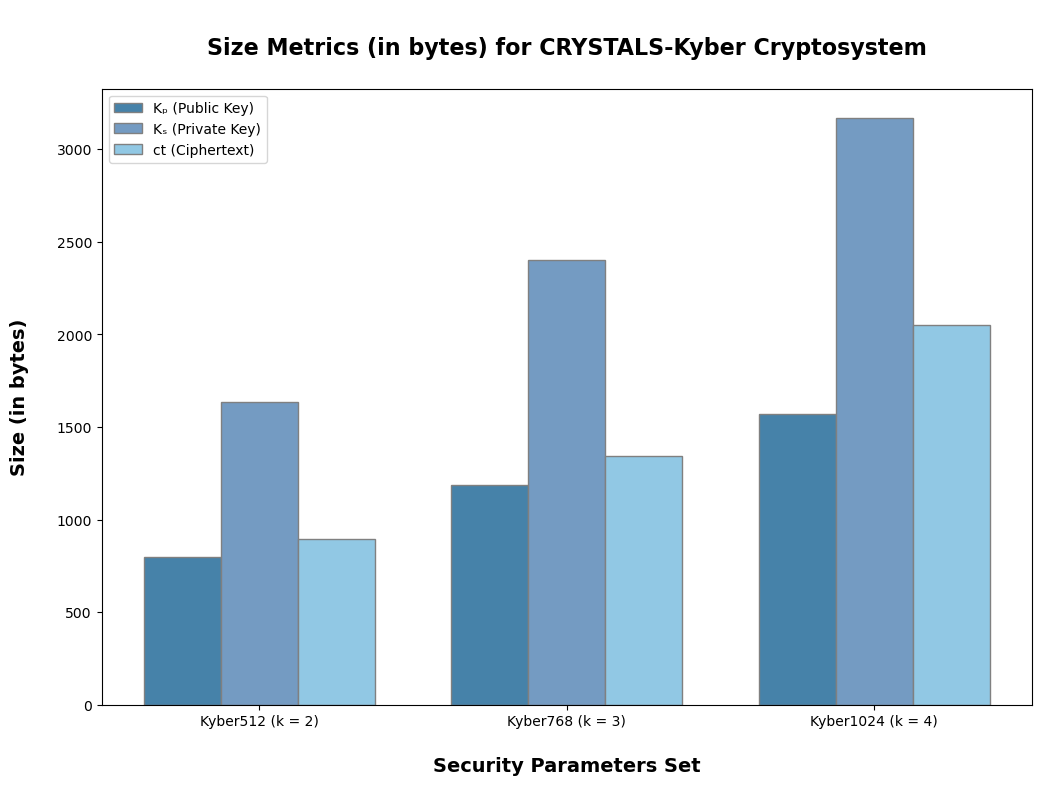

In [5]:
# Import of the NumPy (Numerical Python) library.
import numpy as num_py

# Import of the PyPlot (Python Plotting) module
# from the MatPlotLib library.
import matplotlib.pyplot as py_plot

# Import of the Warnings built-in Python library.
import warnings


# Call of instruction to ignore all warnings launched
# during the execution of this Jupyter Notebook cell.
warnings.filterwarnings("ignore")


# Creation of a Python's nested dictionary for all
# the size metrics of the CRYSTALS-Kyber's Cryptosystem.
#
# NOTE (IMPORTANT):
# - Copy/update the values, in bytes and bits, from the above
#   Jupyter Notebool cell executed with a Java Kernel;
crystals_kyber_size_metrics = \
    {  "Kyber512": {"num_pub_key_bytes": 800,
                    "num_pub_key_bits": 6400,
                    "num_priv_key_bytes": 1632,
                    "num_priv_key_bits": 13056,
                    "num_ciphertext_bytes": 896,
                    "num_ciphertext_bits": 7168},
       "Kyber768": {"num_pub_key_bytes": 1184,
                    "num_pub_key_bits": 9472,
                    "num_priv_key_bytes": 2400,
                    "num_priv_key_bits": 19200,
                    "num_ciphertext_bytes": 1344,
                    "num_ciphertext_bits": 10752},
      "Kyber1024": {"num_pub_key_bytes": 1568,
                    "num_pub_key_bits": 12544,
                    "num_priv_key_bytes": 3168,
                    "num_priv_key_bits": 25344,
                    "num_ciphertext_bytes": 2048,
                    "num_ciphertext_bits": 16384} }


# Setting of the width of each bar in the plots.
bar_width = 0.25

# Creation of a figure made of sub-plots generated
# by the PyPlot (Python Plotting) module
# from the MatPlotLib library.
figure = py_plot.subplots( figsize = (12, 8) )

# Setting of the individual data for the size of the asymmetric public keys for each
# Security Parameter Set used by the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
num_pub_keys_bytes = [ crystals_kyber_size_metrics["Kyber512"]["num_pub_key_bytes"],
                       crystals_kyber_size_metrics["Kyber768"]["num_pub_key_bytes"],
                       crystals_kyber_size_metrics["Kyber1024"]["num_pub_key_bytes"] ]

# Setting of the individual data for the size of the asymmetric private keys for each
# Security Parameter Set used by the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
num_priv_key_bytes = [ crystals_kyber_size_metrics["Kyber512"]["num_priv_key_bytes"],
                       crystals_kyber_size_metrics["Kyber768"]["num_priv_key_bytes"],
                       crystals_kyber_size_metrics["Kyber1024"]["num_priv_key_bytes"] ]

# Setting of the individual data for the size of the ciphertexts for each
# Security Parameter Set used by the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
num_ciphertext_bytes = [ crystals_kyber_size_metrics["Kyber512"]["num_ciphertext_bytes"],
                         crystals_kyber_size_metrics["Kyber768"]["num_ciphertext_bytes"],
                         crystals_kyber_size_metrics["Kyber1024"]["num_ciphertext_bytes"] ]
 
# Setting of the positions of the several bars on the X-axis.
bar_1 = num_py.arange(3)
bar_2 = [ ( x + bar_width ) for x in bar_1 ]
bar_3 = [ ( x + bar_width ) for x in bar_2 ]
 
# Construction of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
py_plot.bar( bar_1, num_pub_keys_bytes,
             color = "#4682A9", edgecolor = "grey",
             width = bar_width, label = "Kₚ (Public Key)" )
py_plot.bar( bar_2, num_priv_key_bytes,
             color = "#749BC2", edgecolor = "grey",
             width = bar_width, label = "Kₛ (Private Key)" )
py_plot.bar( bar_3, num_ciphertext_bytes,
             color = "#91C8E4", edgecolor = "grey",
             width = bar_width, label = "ct (Ciphertext)" )

# Addition of the title of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
py_plot.title( "\nSize Metrics (in bytes) for CRYSTALS-Kyber Cryptosystem\n",
               fontweight = "bold", fontsize = 16 )

# Addition of the labels for the X-axis and Y-axis of
# the bar plots for each Security Parameter Set used by
# the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
py_plot.xlabel( "\nSecurity Parameters Set", fontweight = "bold", fontsize = 14 )
py_plot.ylabel( "Size (in bytes)\n", fontweight = "bold", fontsize = 14 )

# Adding of the X-Ticks to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
py_plot.xticks( [ param_idx + bar_width for param_idx in range(3) ],
                [ "Kyber512 (k = 2)", "Kyber768 (k = 3)", "Kyber1024 (k = 4)" ] )

# Addition of the legend/caption to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
py_plot.legend()

# Showing of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
py_plot.show()

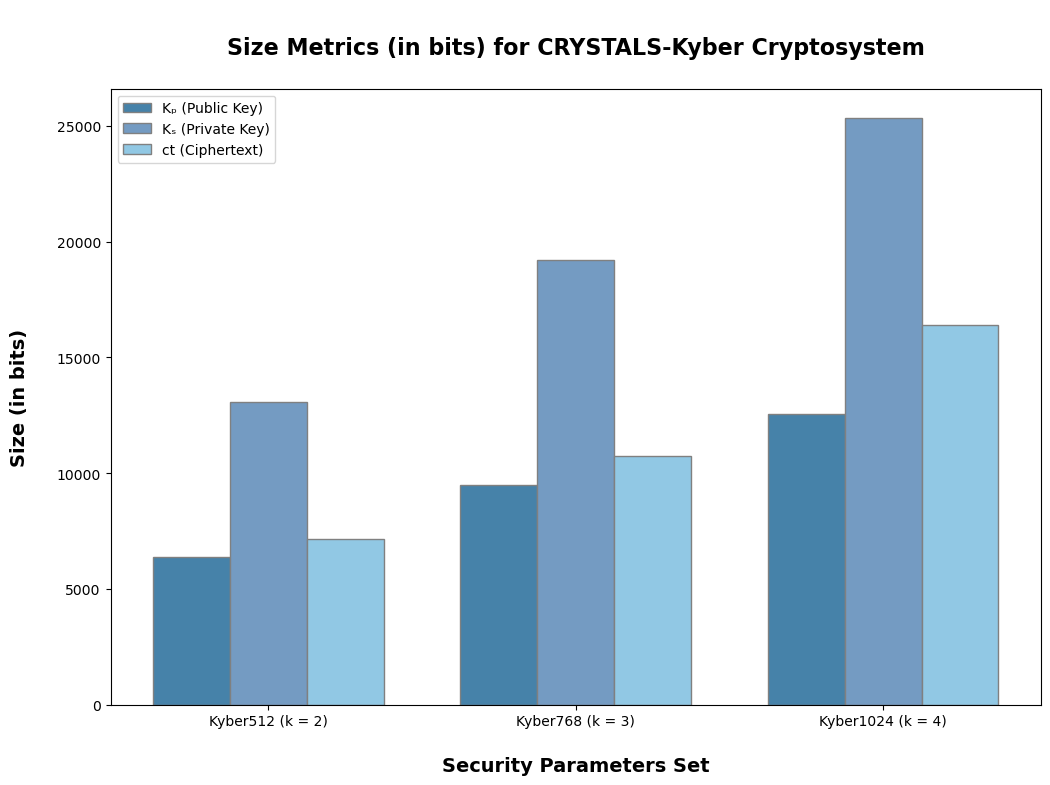

In [6]:
# Import of the NumPy (Numerical Python) library.
import numpy as num_py

# Import of the PyPlot (Python Plotting) module
# from the MatPlotLib library.
import matplotlib.pyplot as py_plot

# Import of the Warnings built-in Python library.
import warnings


# Call of instruction to ignore all warnings launched
# during the execution of this Jupyter Notebook cell.
warnings.filterwarnings("ignore")


# Creation of a Python's nested dictionary for all
# the size metrics of the CRYSTALS-Kyber's Cryptosystem.
#
# NOTE (IMPORTANT):
# - Copy/update the values, in bytes and bits, from the above
#   Jupyter Notebool cell executed with a Java Kernel;
crystals_kyber_size_metrics = \
    {  "Kyber512": {"num_pub_key_bytes": 800,
                    "num_pub_key_bits": 6400,
                    "num_priv_key_bytes": 1632,
                    "num_priv_key_bits": 13056,
                    "num_ciphertext_bytes": 896,
                    "num_ciphertext_bits": 7168},
       "Kyber768": {"num_pub_key_bytes": 1184,
                    "num_pub_key_bits": 9472,
                    "num_priv_key_bytes": 2400,
                    "num_priv_key_bits": 19200,
                    "num_ciphertext_bytes": 1344,
                    "num_ciphertext_bits": 10752},
      "Kyber1024": {"num_pub_key_bytes": 1568,
                    "num_pub_key_bits": 12544,
                    "num_priv_key_bytes": 3168,
                    "num_priv_key_bits": 25344,
                    "num_ciphertext_bytes": 2048,
                    "num_ciphertext_bits": 16384} }


# Setting of the width of each bar in the plots.
bar_width = 0.25

# Creation of a figure made of sub-plots generated
# by the PyPlot (Python Plotting) module
# from the MatPlotLib library.
figure = py_plot.subplots( figsize = (12, 8) )

# Setting of the individual data for the size of the asymmetric public keys for each
# Security Parameter Set used by the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
num_pub_keys_bits = [ crystals_kyber_size_metrics["Kyber512"]["num_pub_key_bits"],
                      crystals_kyber_size_metrics["Kyber768"]["num_pub_key_bits"],
                      crystals_kyber_size_metrics["Kyber1024"]["num_pub_key_bits"] ]

# Setting of the individual data for the size of the asymmetric private keys for each
# Security Parameter Set used by the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
num_priv_key_bits = [ crystals_kyber_size_metrics["Kyber512"]["num_priv_key_bits"],
                      crystals_kyber_size_metrics["Kyber768"]["num_priv_key_bits"],
                      crystals_kyber_size_metrics["Kyber1024"]["num_priv_key_bits"] ]

# Setting of the individual data for the size of the ciphertexts for each
# Security Parameter Set used by the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
num_ciphertext_bits = [ crystals_kyber_size_metrics["Kyber512"]["num_ciphertext_bits"],
                        crystals_kyber_size_metrics["Kyber768"]["num_ciphertext_bits"],
                        crystals_kyber_size_metrics["Kyber1024"]["num_ciphertext_bits"] ]
 
# Setting of the positions of the several bars on the X-axis.
bar_1 = num_py.arange(3)
bar_2 = [ ( x + bar_width ) for x in bar_1 ]
bar_3 = [ ( x + bar_width ) for x in bar_2 ]
 
# Construction of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
py_plot.bar( bar_1, num_pub_keys_bits,
             color = "#4682A9", edgecolor = "grey",
             width = bar_width, label = "Kₚ (Public Key)" )
py_plot.bar( bar_2, num_priv_key_bits,
             color = "#749BC2", edgecolor = "grey",
             width = bar_width, label = "Kₛ (Private Key)" )
py_plot.bar( bar_3, num_ciphertext_bits,
             color = "#91C8E4", edgecolor = "grey",
             width = bar_width, label = "ct (Ciphertext)" )

# Addition of the title of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
py_plot.title( "\nSize Metrics (in bits) for CRYSTALS-Kyber Cryptosystem\n",
               fontweight = "bold", fontsize = 16 )

# Addition of the labels for the X-axis and Y-axis of
# the bar plots for each Security Parameter Set used by
# the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
py_plot.xlabel( "\nSecurity Parameters Set", fontweight = "bold", fontsize = 14 )
py_plot.ylabel( "Size (in bits)\n", fontweight = "bold", fontsize = 14 )

# Adding of the X-Ticks to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
py_plot.xticks( [ ( param_idx + bar_width ) for param_idx in range(3) ],
                [ "Kyber512 (k = 2)", "Kyber768 (k = 3)", "Kyber1024 (k = 4)" ] )

# Addition of the legend/caption to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
py_plot.legend()

# Showing of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
py_plot.show()

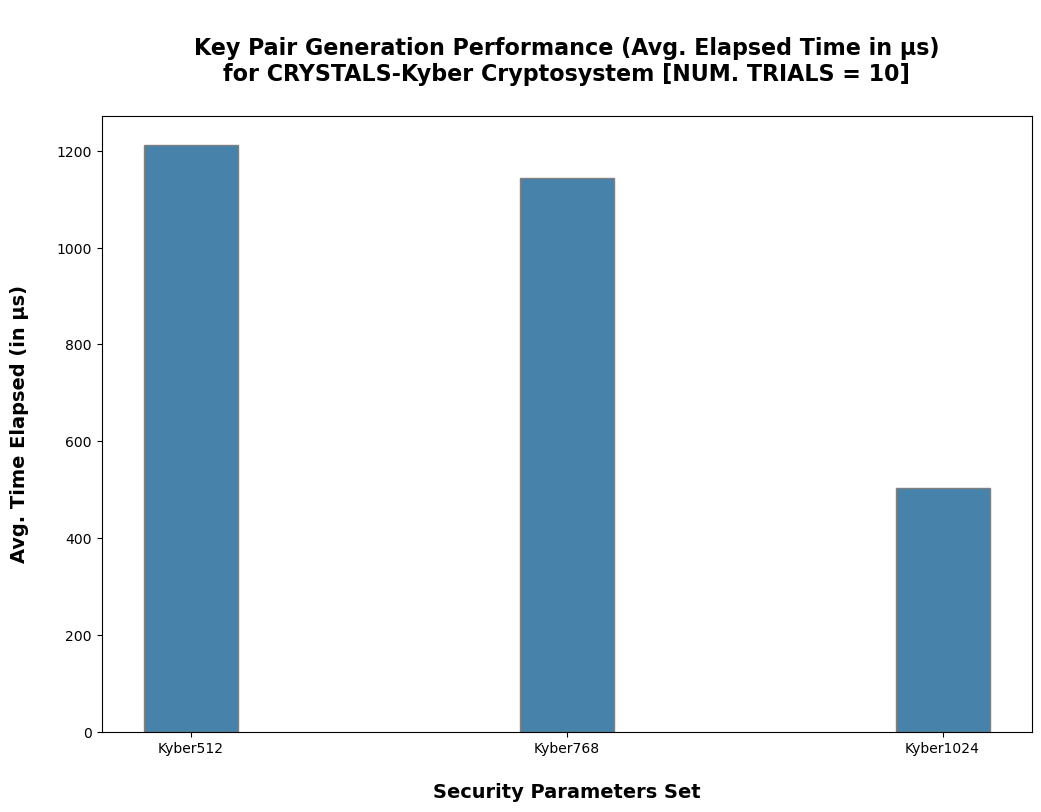

In [7]:
# Import of the NumPy (Numerical Python) library.
import numpy as num_py

# Import of the PyPlot (Python Plotting) module
# from the MatPlotLib library.
import matplotlib.pyplot as py_plot

# Import of the Warnings built-in Python library.
import warnings


# Call of instruction to ignore all warnings launched
# during the execution of this Jupyter Notebook cell.
warnings.filterwarnings("ignore")


# Definition of the number of trials used to estimate
# the average times for all the key pair generation
# performance metrics of the CRYSTALS-Kyber's Cryptosystem.
NUM_TRIALS = 10


# Creation of a Python's nested dictionary for all
# the key pair generation performance metrics of
# the CRYSTALS-Kyber's Cryptosystem.
#
# NOTE (IMPORTANT):
# - Copy the values, in microseconds (μs), from the above
#   Jupyter Notebool cell executed with a Java Kernel;
crystals_kyber_key_pair_generation_performance_metrics = \
    {  "Kyber512": 1211.917,
       "Kyber768": 1142.841,
      "Kyber1024": 502.913 }


# Setting of the width of each bar in the plots.
bar_width = 0.25

# Creation of a figure made of sub-plots generated
# by the PyPlot (Python Plotting) module
# from the MatPlotLib library.
figure = py_plot.subplots( figsize = (12, 8) )
 
# Construction of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of microseconds (μs).
py_plot.bar( crystals_kyber_key_pair_generation_performance_metrics.keys(),
             crystals_kyber_key_pair_generation_performance_metrics.values(),
             color = "#4682A9", edgecolor = "grey",
             width = bar_width )

# Definition of the title of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of microseconds (μs).
plot_title = "\nKey Pair Generation Performance (Avg. Elapsed Time in μs)\n"\
             "for CRYSTALS-Kyber Cryptosystem [NUM. TRIALS = {num_trials}]\n"\
             .format(num_trials = NUM_TRIALS)

# Addition of the title of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of microseconds (μs).
py_plot.title( plot_title, fontweight = "bold", fontsize = 16 )

# Addition of the labels for the X-axis and Y-axis of
# the bar plots for each Security Parameter Set used by
# the CRYSTALS-Kyber's Cryptosystem, in terms of microseconds (μs).
py_plot.xlabel( "\nSecurity Parameters Set", fontweight = "bold", fontsize = 14 )
py_plot.ylabel( "Avg. Time Elapsed (in μs)\n", fontweight = "bold", fontsize = 14 )

# Showing of the bar plots for each Security Parameter Set used by
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of microseconds (μs).
py_plot.show()

***

### Demonstration for the IND-CCA2 KEM<br>using the CRYSTALS-Kyber Cryptosystem

In [8]:
// Import of all the required modules and sub-libraries.

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, for use of basic cryptography.
import org.bouncycastle.crypto.AsymmetricCipherKeyPair;
import org.bouncycastle.crypto.SecretWithEncapsulation;
import org.bouncycastle.crypto.params.AsymmetricKeyParameter;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the use of
// Key Encapsulation Methods/Mechanisms (KEMs).
import org.bouncycastle.jcajce.SecretKeyWithEncapsulation;
import org.bouncycastle.jcajce.spec.KEMExtractSpec;
import org.bouncycastle.jcajce.spec.KEMGenerateSpec;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the provider of
// (Classical) Post-Quantum Cryptography.
import org.bouncycastle.pqc.jcajce.provider.BouncyCastlePQCProvider;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the CRYSTALS-Kyber
// Public-Key Cryptosystem's Parameter Specifications.
import org.bouncycastle.pqc.jcajce.spec.KyberParameterSpec;

// Import of all the required modules and sub-libraries required of
// the Bouncy Castle library, regarding the CRYSTALS-Kyber Cryptosystem.
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberParameters;
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberKeyGenerationParameters;
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberKeyPairGenerator;
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberPrivateKeyParameters;
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberPublicKeyParameters;
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberKEMGenerator;
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberKEMExtractor;


// Import of all the required modules and sub-libraries
// required of the built-in security module of Java.
import java.security.InvalidAlgorithmParameterException;
import java.security.KeyFactory;
import java.security.NoSuchAlgorithmException;
import java.security.NoSuchProviderException;
import java.security.PrivateKey;
import java.security.PublicKey;
import java.security.SecureRandom;
import java.security.Security;
import java.security.spec.InvalidKeySpecException;
import java.security.spec.X509EncodedKeySpec;


import org.bouncycastle.util.Arrays;


// Definition of all the required constant values.

// Definition of the size of a byte
// with the respective number of bits.
final short BYTE_SIZE_IN_BITS = 8;

// Definition of the number of possible
// binary digits (bits) for a hexadecimal character.
final short NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR = 16;



// Definition of all the required classes.

// Definition of class of Public-Key (Asymmetric) Cryptosystem
// CRYSTALS-Kyber (CRYptographic SuiTe for Algebraic LatticeS - Kyber),
// which is a (Classical) Post-Quantum Cryptosystem
// (supposed to be secure against classical and quantum attacks),
// and based on computational hardness of mathematical problems
// derived from the well-known lattices algebraic structures,
// most specifically, in the LWE (Learning With Errors) Problem.
class CrystalsKyberCryptosystem {
    
    // Definition of all the required constant values,
    // regarding the class of the CRYSTALS-Kyber Public-Key Cryptosystem.
    
    // Setting of the string array with the names of
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    public final String[]
        security_parameters_names = {
    
        // 1) Security Parameters Set with a factor of 2 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 64 bits, designed for
        //    the distribution of symmetric session keys of 128 bits.
        "Kyber512",
        
        // 2) Security Parameters Set with a factor of 3 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits, designed for
        //    the distribution of symmetric session keys of 192 bits.
        "Kyber768",
        
        // 3) Security Parameters Set with a factor of 4 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits, designed for
        //    the distribution of symmetric session keys of 256 bits.
        "Kyber1024"
    
    };

    
    // Setting of the string array with the names and
    // definitions of the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    public final String[] 
        security_parameters_names_and_descriptions = {
    
        // 1) Security Parameters Set with a factor of k = 2 ( k x n = 2 x 256 = 512 )
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 64 bits, designed for
        //    the distribution of symmetric session keys of 128 bits.
        //    NOTE: The Kyber512 has a NIST (Classical) Post-Quantum
        //          Security Level of 1 (≈ exhaustive search on AES-128).
        "=> Kyber512: Security Parameters Set with a factor of k = 2 ( k x n = 2 x 256 = 512 )\n   " +
        "             for the size of the lattice algebraic structure, which provides\n   " +
        "             a (post-quantum) security strength of 64 bits, designed for\n   " +
        "             the distribution of symmetric session keys of 128 bits.\n\n   " +
        "             NOTE: The Kyber512 Cryptosystem has a NIST (Classical)\n   " +
        "                   Post-Quantum Security Level of 1 (≈ exhaustive search on AES-128).",
        
        // 2) Security Parameters Set with a factor of k = 3 ( k x n = 3 x 256 = 768 )
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits, designed for
        //    the distribution of symmetric session keys of 192 bits.
        //    NOTE: The Kyber512 has a NIST (Classical) Post-Quantum
        //          Security Level of 1 (≈ exhaustive search on AES-192).
        "=> Kyber768: Security Parameters Set with a factor of k = 3 ( k x n = 3 x 256 = 768 )\n   " +
        "             for the size of the lattice algebraic structure, which provides\n   " +
        "             a (post-quantum) security strength of 96 bits, designed for\n   " +
        "             the distribution of symmetric session keys of 192 bits.\n\n   " +
        "             NOTE: The Kyber768 Cryptosystem has a NIST (Classical)\n   " +
        "                   Post-Quantum Security Level of 3 (≈ exhaustive search on AES-192).",
        
        // 3) Security Parameters Set with a factor of k = 4 ( k x n = 4 x 256 = 1024 )
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits, designed for
        //    the distribution of symmetric session keys of 256 bits.
        //    NOTE: The Kyber512 has a NIST (Classical) Post-Quantum
        //          Security Level of 1 (≈ exhaustive search on AES-256).
        "=> Kyber1024: Security Parameters Set with a factor of k = 4 ( k x n = 4 x 256 = 1024 )\n   " +
        "              for the size of the lattice algebraic structure, which provides\n   " +
        "              a (post-quantum) security strength of 128 bits, designed for\n   " +
        "              the distribution of symmetric session keys of 256 bits.\n\n   " +
        "              NOTE: The Kyber1024 Cryptosystem has a NIST (Classical)\n   " +
        "                    Post-Quantum Security Level of 5 (≈ exhaustive search on AES-256)."
        
    };
    
    
    // Setting of the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    public final KyberParameterSpec[] 
        security_parameters_specifications = {
        
        // 1) Security Parameters Set with a factor of 2 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 64 bits, designed for
        //    the distribution of symmetric session keys of 128 bits.
        KyberParameterSpec.kyber512,
        
        // 2) Security Parameters Set with a factor of 3 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits, designed for
        //    the distribution of symmetric session keys of 192 bits.
        KyberParameterSpec.kyber768,
        
        // 3) Security Parameters Set with a factor of 4 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits, designed for
        //    the distribution of symmetric session keys of 256 bits.
        KyberParameterSpec.kyber1024
        
    };
    
    
    // Definition of all the required variable values,
    // regarding the class of the CRYSTALS-Kyber Public-Key Cryptosystem.
    
    // Definition of the parameter choice index for
    // the generation of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    private short parameter_choice_index;
    
    // Definition of the general parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private KyberParameters parameters;
    
    // Definition of the Java's Secure Random to act as
    // Pseudo-Random Generator (PRG) for the generation of
    // the instance of the Key Pair to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    private SecureRandom secure_pseudo_random_generator_key_pair_generation;
    
    // Definition of the key generation parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private KyberKeyGenerationParameters key_generation_parameters;

    // Definition of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private AsymmetricCipherKeyPair asymmetric_key_pair;
    
    // Definition of the Java's Secure Random to act as
    // Pseudo-Random Generator (PRG) for the generation of
    // the instance of the KEM (Key Encapsulation Method/Mechanism)
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private SecureRandom secure_pseudo_random_generator_kem_generation;
    
    // Definition of the generation of the instance of
    // the KEM (Key Encapsulation Method/Mechanism)
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private KyberKEMGenerator key_encapsulation_method_generation;
    
    // Definition of the extraction of the instance of
    // the KEM (Key Encapsulation Method/Mechanism)
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private KyberKEMExtractor key_encapsulation_method_extraction;
    
    // Definition of the payload of the public key
    // shared by the other party and to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of a public key of the cryptosystem.
    private KyberPublicKeyParameters public_key_shared_other_party_payload;
    
    // Definition of the symmetric secret key encapsulated
    // using the CRYSTALS-Kyber Public-Key Cryptosystem.
    private SecretWithEncapsulation symmetric_secret_key_encapsulated;
    
    // Definition of the encoding of the symmetric
    // secret key exchanged using the CRYSTALS-Kyber
    // Public-Key Cryptosystem, as a byte array.
    private byte[] symmetric_secret_key_exchanged_encoded_bytes;
    
    
    // Constructor of the class of the CRYSTALS-Kyber Public-Key Cryptosystem,
    // and the initialization of the initial required parameters.
    //    Parameters:
    //    @param parameter_choice_index: The parameter choice index for
    //                                   the generation of the pair of
    //                                   asymmetric keys to be used.
    public CrystalsKyberCryptosystem( short parameter_choice_index ) {
        
        // Addition of the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java.
        this.add_classical_post_quantum_cryptography_bouncy_castle_provider();
        
        // Initialization of the parameter choice index for
        // the generation of the pair of asymmetric keys to be used.
        this.parameter_choice_index = parameter_choice_index;
        
        // Initialization of the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, as a null object.
        this.parameters = null;
        
        // Initialization of the Java's Secure Random
        // to act as Pseudo-Random Generator (PRG) for
        // the generation of the instance of the Key Pair
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        this.secure_pseudo_random_generator_key_pair_generation = 
            new SecureRandom();
        
        // Initialization of the key generation parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, as a null object.
        this.key_generation_parameters = null;
        
        // Initialization of the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, as a null object.
        this.asymmetric_key_pair = null;
    
        // Initialization of the Java's Secure Random
        // to act as Pseudo-Random Generator (PRG) for
        // the generation of the instance of the KEM
        // (Key Encapsulation Method/Mechanism) to be used
        // by the CRYSTALS-Kyber Public-Key Cryptosystem.
        this.secure_pseudo_random_generator_kem_generation = 
            new SecureRandom();
        
        // Initialization of the generation the instance of
        // the KEM (Key Encapsulation Method/Mechanism) to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, as a null object.
        this.key_encapsulation_method_generation = null;
        
        // Initialization of the extraction the instance of
        // the KEM (Key Encapsulation Method/Mechanism) to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, as a null object.
        this.key_encapsulation_method_extraction = null;
        
        // Initialization of the payload of the public key
        // shared by the other party and to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // as a proper object of a public key of
        // the cryptosystem, as a null object.
        this.public_key_shared_other_party_payload = null;
    
        // Initialization of the symmetric secret key
        // encapsulated using the CRYSTALS-Kyber
        // Public-Key Cryptosystem, as a null object.
        this.symmetric_secret_key_encapsulated = null;
    
        // Initialization of the the encoding of the symmetric
        // secret key exchanged using the CRYSTALS-Kyber
        // Public-Key Cryptosystem, as a null object.
        this.symmetric_secret_key_exchanged_encoded_bytes = null;
        
    }
    
    
    // Methods of the class of the Public-Key (Asymmetric) Cryptosystem
    // CRYSTALS-Kyber (CRYptographic SuiTe for Algebraic LatticeS - Kyber).
    
    // Method to add the (Classical) Post-Quantum Cryptography
    // provider of the Bouncy Castle library for Java,
    // to the built-in security module of Java.
    public void add_classical_post_quantum_cryptography_bouncy_castle_provider() {
        
        // If the built-in security module of Java does not find or
        // not have the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java,
        // denoted as BCPQC (Bouncy Castle - Post-Quantum Cryptography).
        if( Security.getProvider( "BCPQC" ) == null ) {
         
            // Addition of the (Classical) Post-Quantum Cryptography
            // provider of the Bouncy Castle library for Java,
            // to the built-in security module of Java.
            Security.addProvider( new BouncyCastlePQCProvider() );
        
        }
        
    }
    
    
    // Method to obtain the parameter choice index defined for
    // the generation of the pair of asymmetric keys to be used.
    public short get_parameter_choice_index() {
        
        // Return of the parameter choice index defined for
        // the generation of the pair of asymmetric keys to be used.
        return this.parameter_choice_index;
        
    }
    
    
    // Method to obtain the string with the name of
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    public String get_security_parameters_name() {
        
        // Return of the string with the name of
        // the CRYSTALS-Kyber Public-Key Cryptosystem's
        // Security Parameters defined for the key pair generation
        // (consisting on private and public keys), as well as
        // the respective Key Encapsulation Method/Mechanism (KEM).
        return security_parameters_names[ this.parameter_choice_index ];
        
    }
    

    // Method to obtain the string with the name and
    // description of the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    public String get_security_parameters_name_and_description() {
        
        // Return of the string with the name and description of
        // the CRYSTALS-Kyber Public-Key Cryptosystem's
        // Security Parameters defined for the key pair generation
        // (consisting on private and public keys), as well as
        // the respective Key Encapsulation Method/Mechanism (KEM).
        return security_parameters_names_and_descriptions[ this.parameter_choice_index ];
        
    }
       
        
    // Method to obtain the CRYSTALS-Kyber Public-Key
    // Cryptosystem's Security Parameters Specifications.
    public KyberParameterSpec get_security_parameters_specifications() {
        
        // Return of the CRYSTALS-Kyber Public-Key
        // Cryptosystem's Security Parameters Specifications.
        return security_parameters_specifications[ this.parameter_choice_index ];
        
    }
    
    
    // Method to initialize the general parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public void initialize_parameters() {
        
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // corresponds to the 'Kyber512' Security Parameter Set.
        if( this.parameter_choice_index == 0 ) {
            
            // Setting the 'Kyber512' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            this.parameters = KyberParameters.kyber512;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // corresponds to the 'Kyber768' Security Parameter Set.
        else if( this.parameter_choice_index == 1 ) {
            
            // Setting the 'Kyber768' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            this.parameters = KyberParameters.kyber768;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // corresponds to the 'Kyber1024' Security Parameter Set.
        else if( this.parameter_choice_index == 2 ) {
            
            // Setting the 'Kyber1024' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            this.parameters = KyberParameters.kyber1024;
            
        }
        
    }
    

    // Method to obtain the general parameters to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberParameters get_parameters() {
        
        // Return of the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.parameters;
        
    }


    // Method to obtain the size of the symmetric session key, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_session_key_bytes_size() {
        
        // If the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not null (i.e., already initialized).
        if( this.get_parameters() != null ) {
            
            // Return of the size of the symmetric session key, in terms of bytes,
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( this.get_session_key_bits_size() / 
                     BYTE_SIZE_IN_BITS );
            
        }
        // If the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is null (i.e., not initialized yet).
        else {
            
            // Return of an invalid size of the symmetric session key, in terms of bytes,
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;

        }
        
    }
    
    
    // Method to obtain the size of the symmetric session key, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_session_key_bits_size() {
        
        // If the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not null (i.e., already initialized).
        if( this.get_parameters() != null ) {
            
            // Return of the size of the symmetric session key, in terms of bits,
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_parameters().getSessionKeySize();
            
        }
        // If the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is null (i.e., not initialized yet).
        else {
            
            // Return of an invalid size of the symmetric session key, in terms of bits,
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;

        }
        
    }


    // Method to obtain the Java's Secure Random to act as
    // Pseudo-Random Generator (PRG) for the key pair generation to
    // be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public SecureRandom get_secure_pseudo_random_generator_key_pair_generation() {
            
        // Return of the Java's Secure Random to act as
        // Pseudo-Random Generator (PRG) for the key pair generation to
        // be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.secure_pseudo_random_generator_key_pair_generation;
    
    }
    
    
    // Method to initialize the key generation parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public void initialize_key_generation_parameters() {
        
        // If the the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, are not null.
        if( this.get_parameters() != null ) {
        
            // Initialization of the key generation parameters to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            this.key_generation_parameters = 
                new KyberKeyGenerationParameters
                    ( this.secure_pseudo_random_generator_key_pair_generation,
                      this.parameters );
        
        }
        
    }
    
    
    // Method to obtain the key generation parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberKeyGenerationParameters get_key_generation_parameters() {
        
        // Return of the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.key_generation_parameters;
        
    }
    
    
    // Method to initialize the generation of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem. 
    public void initialize_asymmetric_key_pair_generation() {
       
        // Creation of the generator of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        KyberKeyPairGenerator crystals_kyber_key_pair_generator = 
            new KyberKeyPairGenerator();

        // Initialization of the generator of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // using the Security Parameters set defined before.
        crystals_kyber_key_pair_generator
            .init( this.key_generation_parameters );

        // Generation of the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        this.asymmetric_key_pair = 
            crystals_kyber_key_pair_generator.generateKeyPair();
            
    }
    
    
    // Method to obtain the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public AsymmetricCipherKeyPair get_asymmetric_key_pair() {
        
        // Return of the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.asymmetric_key_pair;
        
    }
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public AsymmetricKeyParameter get_public_key() {
        
        // If the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_asymmetric_key_pair().getPublic();
            
        }
        // If the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of an invalid public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the public key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberPublicKeyParameters get_public_key_parameters() {
        
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {
            
            // Return of the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( ( KyberPublicKeyParameters ) this.get_public_key() );
            
        }
        // If the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of an invalid public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the target solution t
    // (i.e. the target solution vector for
    // the mathematical equation A x s + e = t),
    // encoded (and compressed) in bytes,
    // representing a lattice-based problem in
    // the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public byte[] get_target_solution_t_from_public_key_parameters() {
        
        // If the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
            
            // Return of the target solution t
            // (i.e. the target solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_public_key_parameters().getT();
            
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of an invalid target solution t
            // (i.e. the target solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from will be expanded and
    // obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes,
    // representing a lattice-based problem in the form of a
    // MLWE (Module-Learning With Errors), retrieved from
    // the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public byte[] get_pseudo_random_seed_rho_from_public_key_parameters() {
        
        // If the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
            
            // Return of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes,
            // representing a lattice-based problem in the form of a
            // MLWE (Module-Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_public_key_parameters().getRho();
            
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes,
            // representing a lattice-based problem in the form of a
            // MLWE (Module-Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // being encoded as an array of bytes.
    public byte[] get_public_key_encoded_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {

            // Retrieval of the public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes.
            byte[] public_key_encoded_bytes = 
                 ( ( KyberPublicKeyParameters ) this.get_public_key() ).getEncoded();
            

            // Return of the public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes.
            return public_key_encoded_bytes;
        
        }
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
        
            // Return of an invalid public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes.
            return null;
            
        }
        
    }
    

    // Method to obtain the size of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as being encoded as an array of bytes.
    public int get_public_key_size_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return this.get_public_key_encoded_bytes().length;
        
        }
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return 0;
            
        }
 
    }
    
    
    // Method to obtain the size of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as being encoded as an array of bits.
    public int get_public_key_size_bits() {
        
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bits.
            return ( this.get_public_key_size_bytes() *
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of public key of the cryptosystem,
    // using the associated Security Parameters.
    public KyberPublicKeyParameters get_public_key_payload_from_parameters() {
        
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {

            // Retrieval of the cipher parameters from
            // the key generation parameters to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            KyberParameters crystals_kyber_cryptosystem_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // which will be used to build public key payload.

            // Retrieval of the target solution t
            // (i.e. the target solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes.
            byte[] target_solution_t = 
                this.get_target_solution_t_from_public_key_parameters();

            // Retrieval of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_public_key_parameters();


            // Return of the payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of public key of the cryptosystem.
            return new KyberPublicKeyParameters( crystals_kyber_cryptosystem_parameters,
                                                 target_solution_t,
                                                 pseudo_random_seed_rho );
        
        }
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of public key of
            // the cryptosystem, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of public key of the cryptosystem,
    // using the associated encoding in an array of bytes.
    public KyberPublicKeyParameters get_public_key_payload_from_encoding() {
        
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {

            // Retrieval of the cipher parameters from
            // the key generation parameters to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            KyberParameters crystals_kyber_cryptosystem_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Return of the payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of public key of the cryptosystem.
            return new KyberPublicKeyParameters( crystals_kyber_cryptosystem_parameters,
                                                 this.get_public_key_encoded_bytes() );
            
        }
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of public key of
            // the cryptosystem, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of public key of the cryptosystem.
    public KyberPublicKeyParameters get_public_key_payload() {
    
        // Return of the payload of the public key
        // from the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // as a proper object of public key of the cryptosystem.
        return this.get_public_key_payload_from_parameters();
        
    }
    

    // Method to obtain the private key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public AsymmetricKeyParameter get_private_key() {
        
        // If the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_asymmetric_key_pair().getPrivate();
            
        }
        // If the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of an invalid private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the private key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberPrivateKeyParameters get_private_key_parameters() {
        
        // If the private key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
            
            // Return of the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( ( KyberPrivateKeyParameters ) this.get_private_key() );
            
        }
        // If the private key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of an invalid private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the random secret s
    // (i.e. the secret vector in the lattice
    // algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public byte[] get_random_secret_s_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret s
            // (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_private_key_parameters().getS();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret s
            // (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the hashed public key,
    // denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public byte[] get_hashed_public_key_h_pub_k_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the hashed public key,
            // denoted as H(pub_key), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_private_key_parameters().getHPK();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are defined by a null object.
        else {
           
            // Return of an invalid hashed public key,
            // denoted as H(pub_key), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    

    // Method to obtain the random secret nonce z
    // (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext
    // Attack) property for the Asymmetric Encryption and
    // with the (INDistinguishability under Chosen Ciphertext
    // Attack) property for the KEM (Key Encapsulation
    // Method/Mechanism), retrieved from the private key
    // parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public byte[] get_random_secret_nonce_z_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret nonce z
            // (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA
            // (INDistinguishability under Chosen Plaintext
            // Attack) property for the Asymmetric Encryption and
            // with the (INDistinguishability under Chosen Ciphertext
            // Attack) property for the KEM (Key Encapsulation
            // Method/Mechanism), retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_private_key_parameters().getNonce();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret nonce z
            // (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA
            // (INDistinguishability under Chosen Plaintext
            // Attack) property for the Asymmetric Encryption and
            // with the (INDistinguishability under Chosen Ciphertext
            // Attack) property for the KEM (Key Encapsulation
            // Method/Mechanism), retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the private key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // being encoded as an array of bytes.
    public byte[] get_private_key_encoded_bytes() {
        
        // If the private key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
        
            // Retrieval of the private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes.
            byte[] private_key_encoded_bytes = 
                 ( ( KyberPrivateKeyParameters ) this.get_private_key() ).getEncoded();

            // Return of the private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes.
            return private_key_encoded_bytes;
            
        }
        // If the private key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
            
            // Return of an invalid private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size of the private key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as being encoded as an array of bytes.
    public int get_private_key_size_bytes() {
        
        // If the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, being encoded as
        // an array of bytes, is not defined as a null object.
        if( this.get_private_key_encoded_bytes() != null ) {
        
            // Return of the size of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return this.get_private_key_encoded_bytes().length;

        }
        // If the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, being encoded as
        // an array of bytes, is defined as a null object.
        else {
            
            // Return of an invalid size of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size of the private key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as being encoded as an array of bits.
    public int get_private_key_size_bits() {
        
        // If the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, being encoded as
        // an array of bytes, is not defined as a null object.
        if( this.get_private_key_encoded_bytes() != null ) {
        
            // Return of the size of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bits.
            return ( this.get_private_key_size_bytes() * 
                     BYTE_SIZE_IN_BITS );

        }
        // If the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, being encoded as
        // an array of bytes, is defined as a null object.
        else {
            
            // Return of an invalid size of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of the private key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of private key of the cryptosystem.
    public KyberPrivateKeyParameters get_private_key_payload() {
        
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are not defined as a null object.
        if( this.get_key_generation_parameters() != null ) {
            
            // Retrieval of the cipher parameters from
            // the key generation parameters to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            KyberParameters crystals_kyber_cryptosystem_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // which will be used to build private key payload.

            // Retrieval of the random secret s
            // (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes.
            byte[] random_secret_s = 
                this.get_random_secret_s_from_private_key_parameters();

            // Retrieval of the hashed public key,
            // denoted as H(pub_key), encoded in bytes.
            byte[] hashed_public_key_h_pub_k = 
                this.get_hashed_public_key_h_pub_k_from_private_key_parameters();

            // Retrieval of the random secret
            // nonce z (i.e., to avoid practical
            // fault attacks), encoded in bytes.
            byte[] random_secret_nonce_z = 
                this.get_random_secret_nonce_z_from_private_key_parameters();


            // Retrieval of the target solution t
            // (i.e. the target solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes.
            byte[] target_solution_t = 
                this.get_target_solution_t_from_public_key_parameters();

            // Retrieval of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_public_key_parameters();


            // Return of the payload of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of private key of the cryptosystem.
            return new KyberPrivateKeyParameters( crystals_kyber_cryptosystem_parameters,
                                                  random_secret_s,
                                                  hashed_public_key_h_pub_k,
                                                  random_secret_nonce_z,
                                                  target_solution_t,
                                                  pseudo_random_seed_rho );
        
        }
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are defined as a null object.
        else {
            
            // Return of an invalid payload of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of private key of
            // the cryptosystem, as a null object.
            return null;
            
        }
            
    }
    
    
    // Method to receive and set the payload of
    // the public key shared by the other party and
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of a public key of the cryptosystem. 
    public void receive_and_set_public_key_shared_other_party_payload
        ( byte[] public_key_shared_other_party_encoding_bytes ) {
        
        // Retrieval of the cipher parameters from
        // the key generation parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem.
        KyberParameters crystals_kyber_cryptosystem_parameters = 
            this.get_key_generation_parameters().getParameters();

        // Initialization of the payload of the public key
        // shared by the other party and to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // as a proper object of a public key of the cryptosystem. 
        this.public_key_shared_other_party_payload = 
            new KyberPublicKeyParameters
                ( crystals_kyber_cryptosystem_parameters,
                  public_key_shared_other_party_encoding_bytes );
        
    }
    
    
    // Method to obtain the payload of the public key
    // shared by the other party and to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of a public key of the cryptosystem. 
    public KyberPublicKeyParameters get_public_key_shared_other_party_payload() {
        
        // Return of the payload of the public key
        // shared by the other party and to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // as a proper object of a public key of the cryptosystem.
        return this.public_key_shared_other_party_payload;
        
    }
    
    
    // Method to obtain the Java's Secure Random to
    // act as Pseudo-Random Generator (PRG) for
    // the KEM (Key Encapsulation Method/Mechanism) generation to
    // be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public SecureRandom get_secure_pseudo_random_generator_kem_generation() {
            
        // Return of the Java's Secure Random to
        // act as Pseudo-Random Generator (PRG) for
        // the KEM (Key Encapsulation Method/Mechanism) generation to
        // be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.secure_pseudo_random_generator_kem_generation;
    
    }
    
    
    // Method to initialize the generation of the instance of
    // the KEM (Key Encapsulation Method/Mechanism) to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    public void initialize_key_encapsulation_method_generation() {
       
        // Initialization of the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism) to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        this.key_encapsulation_method_generation = 
            new KyberKEMGenerator
                ( this.secure_pseudo_random_generator_kem_generation );
        
    }
        
    
    // Method to obtain the generation of the instance of
    // the KEM (Key Encapsulation Method/Mechanism) to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberKEMGenerator get_key_encapsulation_method_generation() {
       
        // Return of the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism) to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        return this.key_encapsulation_method_generation;
        
    }
    
    
    // Method to perform the encapsulation of the symmetric
    // secret key to be distributed and shared to the other party,
    // using the CRYSTALS-Kyber Public-Key Cryptosystem.
    public void encapsulate_symmetric_secret_key() {
        
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism) to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem
        // is not defined by a null object.
        if( this.get_key_encapsulation_method_generation() != null ) {

            // If the payload of the public key
            // shared by the other party and to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of a public key of
            // the cryptosystem is not defined by a null object.
            if( this.get_public_key_shared_other_party_payload() != null ) {
            
                // Initialization of the encapsulation of the symmetric
                // secret key to be distributed and shared to the other party,
                // using the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.symmetric_secret_key_encapsulated = 
                        this.get_key_encapsulation_method_generation()
                                .generateEncapsulated
                                ( this.get_public_key_shared_other_party_payload() );
                
                // Initialization of the the encoding of the symmetric
                // secret key exchanged using the CRYSTALS-Kyber
                // Public-Key Cryptosystem, with the respective secret.
                this.initialize_symmetric_secret_key_exchanged_encoded_bytes
                        ( this.get_symmetric_secret_key_encapsulated().getSecret() );
                
            }
            
        }
        
    }
    
    
    // Method to obtain the encapsulation of the symmetric
    // secret key to be distributed and shared to the other party,
    // using the CRYSTALS-Kyber Public-Key Cryptosystem.
    public SecretWithEncapsulation get_symmetric_secret_key_encapsulated() {
        
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism) to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem
        // is not defined by a null object.
        if( this.get_key_encapsulation_method_generation() != null ) {

            // If the payload of the public key
            // shared by the other party and to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of a public key of
            // the cryptosystem is not defined by a null object.
            if( this.get_public_key_shared_other_party_payload() != null ) {
            
                // Return of the encapsulation of the symmetric
                // secret key to be distributed and shared to the other party,
                // using the CRYSTALS-Kyber Public-Key Cryptosystem.
                return this.symmetric_secret_key_encapsulated;
                
            }
            // If the payload of the public key
            // shared by the other party and to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of a public key of
            // the cryptosystem is defined by a null object.
            else {

                // Return of an invalid encapsulation of
                // the symmetric secret key to be distributed
                // and shared to the other party, using
                // the CRYSTALS-Kyber Public-Key Cryptosystem,
                // as a null object.
                return null;

            }
            
        }
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism) to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem
        // is defined by a null object.
        else {
            
            // Return of an invalid encapsulation of
            // the symmetric secret key to be distributed
            // and shared to the other party, using
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the symmetric secret key,
    // as a byte array, extracted from the encapsulation of
    // the symmetric secret key to be distributed and shared to
    // the other party, using the CRYSTALS-Kyber Public-Key Cryptosystem. 
    public byte[] get_symmetric_secret_key_bytes_from_encapsulation() {
        
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism)
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem is not defined by a null object.
        if( this.get_key_encapsulation_method_generation() != null ) {
        
            // Return of the symmetric secret key, as a byte array,
            // extracted from the encapsulation of the symmetric
            // secret key to be distributed and shared to the other party,
            // using the CRYSTALS-Kyber Public-Key Cryptosystem. 
            return this.get_symmetric_secret_key_encapsulated().getSecret();
            
        }
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism)
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem is defined by a null object.
        else {
            
            // Return of the symmetric secret key, as a byte array,
            // extracted from the encapsulation of the symmetric
            // secret key to be distributed and shared to
            // the other party, using the CRYSTALS-Kyber
            // Public-Key Cryptosystem, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size, in terms of bytes,
    // of the symmetric secret key, extracted from
    // the encapsulation of the symmetric secret key
    // to be distributed and shared to the other party,
    // using the CRYSTALS-Kyber Public-Key Cryptosystem. 
    public int get_symmetric_secret_key_size_bytes_from_encapsulation() {
        
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism)
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem is not defined by a null object.
        if( this.get_key_encapsulation_method_generation() != null ) {
        
            // Return of the size, in terms of bytes,
            // of the symmetric secret key, extracted from
            // the encapsulation of the symmetric secret key
            // to be distributed and shared to the other party,
            // using the CRYSTALS-Kyber Public-Key Cryptosystem. 
            return this.get_symmetric_secret_key_bytes_from_encapsulation().length;
        
        }
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism)
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem is defined by a null object.
        else {
            
            // Return of an invalid size, in terms of bytes,
            // of the symmetric secret key, extracted from
            // the encapsulation of the symmetric secret key
            // to be distributed and shared to the other party,
            // using the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
            
    }
    
    
    // Method to obtain the size, in terms of bits,
    // of the symmetric secret key, extracted from
    // the encapsulation of the symmetric secret key
    // to be distributed and shared to the other party,
    // using the CRYSTALS-Kyber Public-Key Cryptosystem. 
    public int get_symmetric_secret_key_size_bits_from_encapsulation() {
        
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism)
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem is not defined by a null object.
        if( this.get_key_encapsulation_method_generation() != null ) {
        
            // Return of the size, in terms of bits,
            // of the symmetric secret key, extracted from
            // the encapsulation of the symmetric secret key
            // to be distributed and shared to the other party,
            // using the CRYSTALS-Kyber Public-Key Cryptosystem. 
            return ( this.get_symmetric_secret_key_size_bytes_from_encapsulation() *
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism)
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem is defined by a null object.
        else {
            
            // Return of an invalid size, in terms of bits,
            // of the symmetric secret key, extracted from
            // the encapsulation of the symmetric secret key
            // to be distributed and shared to the other party,
            // using the CRYSTALS-Kyber Public-Key Cryptosystem. 
            return 0;
            
        }
            
    }
    
    
    // Method to obtain the encapsulated symmetric secret key,
    // as a byte array, extracted from the encapsulation of
    // the symmetric secret key to be distributed and shared to
    // the other party, using the CRYSTALS-Kyber Public-Key Cryptosystem. 
    public byte[] get_encapsulated_symmetric_secret_key_bytes_from_encapsulation() {
        
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism)
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem is not defined by a null object.
        if( this.get_key_encapsulation_method_generation() != null ) {
        
            // Return of the encapsulated symmetric secret key,
            // as a byte array, extracted from the encapsulation of
            // the symmetric secret key to be distributed and shared to
            // the other party, using the CRYSTALS-Kyber Public-Key Cryptosystem.  
            return this.get_symmetric_secret_key_encapsulated()
                       .getEncapsulation();
            
        }
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism)
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem is defined by a null object.
        else {
            
            // Return of the encapsulated symmetric secret key,
            // as a byte array, extracted from the encapsulation of
            // the symmetric secret key to be distributed and
            // shared to the other party, using the CRYSTALS-Kyber
            // Public-Key Cryptosystem, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size, in terms of bytes,
    // of the encapsulated symmetric secret key, extracted from
    // the encapsulation of the symmetric secret key to be distributed and
    // shared to the other party, using the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_encapsulated_symmetric_secret_key_size_bytes_from_encapsulation() {
        
        // If the encapsulated symmetric secret key,
        // as a byte array, extracted from the encapsulation of
        // the symmetric secret key to be distributed and shared
        // to the other party, using the CRYSTALS-Kyber Public-Key
        // Cryptosystem, is not defined as a null object.
        if( this.get_encapsulated_symmetric_secret_key_bytes_from_encapsulation() != null ) {
        
            // Return of the size, in terms of bytes,
            // of the encapsulated symmetric secret key, extracted from
            // the encapsulation of the symmetric secret key to be distributed and
            // shared to the other party, using the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_encapsulated_symmetric_secret_key_bytes_from_encapsulation().length;

        }
        // If the encapsulated symmetric secret key,
        // as a byte array, extracted from the encapsulation of
        // the symmetric secret key to be distributed and shared
        // to the other party, using the CRYSTALS-Kyber Public-Key
        // Cryptosystem, is defined as a null object.
        else {
            
            // Return of an invalid size, in terms of bytes,
            // of the encapsulated symmetric secret key, extracted from
            // the encapsulation of the symmetric secret key to be distributed and
            // shared to the other party, using the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size, in terms of bits,
    // of the encapsulated symmetric secret key, extracted from
    // the encapsulation of the symmetric secret key to be distributed and
    // shared to the other party, using the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_encapsulated_symmetric_secret_key_size_bits_from_encapsulation() {
        
        // If the encapsulated symmetric secret key,
        // as a byte array, extracted from the encapsulation of
        // the symmetric secret key to be distributed and shared
        // to the other party, using the CRYSTALS-Kyber Public-Key
        // Cryptosystem, is not defined as a null object.
        if( this.get_encapsulated_symmetric_secret_key_bytes_from_encapsulation() != null ) {
        
            // Return of the size, in terms of bits,
            // of the encapsulated symmetric secret key, extracted from
            // the encapsulation of the symmetric secret key to be distributed and
            // shared to the other party, using the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( this.get_encapsulated_symmetric_secret_key_size_bytes_from_encapsulation() *
                     BYTE_SIZE_IN_BITS );

        }
        // If the encapsulated symmetric secret key,
        // as a byte array, extracted from the encapsulation of
        // the symmetric secret key to be distributed and shared
        // to the other party, using the CRYSTALS-Kyber Public-Key
        // Cryptosystem, is defined as a null object.
        else {
            
            // Return of an invalid size, in terms of bits,
            // of the encapsulated symmetric secret key, extracted from
            // the encapsulation of the symmetric secret key to be distributed and
            // shared to the other party, using the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to initialize the extraction of the instance of
    // the KEM (Key Encapsulation Method/Mechanism) to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public void initialize_key_encapsulation_method_extraction() {
        
        // Initialization of the extraction of the instance of
        // the KEM (Key Encapsulation Method/Mechanism) to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        this.key_encapsulation_method_extraction = 
            new KyberKEMExtractor( this.get_private_key_parameters() );
        
    }
    
    
    // Method to obtain the extraction of the instance of
    // the KEM (Key Encapsulation Method/Mechanism) to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberKEMExtractor get_key_encapsulation_method_extraction() {
       
        // If the extraction of the instance of
        // the KEM (Key Encapsulation Method/Mechanism) to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem
        // is not defined as a null object.
        if( this.key_encapsulation_method_extraction != null ) {
        
            // Return of the extraction of the instance of
            // the KEM (Key Encapsulation Method/Mechanism) to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
            return this.key_encapsulation_method_extraction;

        }
        // If the extraction of the instance of
        // the KEM (Key Encapsulation Method/Mechanism) to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem
        // is defined as a null object.
        else {
            
            // Return of the extraction of the instance of
            // the KEM (Key Encapsulation Method/Mechanism) to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the symmetric secret key, as a byte array,
    // extracted from the decapsulation of the encapsulated symmetric
    // secret key to be distributed and shared to the other party,
    // using the CRYSTALS-Kyber Public-Key Cryptosystem.
    public void decapsulate_encapsulated_symmetric_secret_key_bytes
        ( byte[] encapsulated_symmetric_secret_key_bytes_from_encapsulation_other_party ) {
        
        // If the extraction of the instance of
        // the KEM (Key Encapsulation Method/Mechanism)
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem is not defined by a null object.
        if( this.get_key_encapsulation_method_extraction() != null ) {
            
            // Initialization of the encapsulation of the symmetric
            // secret key to be distributed and shared to the other party,
            // using the CRYSTALS-Kyber Public-Key Cryptosystem, as a null object.
            this.symmetric_secret_key_encapsulated = null;
            
            // Initialization of the the encoding of the symmetric
            // secret key exchanged using the CRYSTALS-Kyber
            // Public-Key Cryptosystem, with the respective secret.
            this.initialize_symmetric_secret_key_exchanged_encoded_bytes
                    (  this.get_key_encapsulation_method_extraction().extractSecret
                       ( encapsulated_symmetric_secret_key_bytes_from_encapsulation_other_party )
                    );
            
        }
        
    }
    
    
    // Method to initialize the encoding of the symmetric
    // secret key exchanged using the CRYSTALS-Kyber
    // Public-Key Cryptosystem, as a byte array.
    public void initialize_symmetric_secret_key_exchanged_encoded_bytes
        ( byte[] symmetric_secret_key_exchanged_encoded_bytes ) {
     
        // Initialization of the encoding of the symmetric
        // secret key exchanged using the CRYSTALS-Kyber
        // Public-Key Cryptosystem, as a byte array.
        this.symmetric_secret_key_exchanged_encoded_bytes = 
            symmetric_secret_key_exchanged_encoded_bytes; 
        
    }
    
    
    // Method to obtain the encoding of the symmetric
    // secret key exchanged using the CRYSTALS-Kyber
    // Public-Key Cryptosystem, as a byte array.
    public byte[] get_symmetric_secret_key_exchanged_encoded_bytes() {
        
        // If the encoding of the symmetric
        // secret key exchanged using the CRYSTALS-Kyber
        // Public-Key Cryptosystem, as a byte array,
        // is not defined as a null object.
        if( this.symmetric_secret_key_exchanged_encoded_bytes != null ) {
            
            // Return of the encoding of the symmetric
            // secret key exchanged using the CRYSTALS-Kyber
            // Public-Key Cryptosystem, as a byte array.
            return this.symmetric_secret_key_exchanged_encoded_bytes;

        }
        // If the encoding of the symmetric
        // secret key exchanged using the CRYSTALS-Kyber
        // Public-Key Cryptosystem, as a byte array,
        // is defined as a null object.
        else {
            
            // Return of an invalid of the encoding of the symmetric
            // secret key exchanged usingthe CRYSTALS-Kyber Public-Key
            // Cryptosystem, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size, in terms of bytes,
    // of the encoding of the symmetric secret key
    // exchanged using the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_symmetric_secret_key_exchanged_encoded_size_bytes() {
        
        // If the encoding of the symmetric
        // secret key exchanged using the CRYSTALS-Kyber
        // Public-Key Cryptosystem, as a byte array,
        // is not defined as a null object.
        if( this.symmetric_secret_key_exchanged_encoded_bytes != null ) {
    
            // Return of the size, in terms of bytes,
            // of the encoding of the symmetric secret key
            // exchanged using the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_symmetric_secret_key_exchanged_encoded_bytes().length;
            
        }
        // If the encoding of the symmetric
        // secret key exchanged using the CRYSTALS-Kyber
        // Public-Key Cryptosystem, as a byte array,
        // is defined as a null object.
        else {
            
            // Return of an invalid size, in terms of bytes,
            // of the encoding of the symmetric secret key
            // exchanged using the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
    
    }
 
    
    // Method to obtain the size, in terms of bits,
    // of the encoding of the symmetric secret key
    // exchanged using the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_symmetric_secret_key_exchanged_encoded_size_bits() {
        
        // If the encoding of the symmetric
        // secret key exchanged using the CRYSTALS-Kyber
        // Public-Key Cryptosystem, as a byte array,
        // is not defined as a null object.
        if( this.symmetric_secret_key_exchanged_encoded_bytes != null ) {
    
            // Return of the size, in terms of bits,
            // of the encoding of the symmetric secret key
            // exchanged using the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( this.get_symmetric_secret_key_exchanged_encoded_size_bytes() *
                     BYTE_SIZE_IN_BITS );
            
        }
        // If the encoding of the symmetric
        // secret key exchanged using the CRYSTALS-Kyber
        // Public-Key Cryptosystem, as a byte array,
        // is defined as a null object.
        else {
            
            // Return of an invalid size, in terms of bits,
            // of the encoding of the symmetric secret key
            // exchanged using the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
    
    }
    
}


// Setting of the number of parameter choices for
// the generation of the asymmetric key pair to be
// used internally by the CRYSTALS-Kyber Public-Key Cryptosystem.
final short NUM_PARAMETERS_SET_CHOICES = 3;


// For each configuration of the CRYSTALS-Kyber Public-Key Cryptosystem,
// according to the associated parameters set choice (k = 2,3,4).
for( short param_set_choice_idx = 0;
     param_set_choice_idx < NUM_PARAMETERS_SET_CHOICES; 
     param_set_choice_idx++ ) {

    // Creation of a CRYSTALS-Kyber Public-Key Cryptosystem for
    // the sender party/entity, using a set of security parameters pre-defined.
    CrystalsKyberCryptosystem crystals_kyber_cryptosystem_sender = 
        new CrystalsKyberCryptosystem( param_set_choice_idx );

    // Creation of a CRYSTALS-Kyber Public-Key Cryptosystem for
    // the receiver party/entity, using a set of security parameters pre-defined.
    CrystalsKyberCryptosystem crystals_kyber_cryptosystem_receiver = 
        new CrystalsKyberCryptosystem( param_set_choice_idx );


    // Retrieval of the string with the name and
    // description of the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    String crystals_kyber_security_parameters_name_and_description = 
        crystals_kyber_cryptosystem_sender.get_security_parameters_name_and_description();


    // Retrieval of the CRYSTALS-Kyber Public-Key
    // Cryptosystem's Security Parameters Specifications.
    KyberParameterSpec crystals_kyber_security_parameters_specification =
        crystals_kyber_cryptosystem_sender.get_security_parameters_specifications();

    
    // Print of the relevant information for the use of
    // the IND-CCA2 CRYSTALS-Kyber KEM Public-Key Cryptosystem.

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");


    // Print of the header of the example of a possible
    // execution of the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println(" -------------- EXAMPLE OF AN EXECUTION OF THE IND-CCA2 CRYSTALS-KYBER KEM " + 
                                       "PUBLIC-KEY CRYPTOSYSTEM -------------- ");


    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");
    
    
    // Print of the string with the name and
    // description of the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulion Method/Mechanism (KEM).
    System.out.println( "  NAME AND BASIC DESCRIPTION OF THE SECURITY PARAMETERS ADOPTED:\n\n   " +
                           crystals_kyber_security_parameters_name_and_description );


    // Print of one blank line, as a separator.
    System.out.println("");


    // Initialization of the general parameters to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem for the sender party/entity.
    crystals_kyber_cryptosystem_sender.initialize_parameters();


    // Initialization of the general parameters to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem for the receiver party/entity.
    crystals_kyber_cryptosystem_receiver.initialize_parameters();


    // Retrieval of the size of the symmetric session key, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int crystals_kyber_cryptosystem_session_key_bytes_size = 
        crystals_kyber_cryptosystem_sender.get_session_key_bytes_size();

    // Retrieval of the size of the symmetric session key, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int crystals_kyber_cryptosystem_session_key_bits_size = 
        crystals_kyber_cryptosystem_sender.get_session_key_bits_size();

    // Print of the string with the size of
    // the Symmetric Session Key, in terms of bytes and bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "     * Size of the Symmetric Session Secret Key to be generated and exchanged:\n" +
                        "       - " + crystals_kyber_cryptosystem_session_key_bytes_size + " bytes | " 
                                    + crystals_kyber_cryptosystem_session_key_bits_size + " bits" );


    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Initialization of the key generation parameters to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem for the sender party/entity.
    crystals_kyber_cryptosystem_sender.initialize_key_generation_parameters();
    
    // Initialization of the key generation parameters to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem for the receiver party/entity.
    crystals_kyber_cryptosystem_receiver.initialize_key_generation_parameters();
    

    // Initialization of the generation of the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem for the sender party/entity.
    crystals_kyber_cryptosystem_sender.initialize_asymmetric_key_pair_generation();
    
    // Initialization of the generation of the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem for the receiver party/entity.
    crystals_kyber_cryptosystem_receiver.initialize_asymmetric_key_pair_generation();
    
    
    // Retrieve the asymmetric public key to be used by the CRYSTALS-Kyber
    // Public-Key Cryptosystem for the sender party/entity.
    byte[] public_key_encoded_bytes_sender = 
        crystals_kyber_cryptosystem_sender.get_public_key_encoded_bytes();
    
    
    //
    if( public_key_encoded_bytes_sender == null ) {
    
        //
        System.err.println("The sender party should already " +
                           "possess its asymmetric public key...");
        
        //
        System.exit(1);
    
    }
    
    
    // Retrieve the asymmetric public key to be used by the CRYSTALS-Kyber
    // Public-Key Cryptosystem for the receiver party/entity.
    byte[] public_key_encoded_bytes_receiver = 
        crystals_kyber_cryptosystem_receiver.get_public_key_encoded_bytes();
    
    
    //
    if( public_key_encoded_bytes_receiver == null ) {
    
        //
        System.err.println("The receiver party should already " +
                           "possess its asymmetric public key...");
        
        //
        System.exit(1);
    
    }
  
  
    System.out.println("\n");
    
    // The exchange of a copy of both public keys occurs
    // through a classical communication channel...
  
    System.out.println("The asymmetric public keys are being mutually exchanged...");
    System.out.println("\n");
  
  
    //
    crystals_kyber_cryptosystem_sender
        .receive_and_set_public_key_shared_other_party_payload(public_key_encoded_bytes_receiver);
    
    
    // 
    if( !Arrays.areEqual( crystals_kyber_cryptosystem_sender
                          .get_public_key_shared_other_party_payload().getEncoded(),
                          public_key_encoded_bytes_receiver ) ) {
    
        // 
        System.err.println("The sender party must possess the public key " +
                           "from the receiver party...");
        
        //
        System.exit(1);
    
    }
      
    
    //
    crystals_kyber_cryptosystem_receiver
        .receive_and_set_public_key_shared_other_party_payload(public_key_encoded_bytes_sender);
    
    
    // 
    if( !Arrays.areEqual( crystals_kyber_cryptosystem_receiver
                          .get_public_key_shared_other_party_payload().getEncoded(),
                          public_key_encoded_bytes_sender ) ) {
    
        // 
        System.err.println("The receiver party must possess the public key " +
                           "from the sender party...");
        
        //
        System.exit(1);
    
    }
    

    // Initialization of the generation of the instance of
    // the KEM (Key Encapsulation Method/Mechanism) to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem
    // for the sender party/entity.
    crystals_kyber_cryptosystem_sender.initialize_key_encapsulation_method_generation();

    // Initialization of the extraction of the instance of
    // the KEM (Key Encapsulation Method/Mechanism) to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem
    // for the receiver party/entity.
    crystals_kyber_cryptosystem_receiver.initialize_key_encapsulation_method_extraction();
    
    
    //
    crystals_kyber_cryptosystem_sender.encapsulate_symmetric_secret_key();
    
    //
    byte[] symmetric_secret_key_exchanged_encoded_bytes_sender = 
            crystals_kyber_cryptosystem_sender
                    .get_symmetric_secret_key_exchanged_encoded_bytes();
    
    
    // 
    if( symmetric_secret_key_exchanged_encoded_bytes_sender == null ) {
    
        //
        System.err.println("The sender party should already possess its\n" +
                           "symmetric secret key successfully generated...");
        
        //
        System.exit(1);
    
    }
    
    
    //
    byte[] symmetric_secret_key_bytes_from_encapsulation_sender = 
            crystals_kyber_cryptosystem_sender
                    .get_symmetric_secret_key_bytes_from_encapsulation();
    
    
    // 
    if( symmetric_secret_key_bytes_from_encapsulation_sender == null ) {
    
        //
        System.err.println("The sender party should be capable of extract its\n" +
                           "symmetric secret key from the encapsulated symmetric secret key...");
        
        //
        System.exit(1);
    
    }
    
    
    //
    byte[] encapsulated_symmetric_secret_key_bytes_from_encapsulation_sender = 
            crystals_kyber_cryptosystem_sender
                    .get_encapsulated_symmetric_secret_key_bytes_from_encapsulation();
    
    
    // 
    if( encapsulated_symmetric_secret_key_bytes_from_encapsulation_sender == null ) {
    
        //
        System.err.println("The sender party should already possess its\n" +
                           "encapsulated symmetric secret key successfully generated...");
        
        //
        System.exit(1);
    
    }
    
    
    System.out.println("The sender party encapsulated the symmetric secret key successfully...");
    System.out.println("\n");
    
    
    
    System.out.println("The encapsulated symmetric secret key is being exchanged\n" +
                       "from the sender party to the receiver party...");
    System.out.println("\n");
    
    
    crystals_kyber_cryptosystem_receiver.decapsulate_encapsulated_symmetric_secret_key_bytes
        ( encapsulated_symmetric_secret_key_bytes_from_encapsulation_sender );
   
   
    //
    byte[] encapsulated_symmetric_secret_key_bytes_from_encapsulation_receiver = 
            crystals_kyber_cryptosystem_receiver
                    .get_encapsulated_symmetric_secret_key_bytes_from_encapsulation();
    
    
    // 
    if( encapsulated_symmetric_secret_key_bytes_from_encapsulation_receiver != null ) {
    
        //
        System.err.println("The receiver party should not possess its\n" +
                           "encapsulated symmetric secret key successfully\n" +
                           "since it will be directly extracted...");
        
        //
        System.exit(1);
    
    }
   
   
    //
    byte[] symmetric_secret_key_bytes_from_encapsulation_receiver = 
            crystals_kyber_cryptosystem_receiver
                    .get_symmetric_secret_key_bytes_from_encapsulation();
    
    
    // 
    if( symmetric_secret_key_bytes_from_encapsulation_receiver != null ) {
    
        //
        System.err.println("The receiver party should not be capable of extract its\n" +
                           "symmetric secret key from the already decapsulated symmetric secret key...");
        
        //
        System.exit(1);
    
    }
    
    
    //
    byte[] symmetric_secret_key_exchanged_encoded_bytes_receiver = 
            crystals_kyber_cryptosystem_receiver.get_symmetric_secret_key_exchanged_encoded_bytes();
    
    
    // 
    if( symmetric_secret_key_exchanged_encoded_bytes_receiver == null ) {
    
        //
        System.err.println("The receiver party should already possess its\n" +
                           "symmetric secret key successfully extracted...");
        
        //
        System.exit(1);
    
    }
    
    
    System.out.println("The receiver party decapsulated the symmetric secret key successfully...");
    System.out.println("\n");
    
    
    //
    if( !Arrays.areEqual( symmetric_secret_key_exchanged_encoded_bytes_sender,
                          symmetric_secret_key_exchanged_encoded_bytes_receiver ) ) {
    
        //
        System.err.println("The sender and the receiver must possess the same bytes " +
                           "for the exchanged symmetric secret key...");
        
        //
        System.exit(1);
    
    }
    
    
}



 -------------- EXAMPLE OF AN EXECUTION OF THE IND-CCA2 CRYSTALS-KYBER KEM PUBLIC-KEY CRYPTOSYSTEM -------------- 


  NAME AND BASIC DESCRIPTION OF THE SECURITY PARAMETERS ADOPTED:

   => Kyber512: Security Parameters Set with a factor of k = 2 ( k x n = 2 x 256 = 512 )
                for the size of the lattice algebraic structure, which provides
                a (post-quantum) security strength of 64 bits, designed for
                the distribution of symmetric session keys of 128 bits.

                NOTE: The Kyber512 Cryptosystem has a NIST (Classical)
                      Post-Quantum Security Level of 1 (≈ exhaustive search on AES-128).

     * Size of the Symmetric Session Secret Key to be generated and exchanged:
       - 16 bytes | 128 bits



The asymmetric public keys are being mutually exchanged...


The sender party encapsulated the symmetric secret key successfully...


The encapsulated symmetric secret key is being exchanged
from the sender party to the recei

null

***

## Conclusion
***

***In development...***

***

## References
***

***In development...***

***